<h1><center> Exploratory Data Analysis for Students Performance in Exams

# Table of Contents
### -  [Step 0: Imports and Reading Data](#step0)
### -  [Step 1: Data Understanding](#step1)
### -  [Step 2: Data Preparation](#step2)
### -  [Step 3: Feature Understanding](#step3)
### -  [Step 4: Feature Relationships](#step4)
### -  [Step 5: Conclusion and Insights](#step5)

# Step 0: Imports and Reading Data <a id="step0"> </a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('StudentsPerformance.csv')

# Step 1: Data Understanding <a id="step1"> </a>

In [3]:
df.shape

(1000, 8)

In [4]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

# Step 2: Data Preparation <a id="step2"> </a>

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### Feature creation

In [10]:
#new feature 
df['total score']=df['reading score']+df['writing score']+df['math score']

# Step 3: Feature Understanding <a id="step3"> </a>

#### Numerical features :
   - `math score`
   - `reading score`
   - `writing score`
   - `total score`,

In [11]:
numerical_Features=['math score', 'reading score','writing score', 'total score']

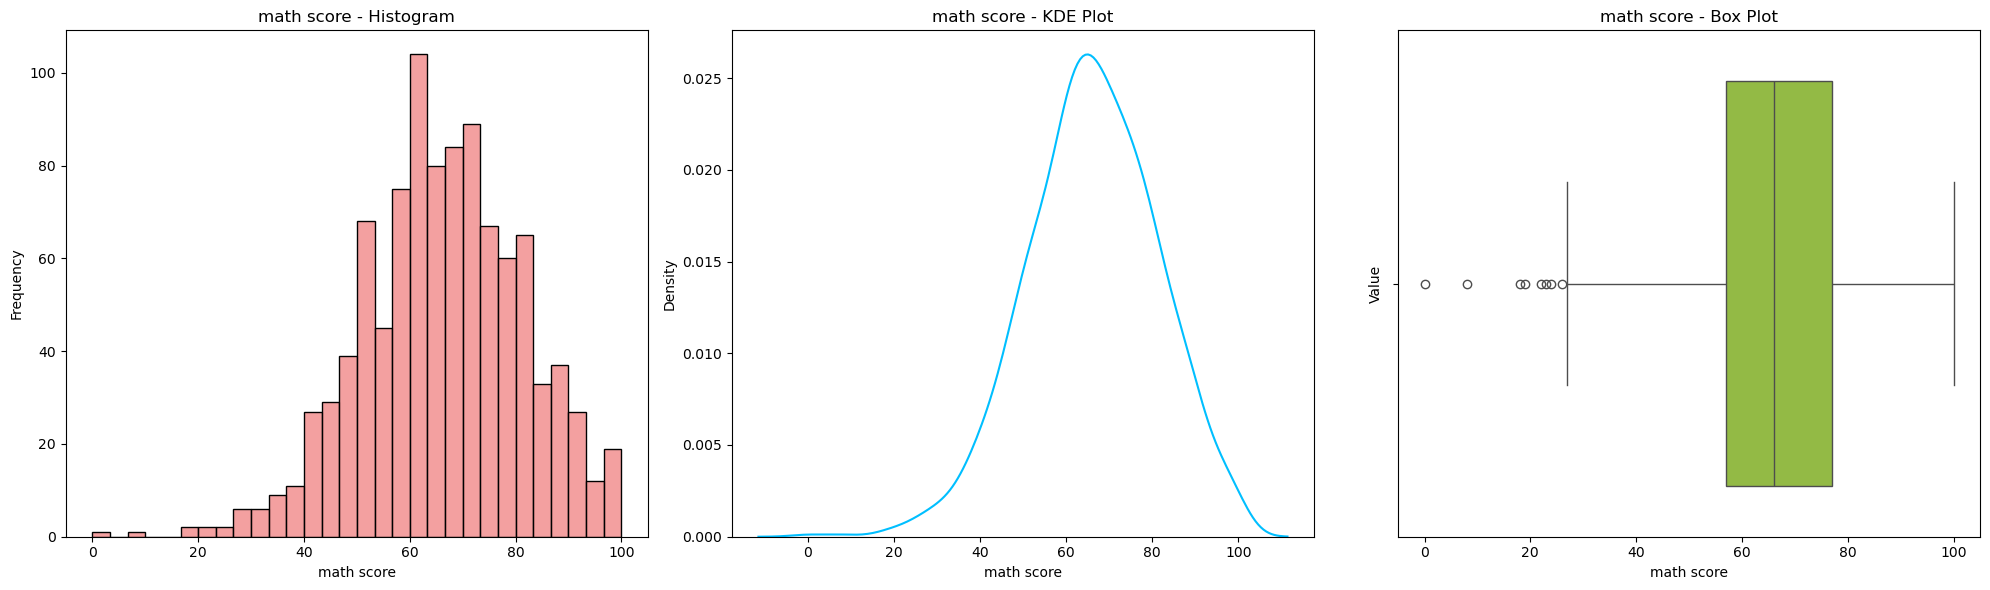

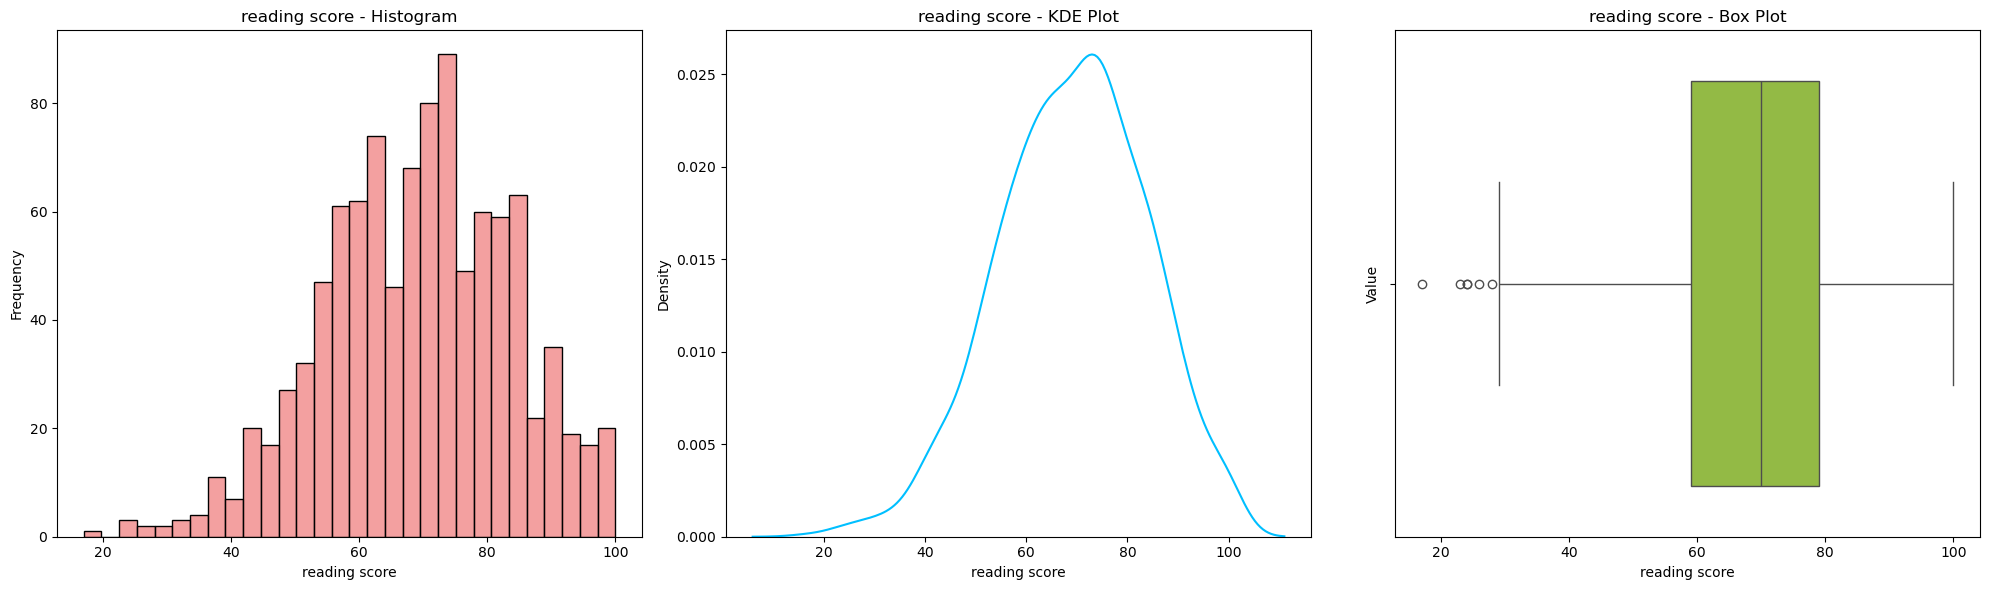

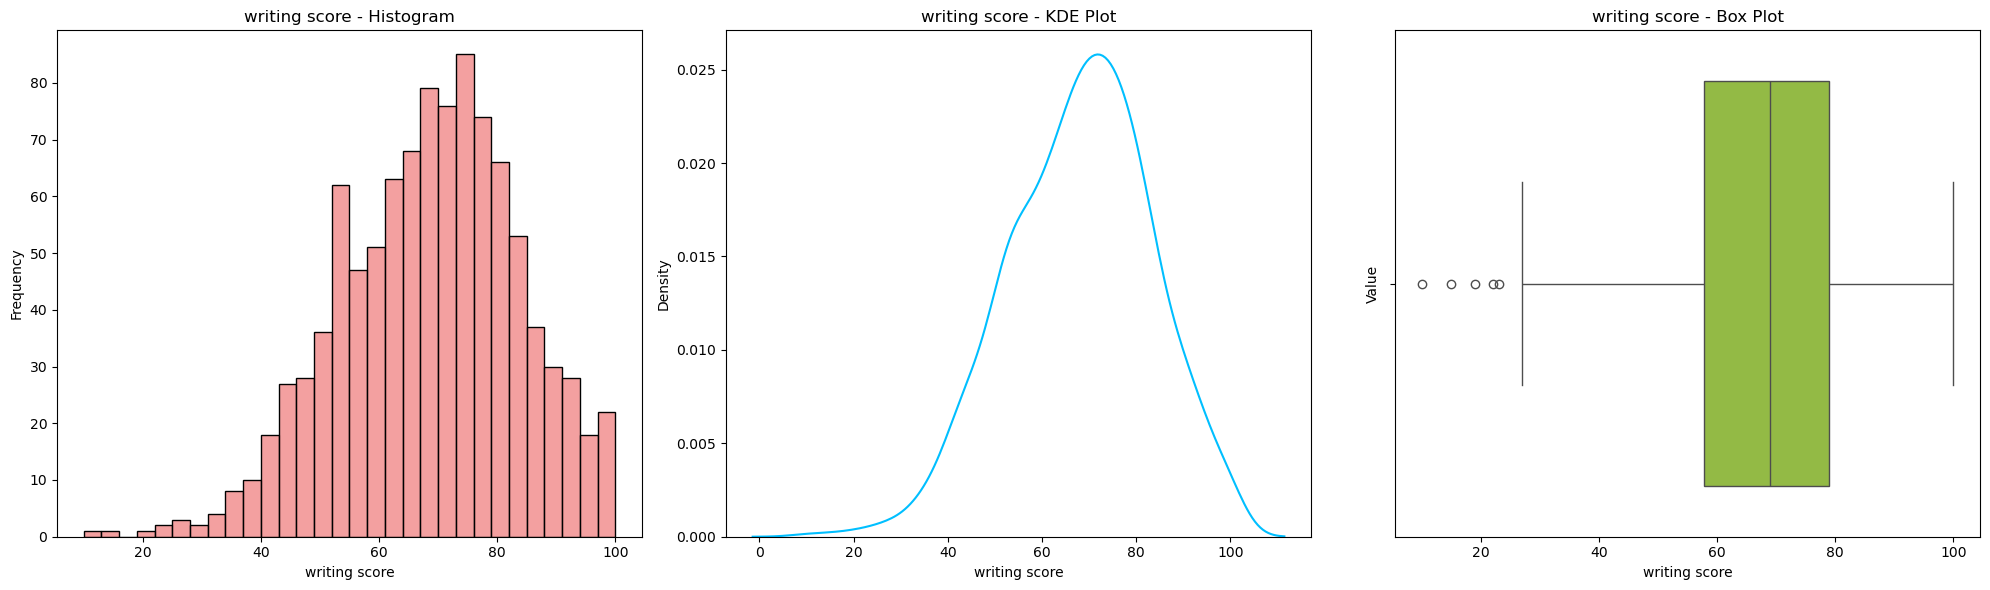

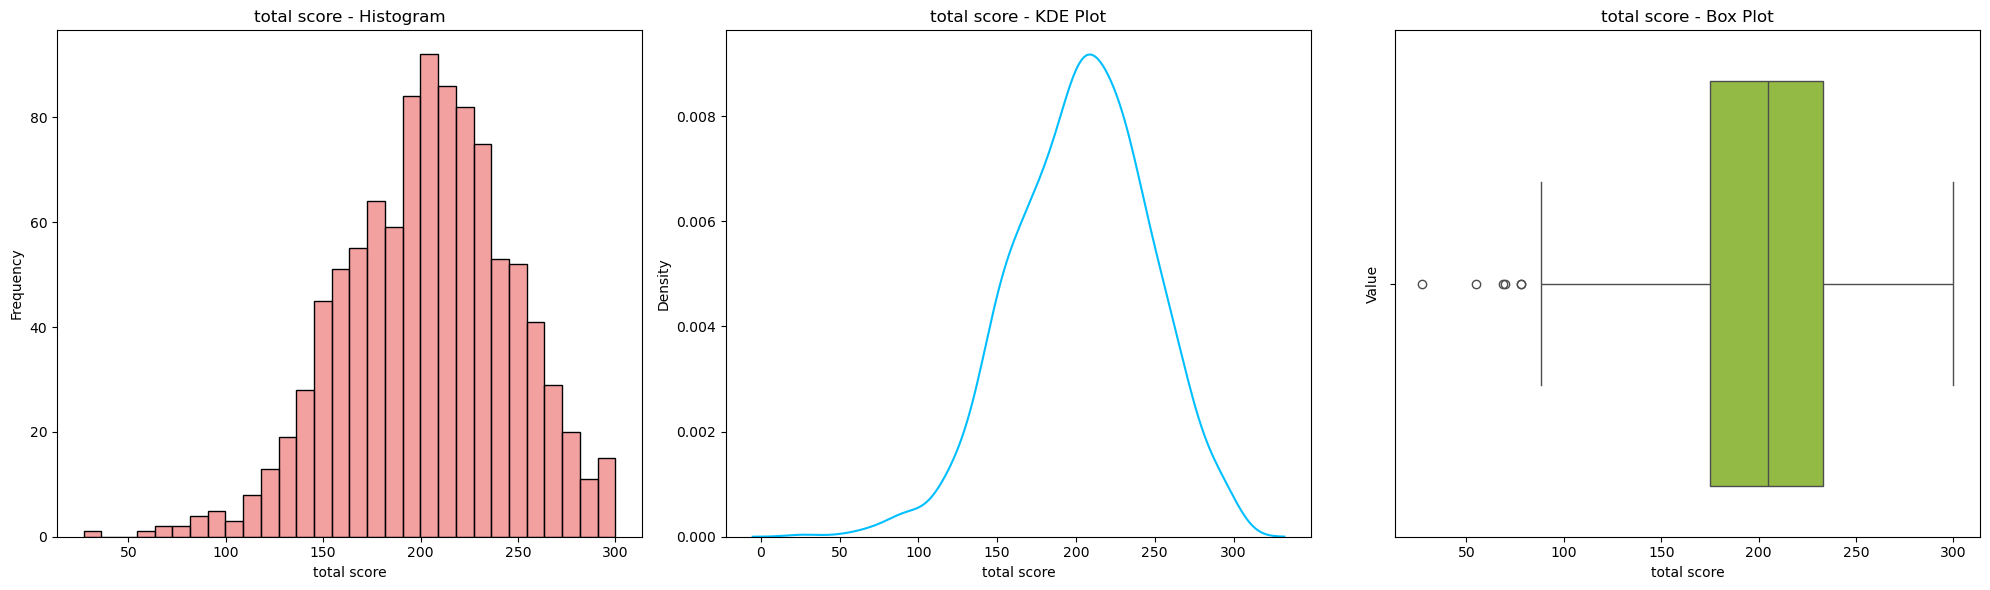

In [12]:

hist_color = 'lightcoral'  
kde_color = 'deepskyblue'  
box_color = 'yellowgreen'  

for feature in numerical_Features:
    plt.figure(figsize=(20, 6))
    
    # Histogram
    plt.subplot(131)
    sns.histplot(data=df, x=feature, color=hist_color, bins=30)
    plt.title(f'{feature} - Histogram')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    # KDE Plot
    plt.subplot(132)
    sns.kdeplot(data=df, x=feature, color=kde_color)
    plt.title(f'{feature} - KDE Plot')
    plt.xlabel(feature)
    plt.ylabel('Density')

    # Box Plot
    plt.subplot(133)
    sns.boxplot(data=df, x=feature, color=box_color)
    plt.title(f'{feature} - Box Plot')
    plt.xlabel(feature)
    plt.ylabel('Value')

    plt.tight_layout()
    plt.show()


#### Categorical features

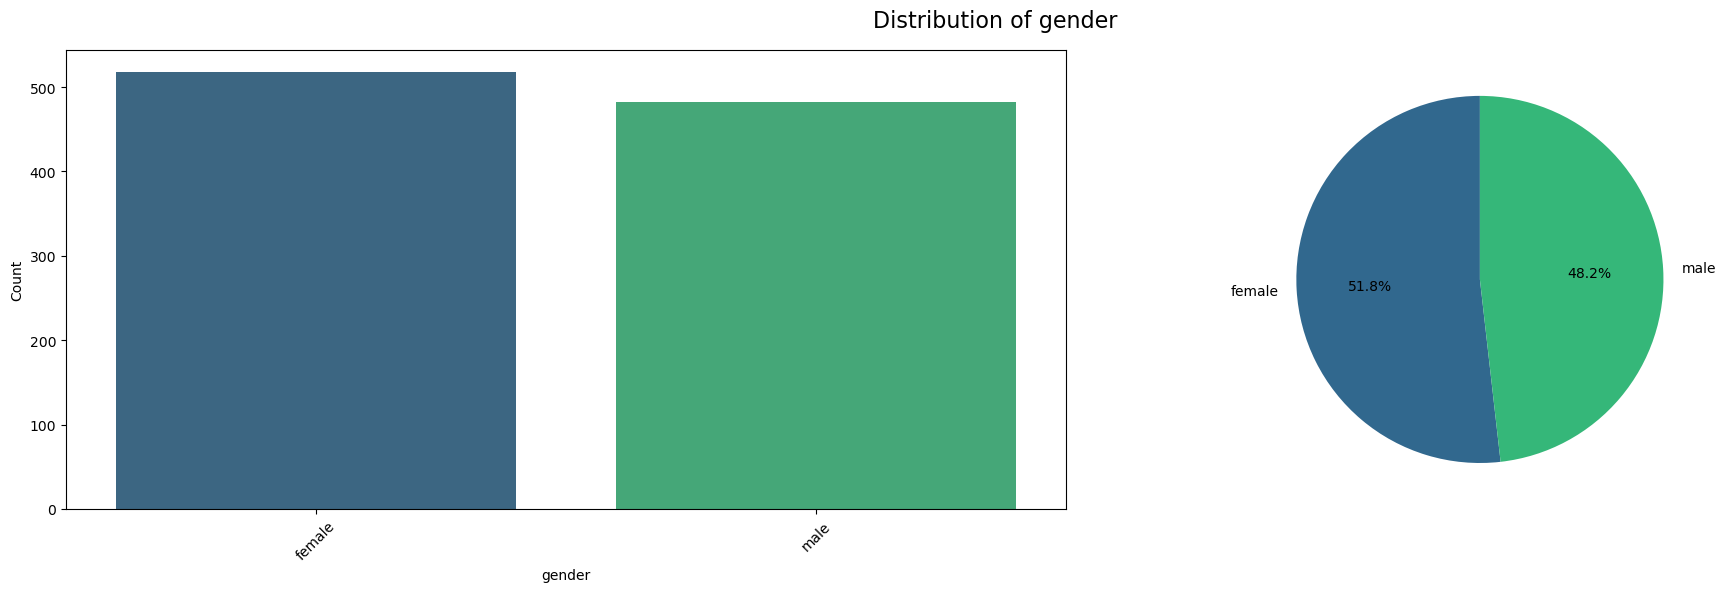

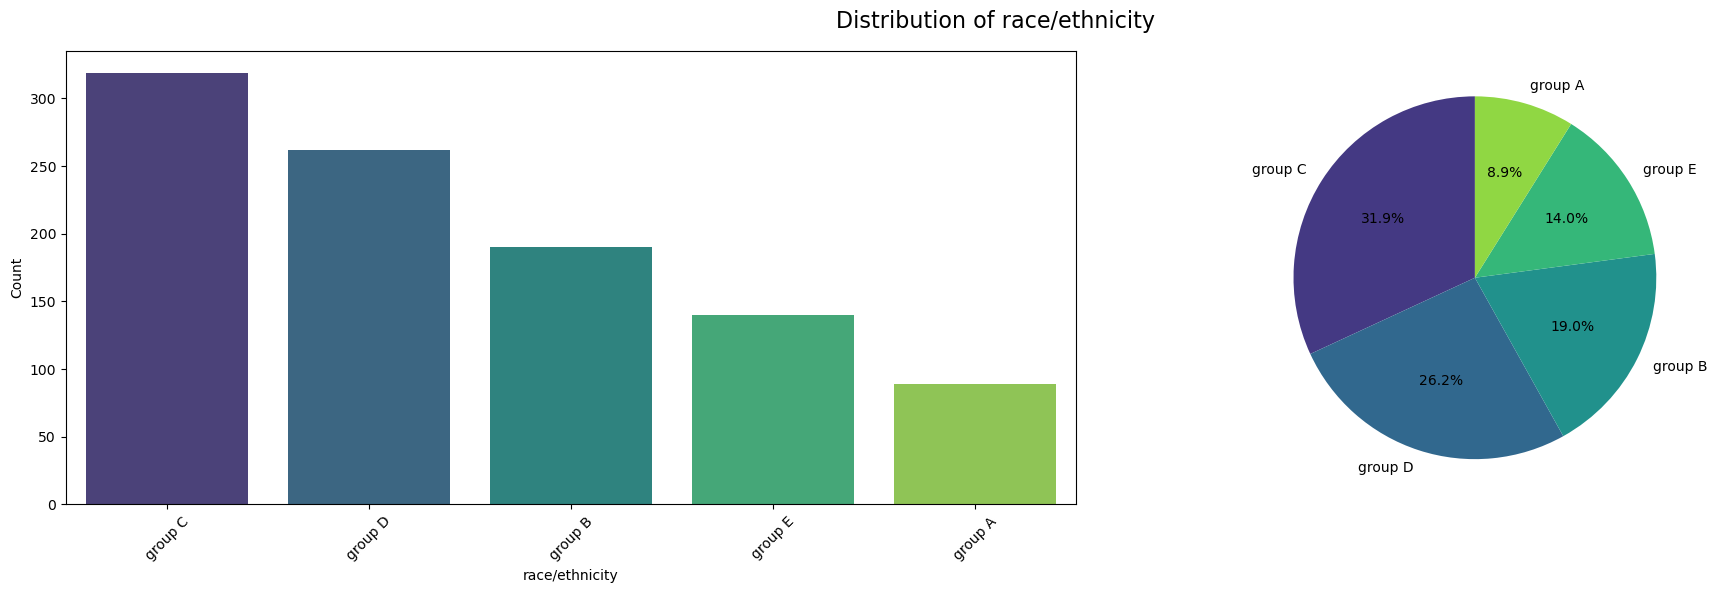

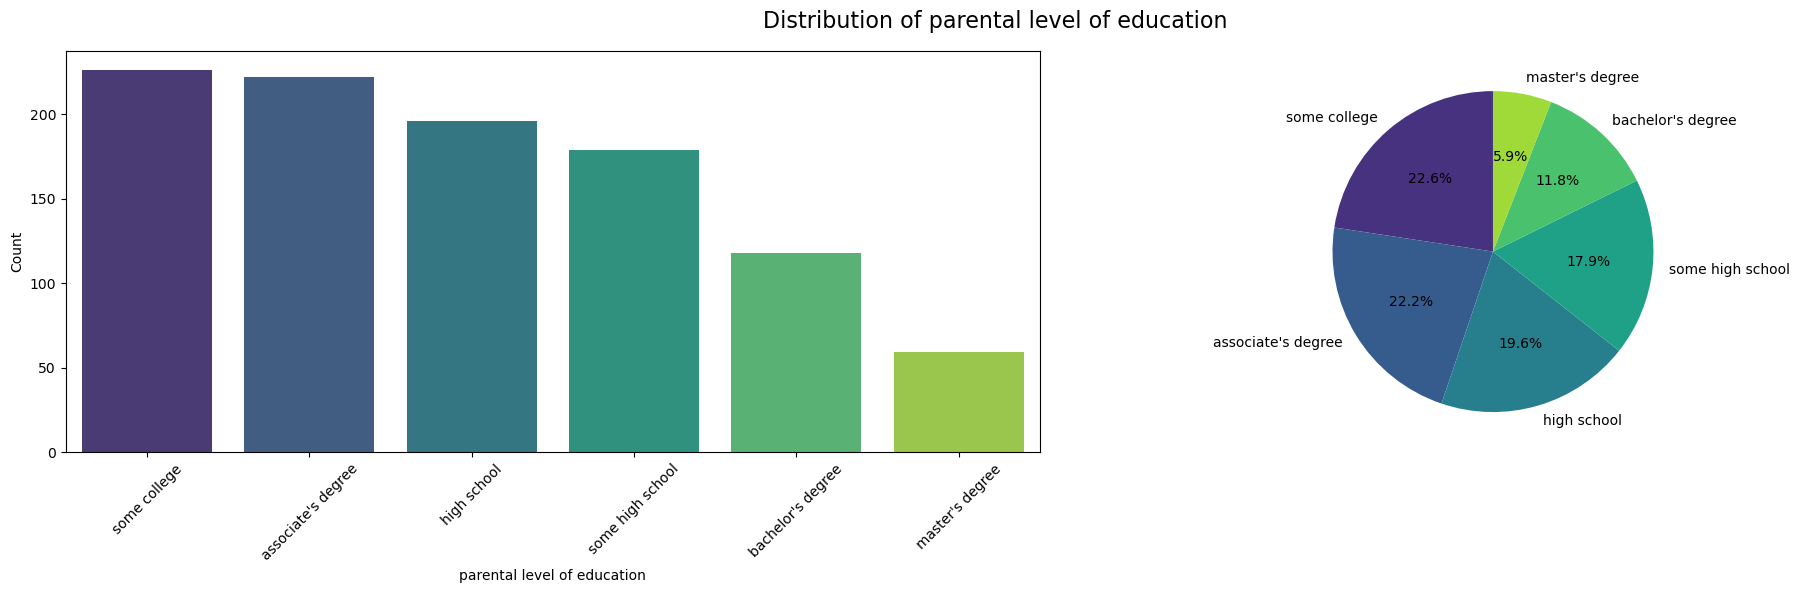

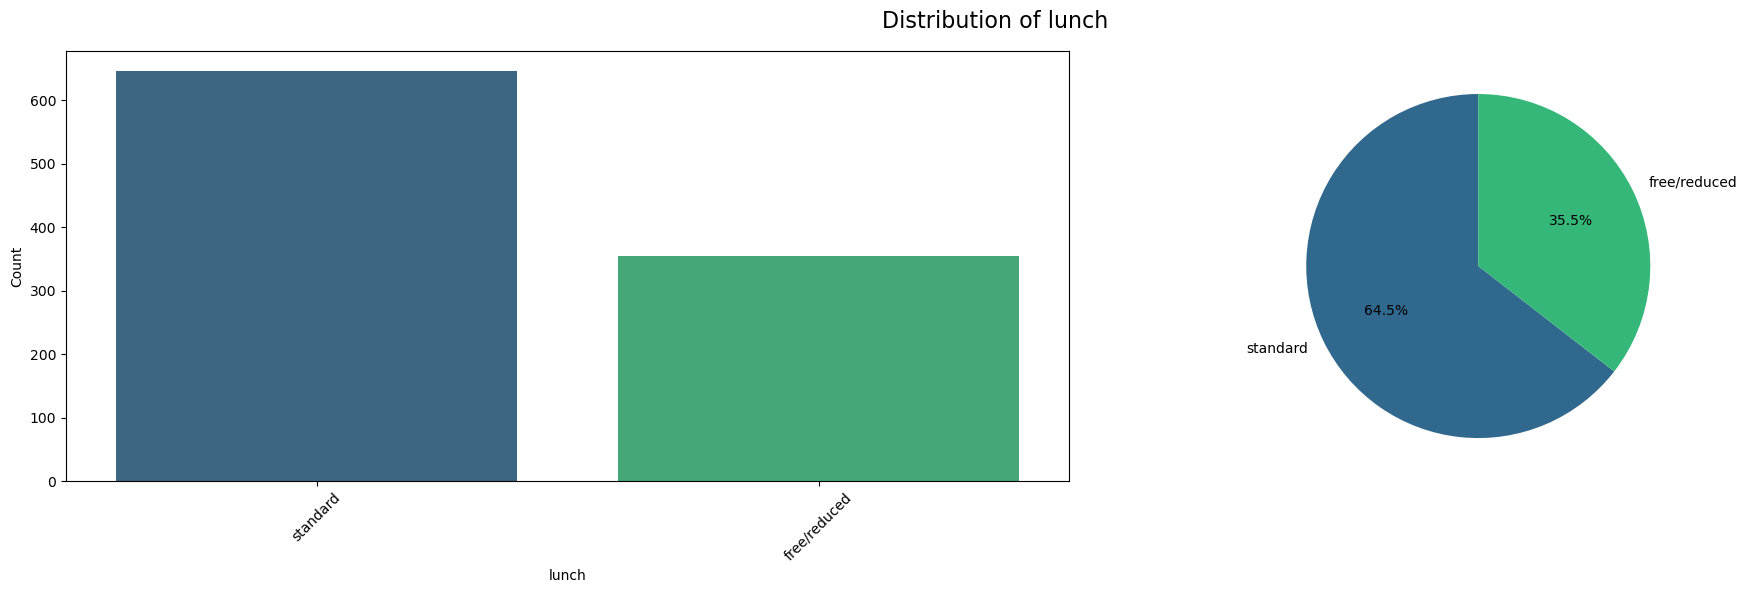

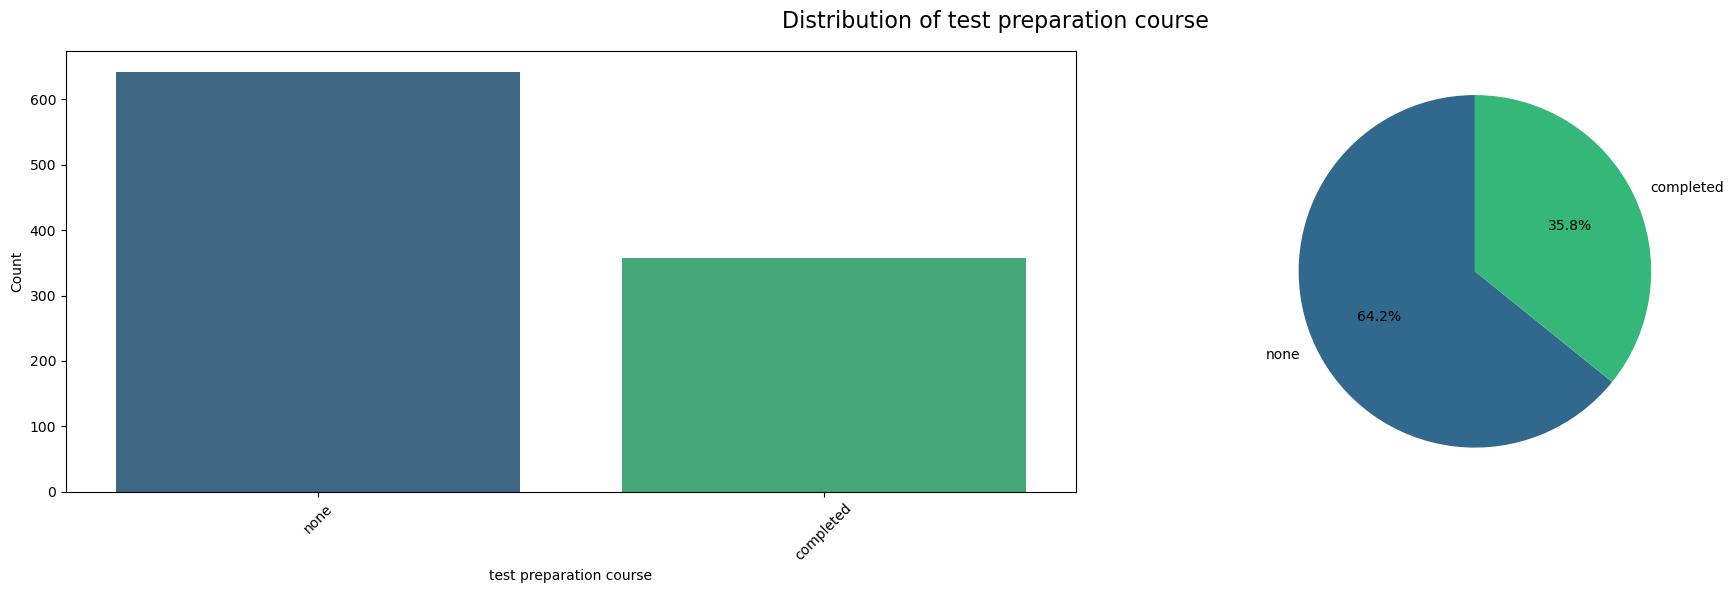

In [13]:
categorical_Features=['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course']
for feature in categorical_Features:
    plt.figure(figsize=(20, 6))

    
    plt.subplot(121)
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette='viridis')
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel('Count')

    
    plt.subplot(122)
    value_counts = df[feature].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(value_counts)))

    plt.suptitle(f'Distribution of {feature}', fontsize=16)
    
    plt.tight_layout() 
    plt.show()


# Step 4: Feature Relationships <a id="step4"> </a>

#### 1. Numerical vs Numerical

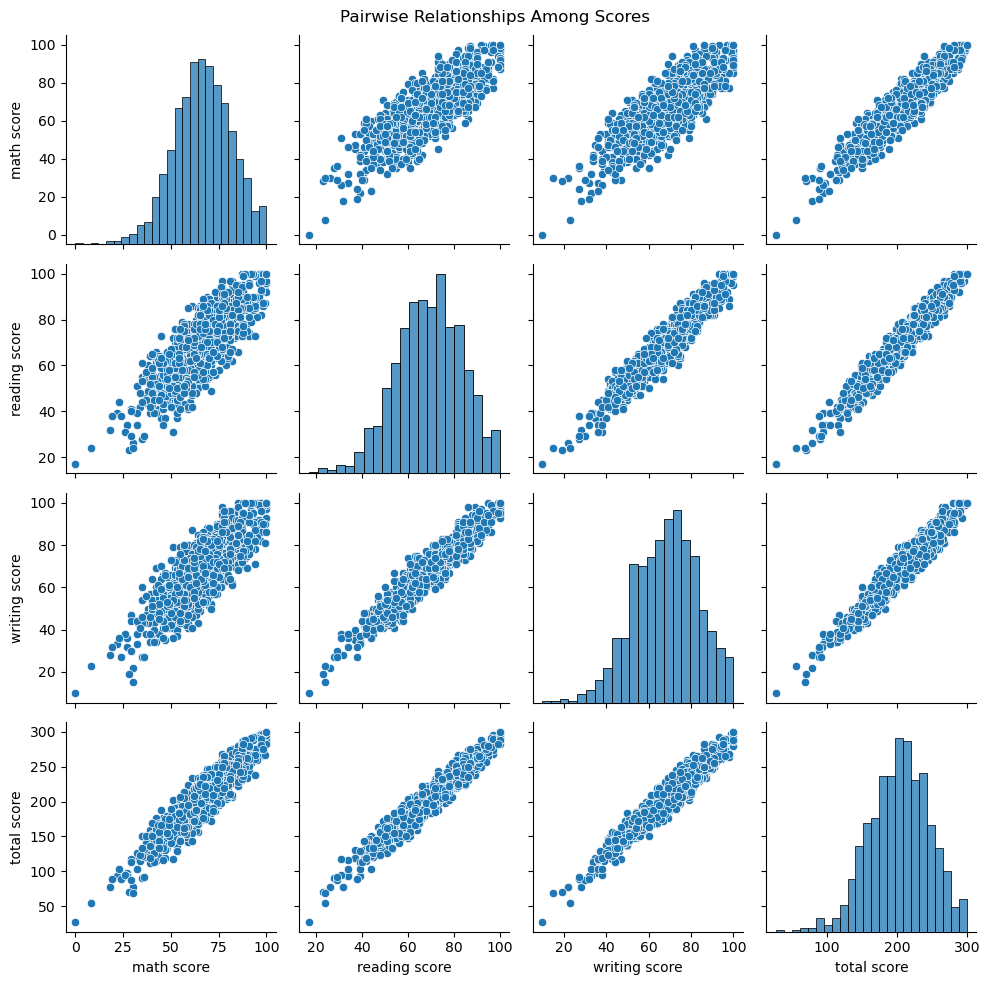

In [14]:
sns.pairplot(df)
plt.suptitle('Pairwise Relationships Among Scores')
plt.tight_layout()
plt.show()

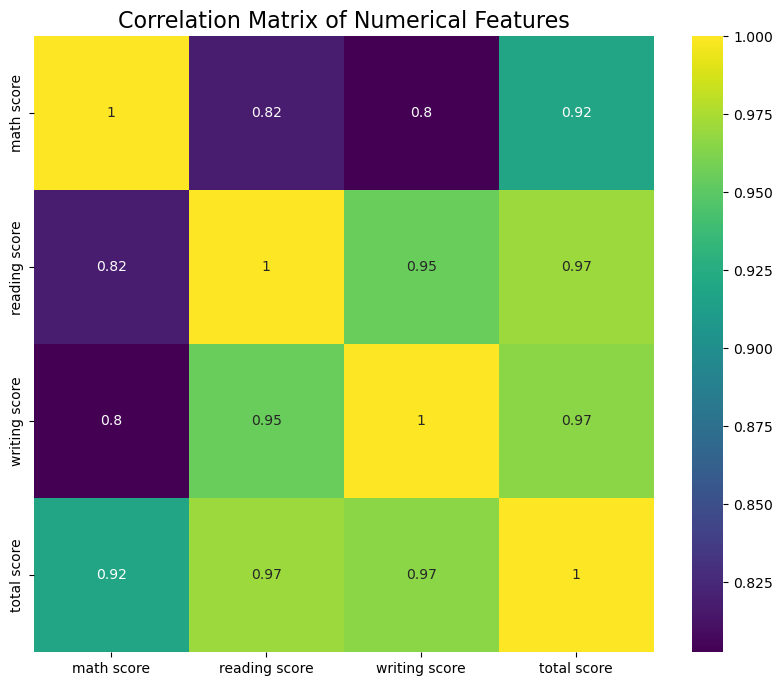

In [15]:
numerical_Features=['math score', 'reading score','writing score', 'total score']
corr_matrix =df[numerical_Features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True,cmap='viridis')
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

#### 2. Numerical VS Categorical

`math score` VS  `Categorical features`

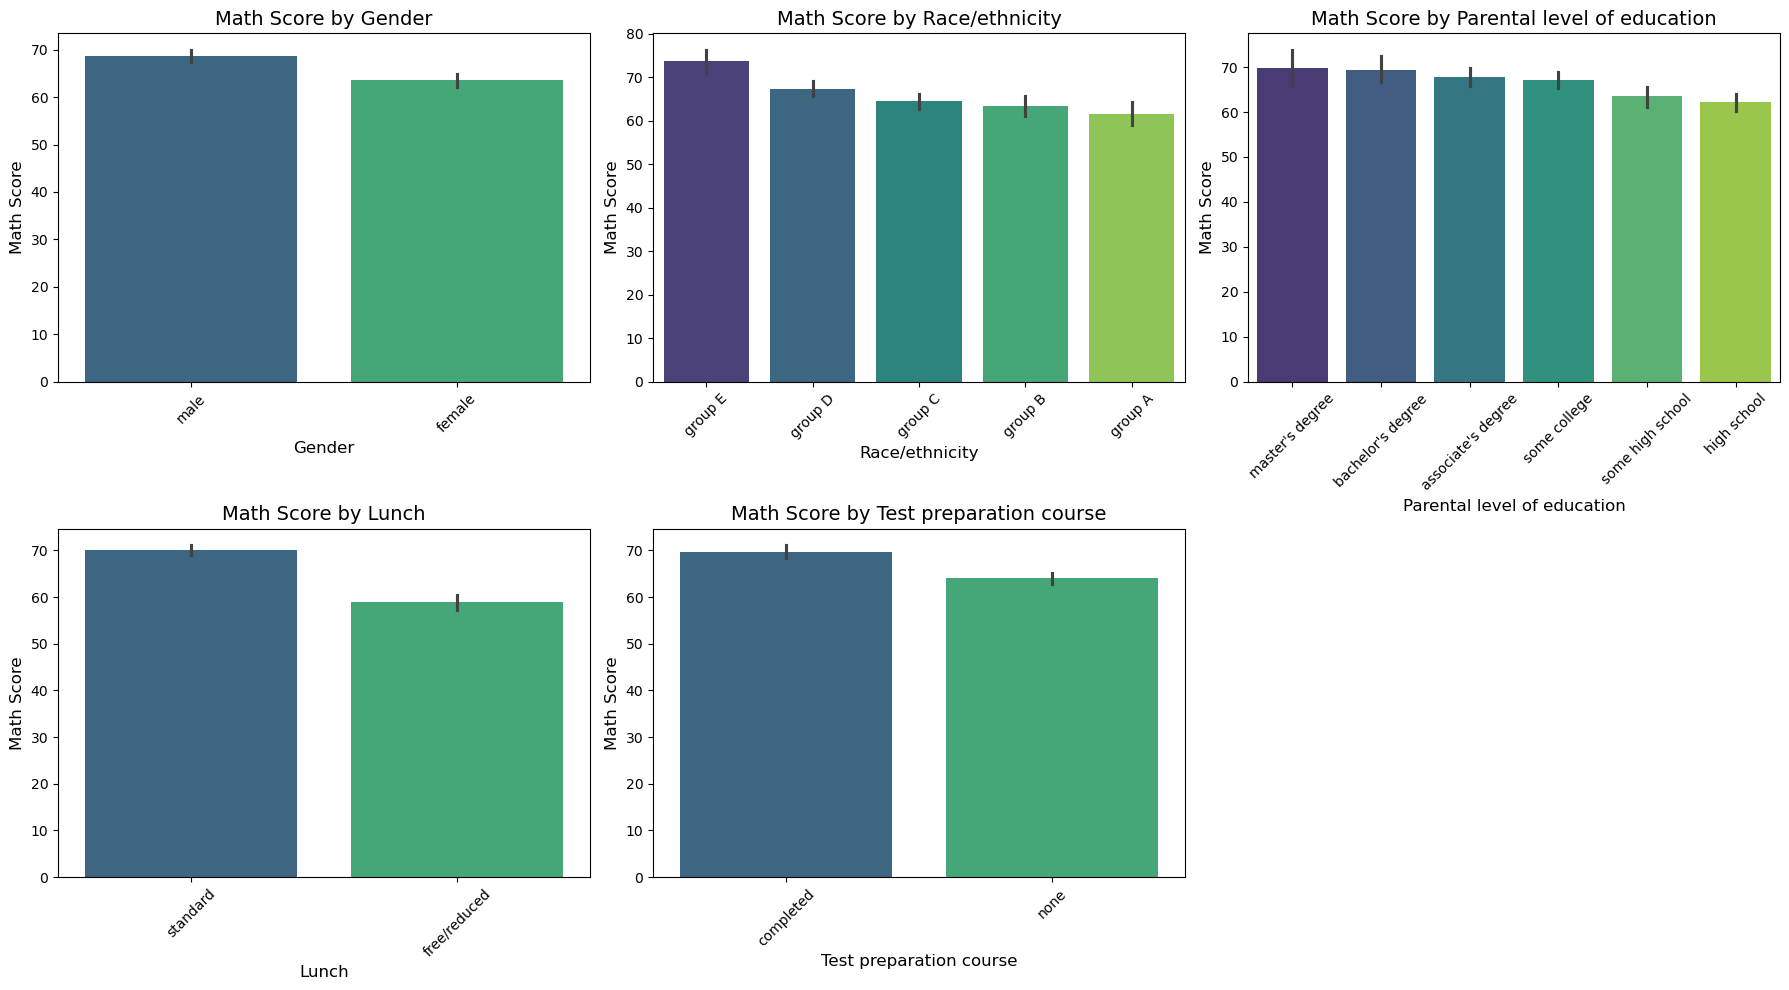

In [16]:

categorical_Features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_Features):
    order=df.groupby(feature)['math score'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x=feature, y='math score', ax=axes[i], palette='viridis',order=order)
    axes[i].set_title(f'Math Score by {feature.capitalize()}', fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('Math Score', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

for i in range(len(categorical_Features), len(axes)):
    axes[i].axis('off')


plt.tight_layout()
plt.show()


`reading score` VS `Categorical features`

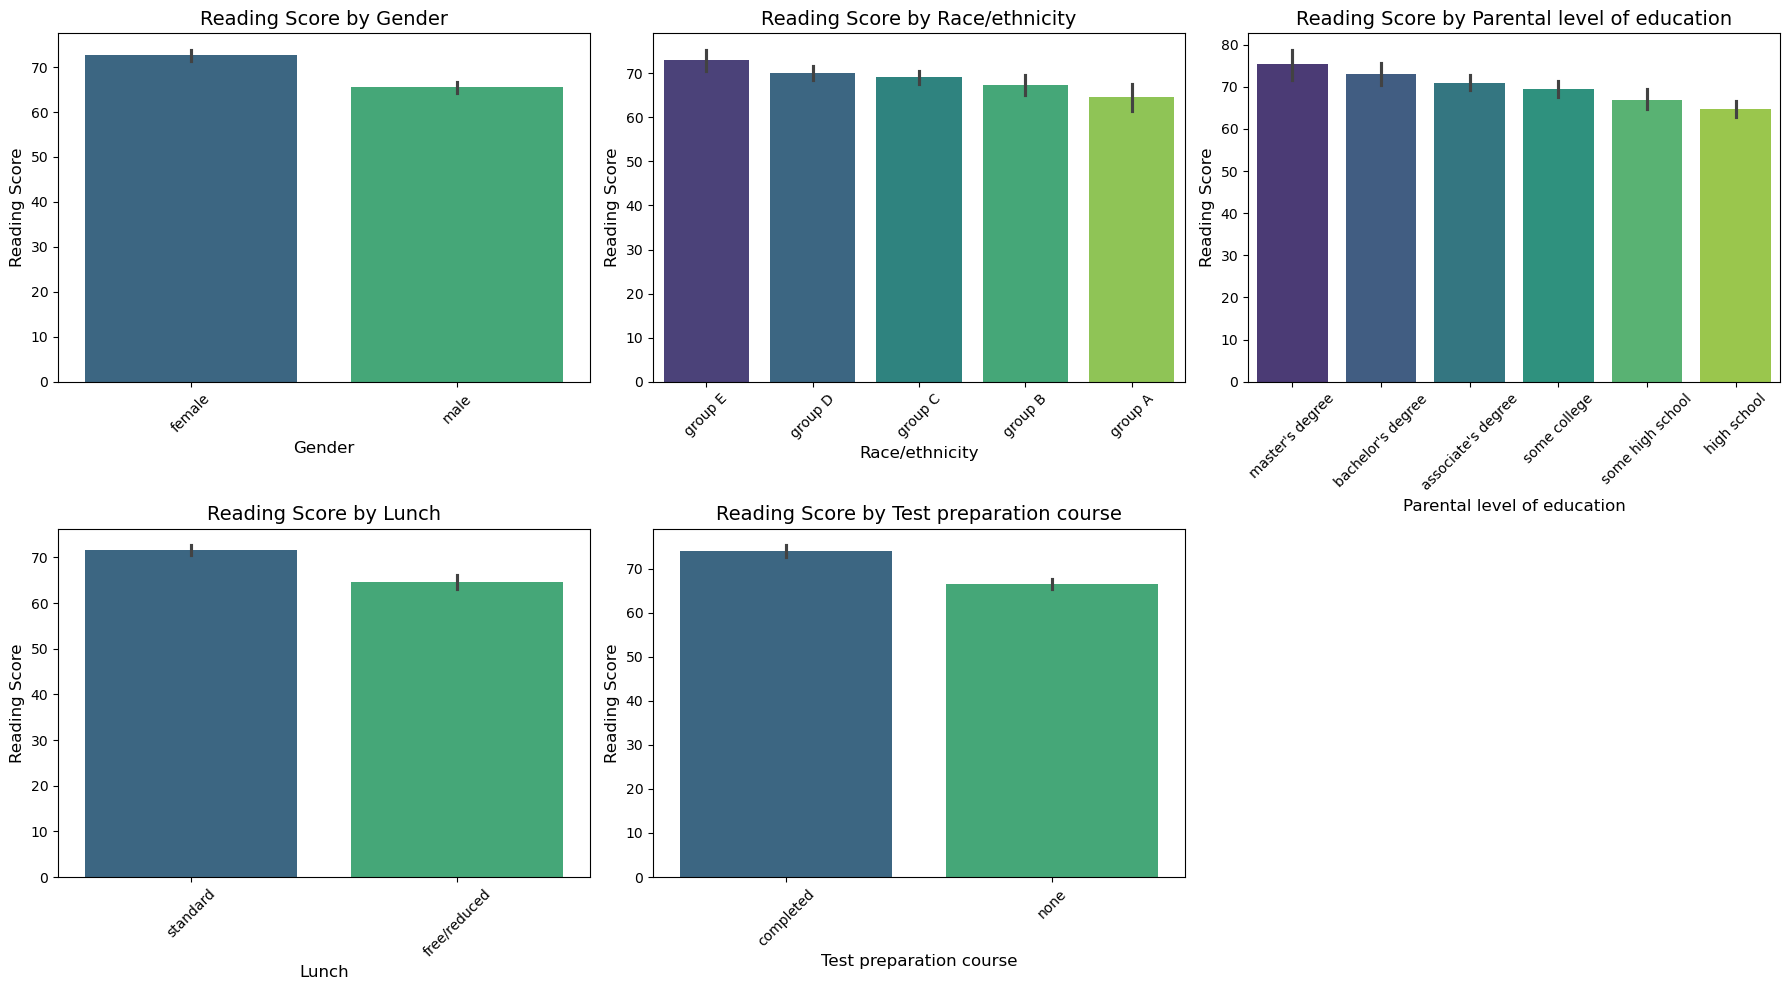

In [17]:

categorical_Features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_Features):
    order=df.groupby(feature)['reading score'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x=feature, y='reading score', ax=axes[i], palette='viridis',order=order)
    axes[i].set_title(f'Reading Score by {feature.capitalize()}', fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('Reading Score', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

for i in range(len(categorical_Features), len(axes)):
    axes[i].axis('off')


plt.tight_layout()
plt.show()


`writing score` VS `Categorical features`

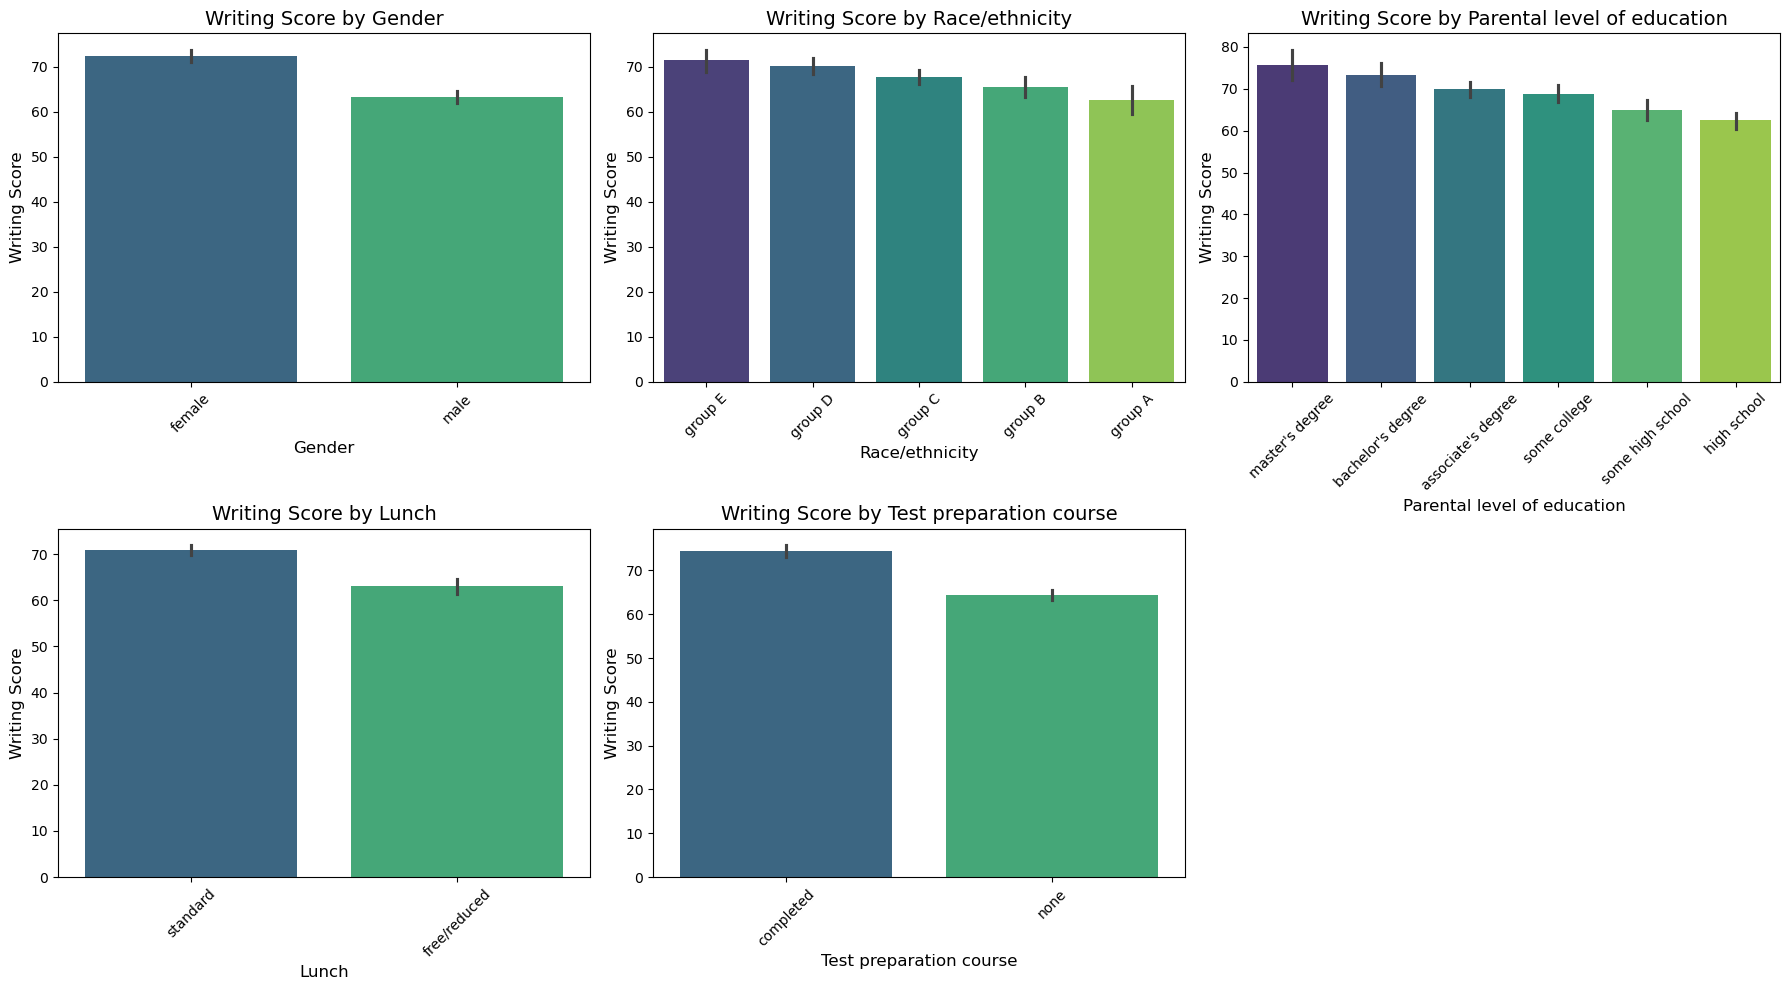

In [18]:

categorical_Features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_Features):
    order=df.groupby(feature)['writing score'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x=feature, y='writing score', ax=axes[i], palette='viridis',order=order)
    axes[i].set_title(f'Writing Score by {feature.capitalize()}', fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('Writing Score', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

for i in range(len(categorical_Features), len(axes)):
    axes[i].axis('off')


plt.tight_layout()
plt.show()


`total score` VS `Categorical features`

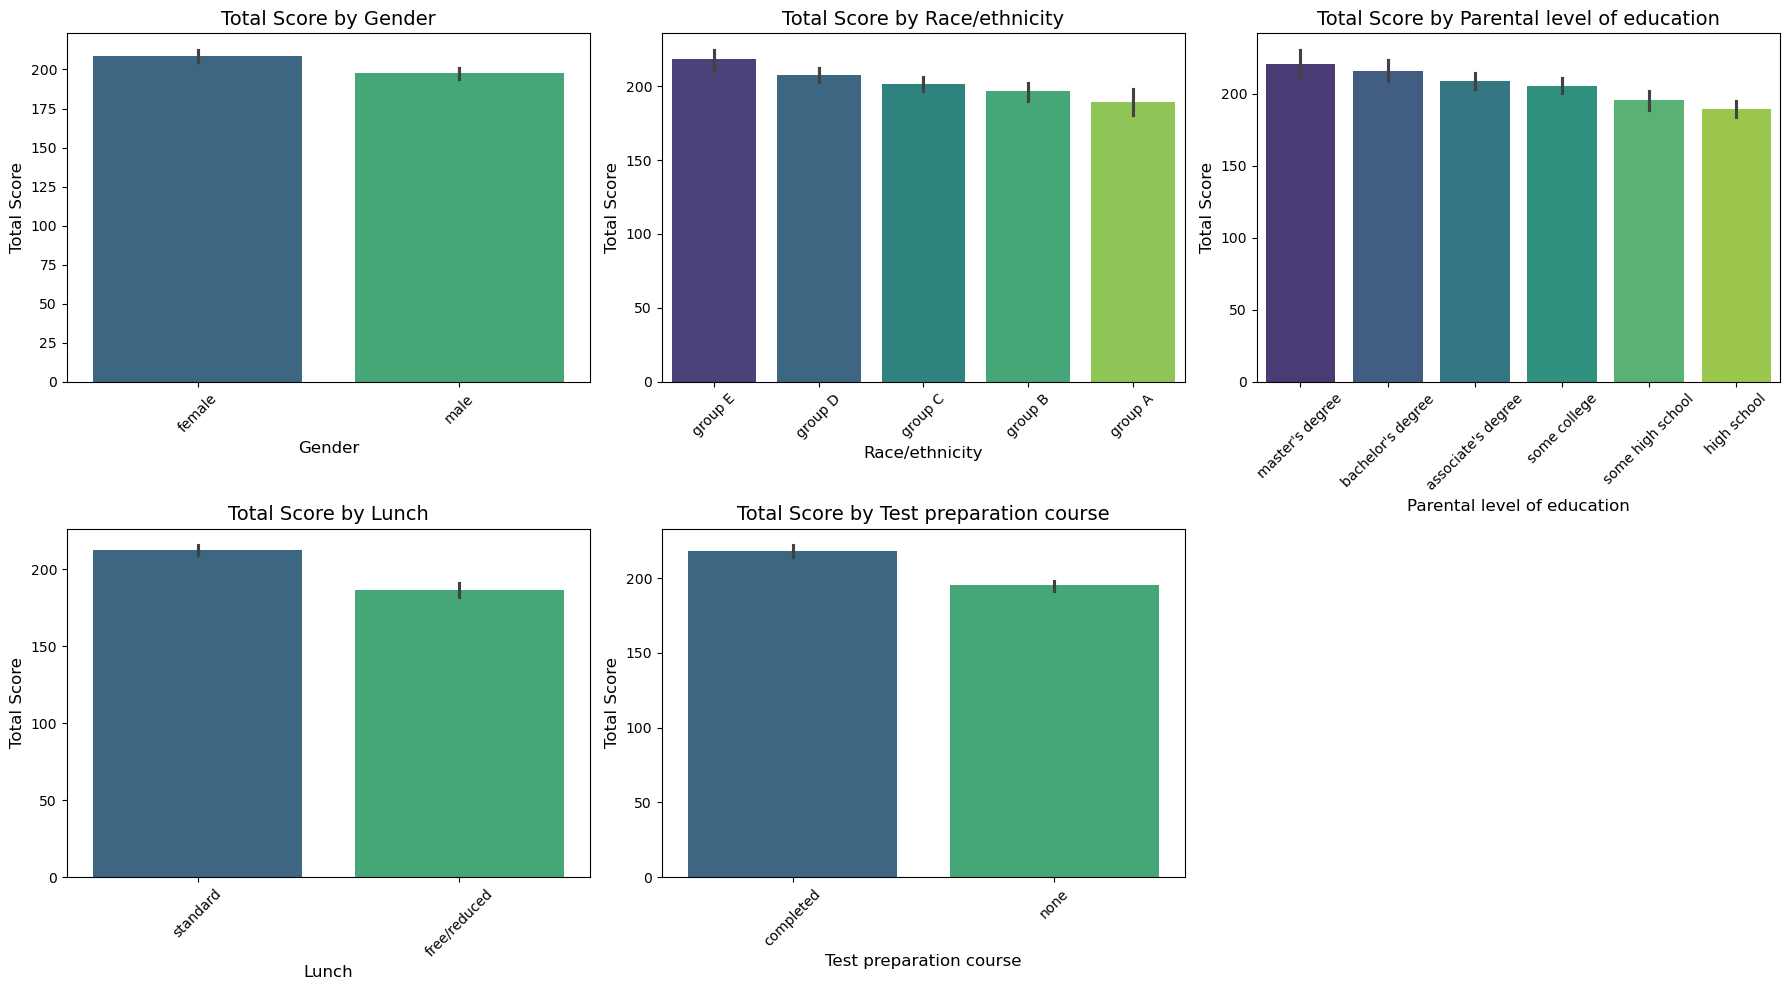

In [19]:

categorical_Features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_Features):
    order=df.groupby(feature)['total score'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x=feature, y='total score', ax=axes[i], palette='viridis',order=order)
    axes[i].set_title(f'Total Score by {feature.capitalize()}', fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('Total Score', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

for i in range(len(categorical_Features), len(axes)):
    axes[i].axis('off')


plt.tight_layout()
plt.show()


`Math Scores by Categorical Features and Gender`

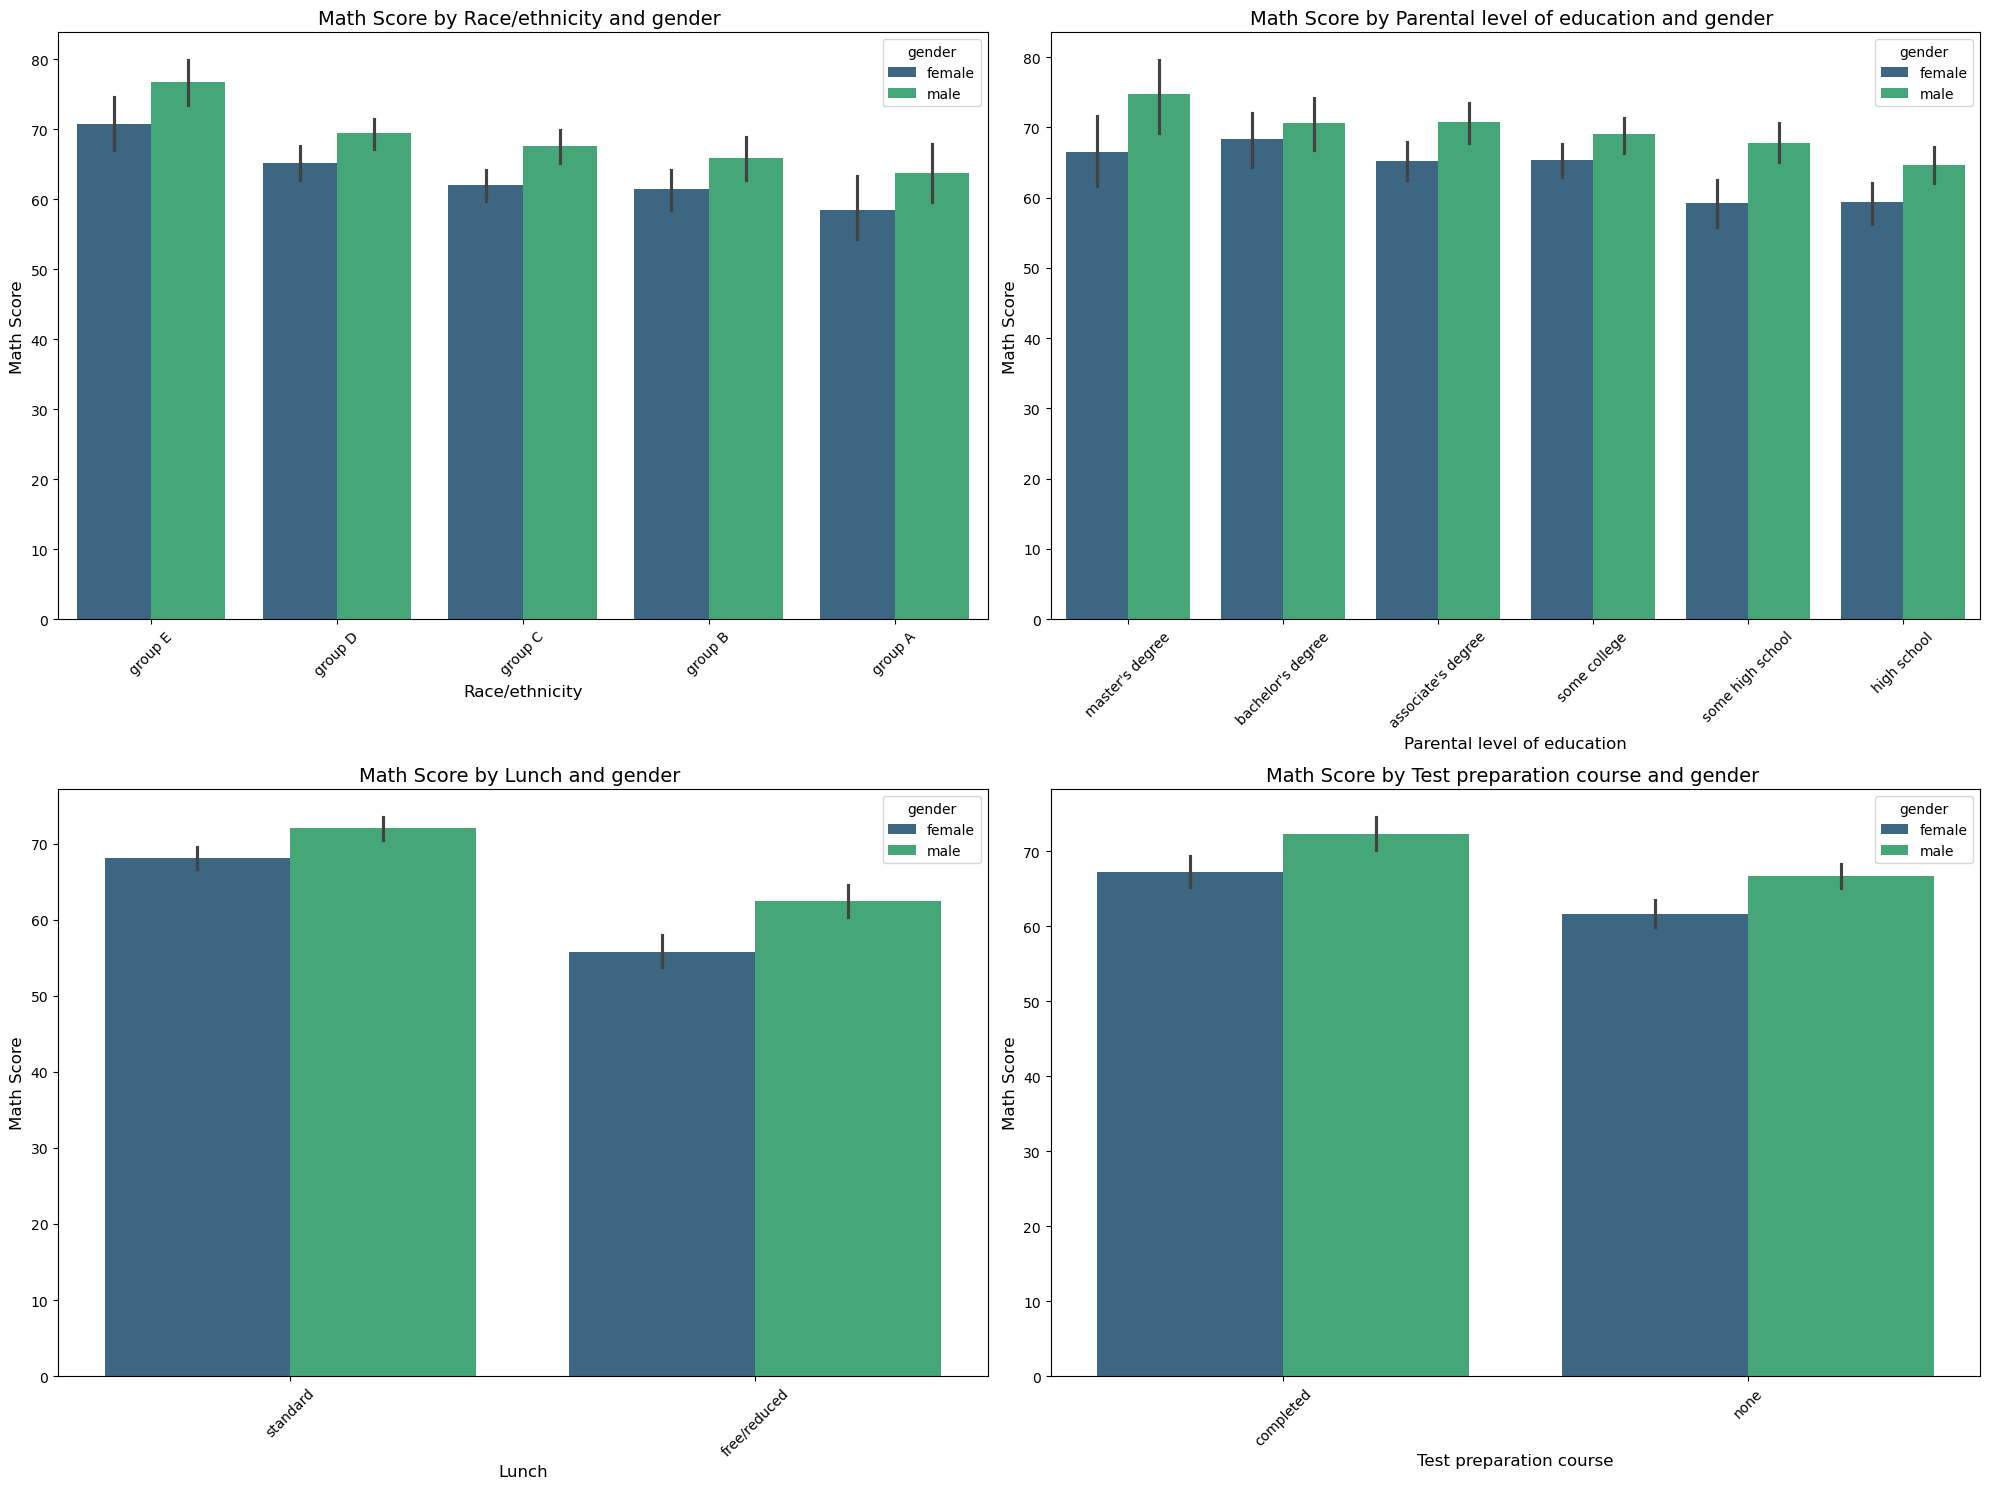

In [20]:

categorical_Features = ['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(categorical_Features):
    order = df.groupby(feature)['math score'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x=feature, y='math score', hue='gender',ax=axes[i], palette='viridis',order=order)
    axes[i].set_title(f'Math Score by {feature.capitalize()} and gender ', fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('Math Score', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


`Reading Scores by Categorical Features and Gender`

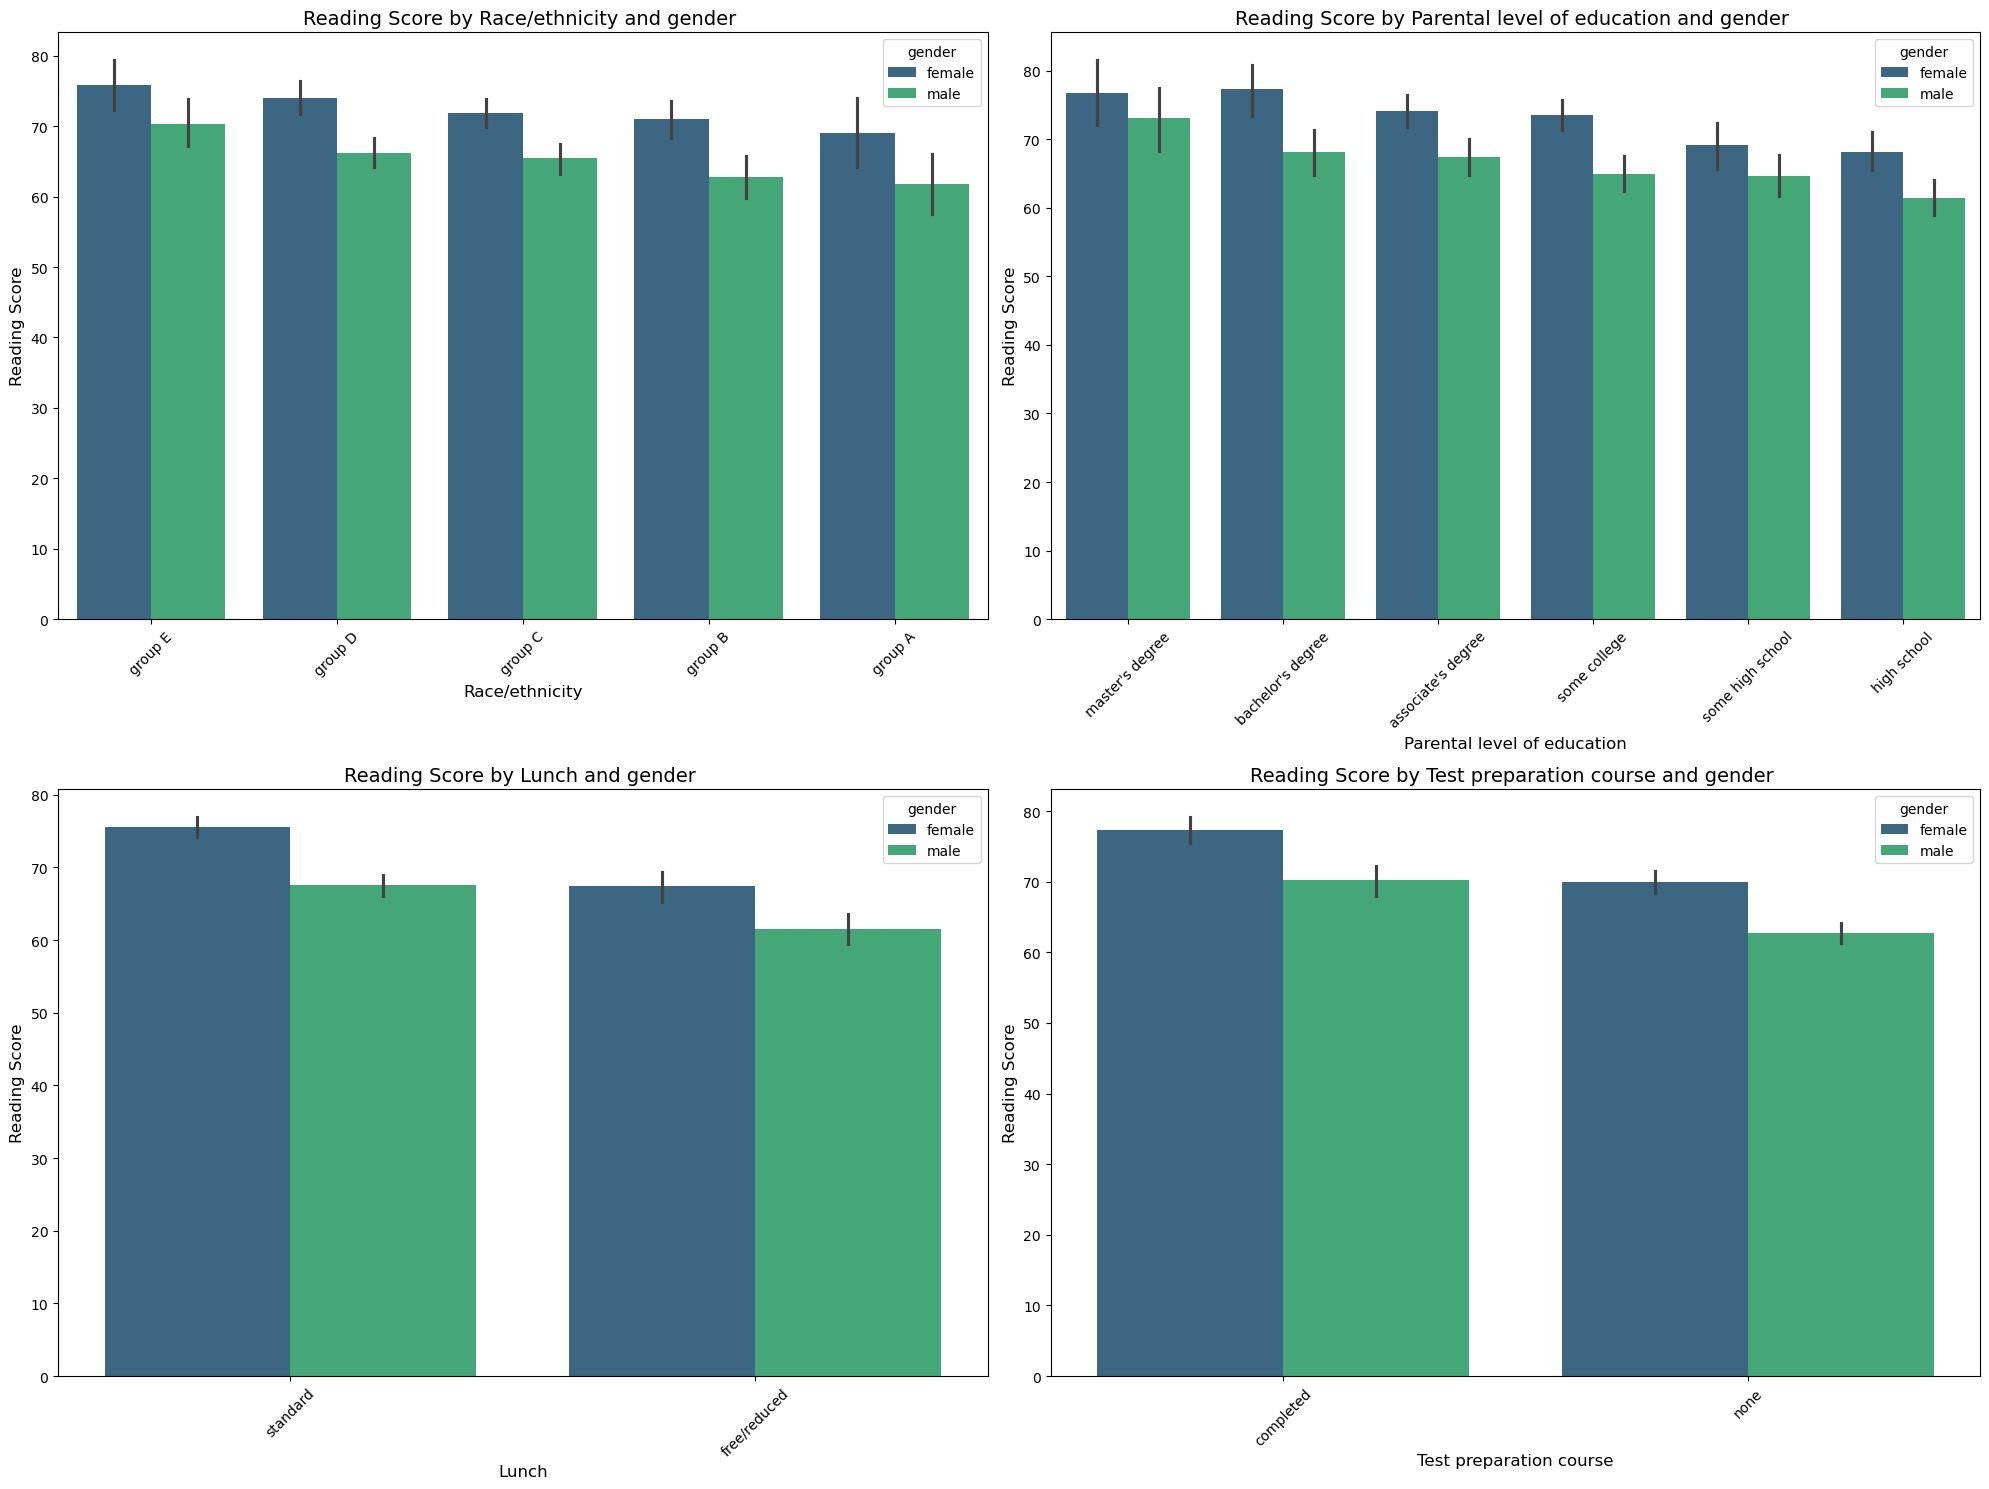

In [21]:

categorical_Features = ['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(categorical_Features):
    order = df.groupby(feature)['reading score'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x=feature, y='reading score', hue='gender',ax=axes[i], palette='viridis',order=order)
    axes[i].set_title(f'Reading Score by {feature.capitalize()} and gender ', fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('Reading Score', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


`Writing Scores by Categorical Features and Gender`

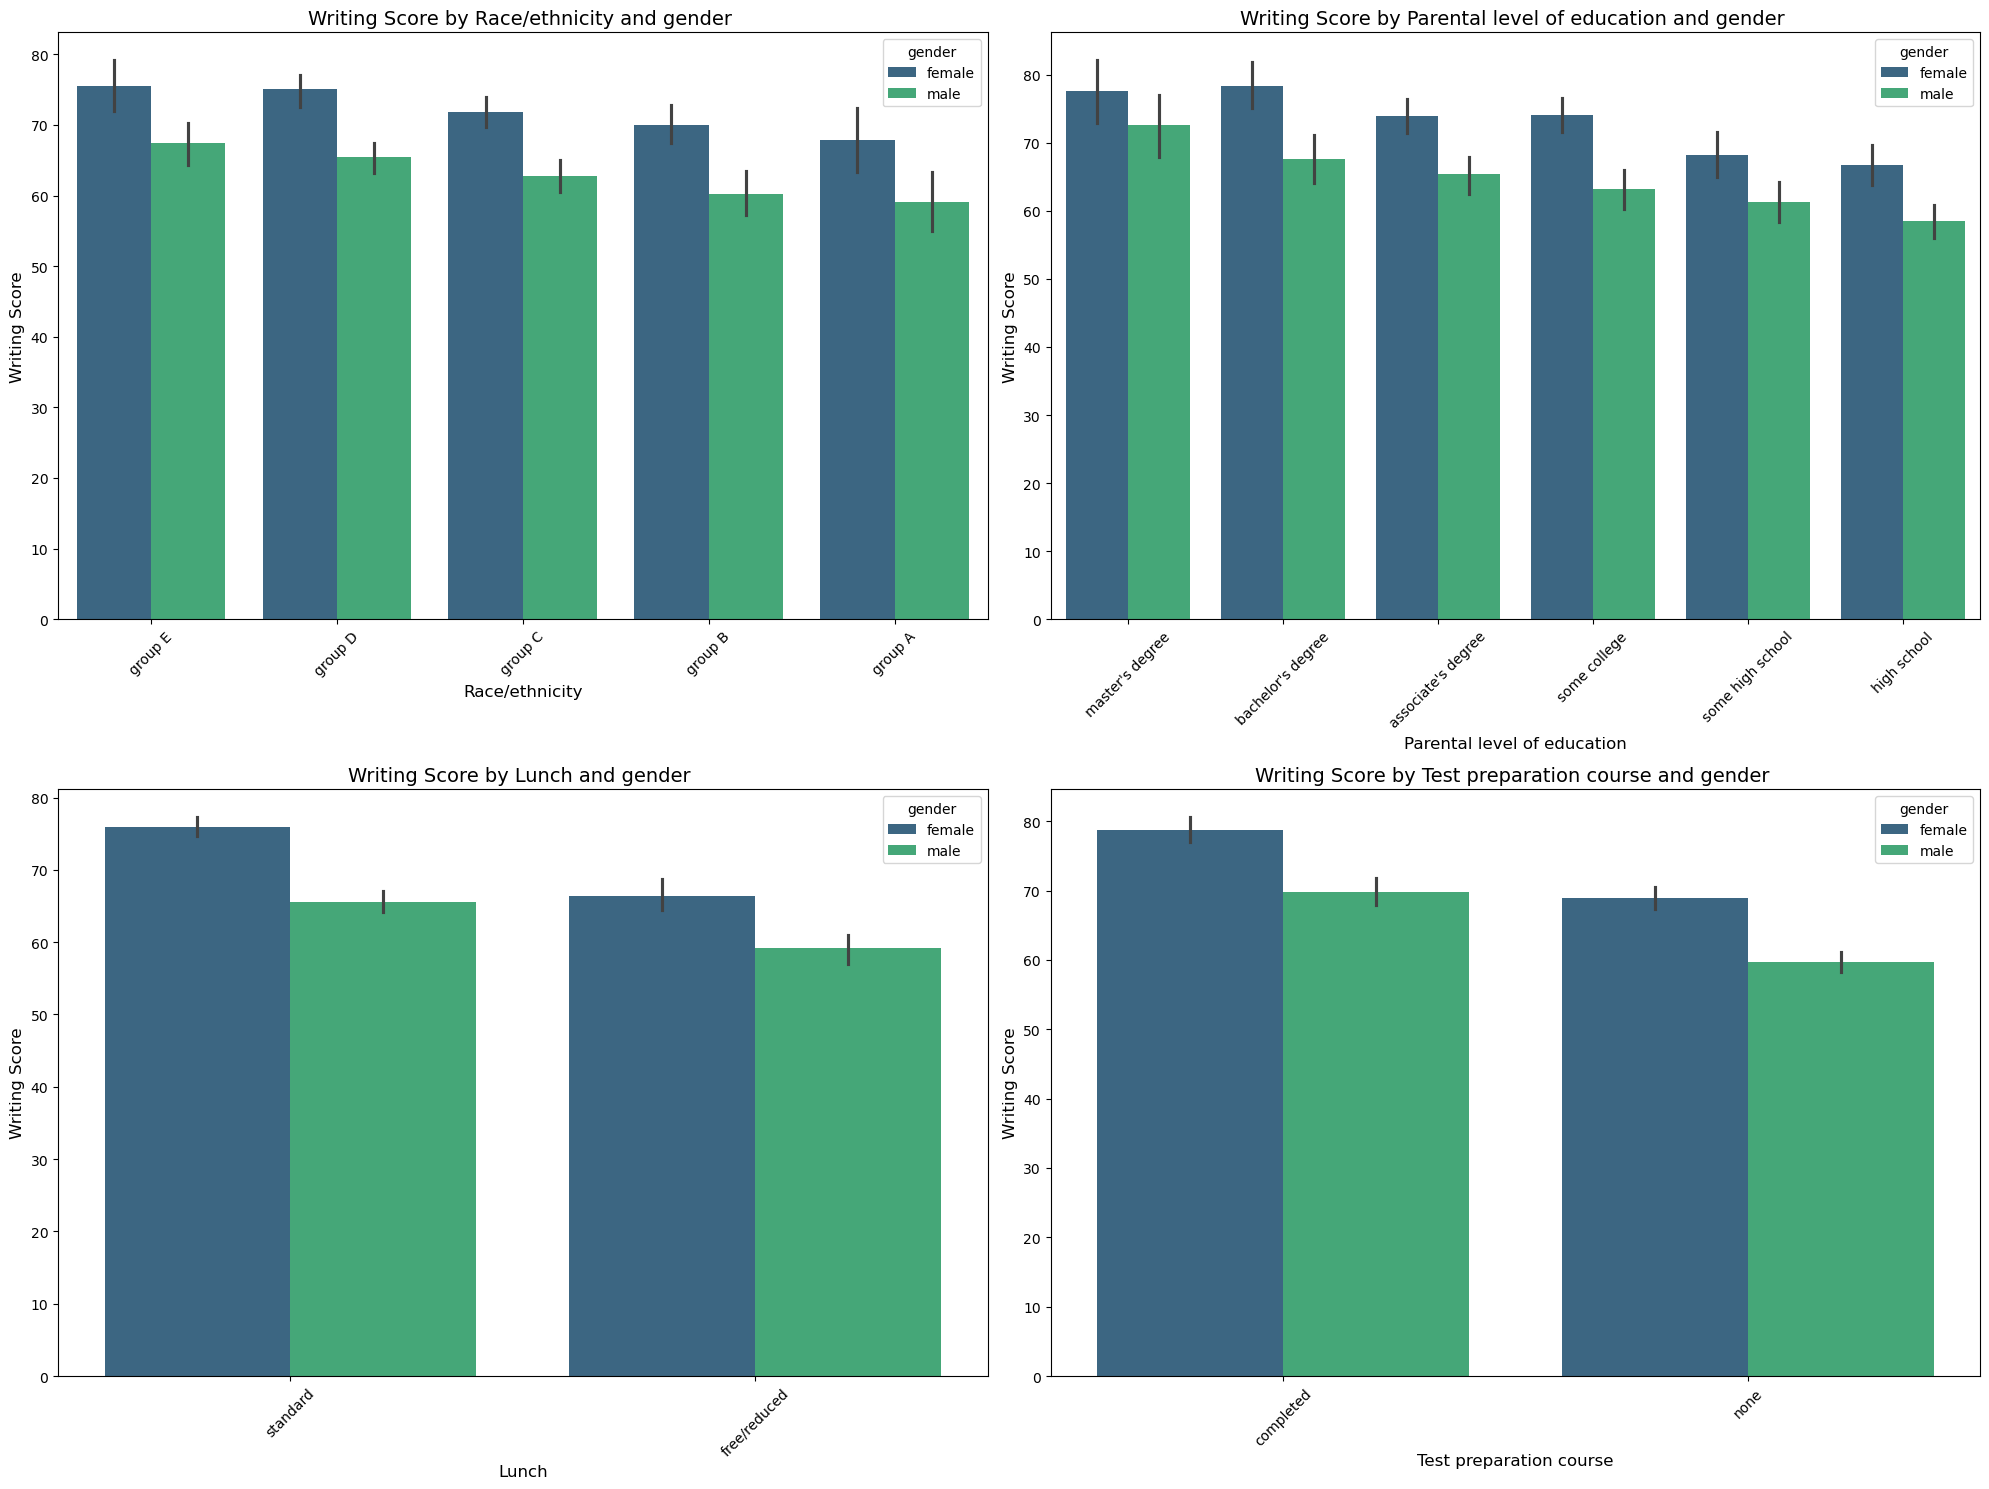

In [22]:

categorical_Features = ['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(categorical_Features):
    order = df.groupby(feature)['writing score'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x=feature, y='writing score', hue='gender',ax=axes[i], palette='viridis',order=order)
    axes[i].set_title(f'Writing Score by {feature.capitalize()} and gender ', fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('Writing Score', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


`Total Scores by Categorical Features and Gender`

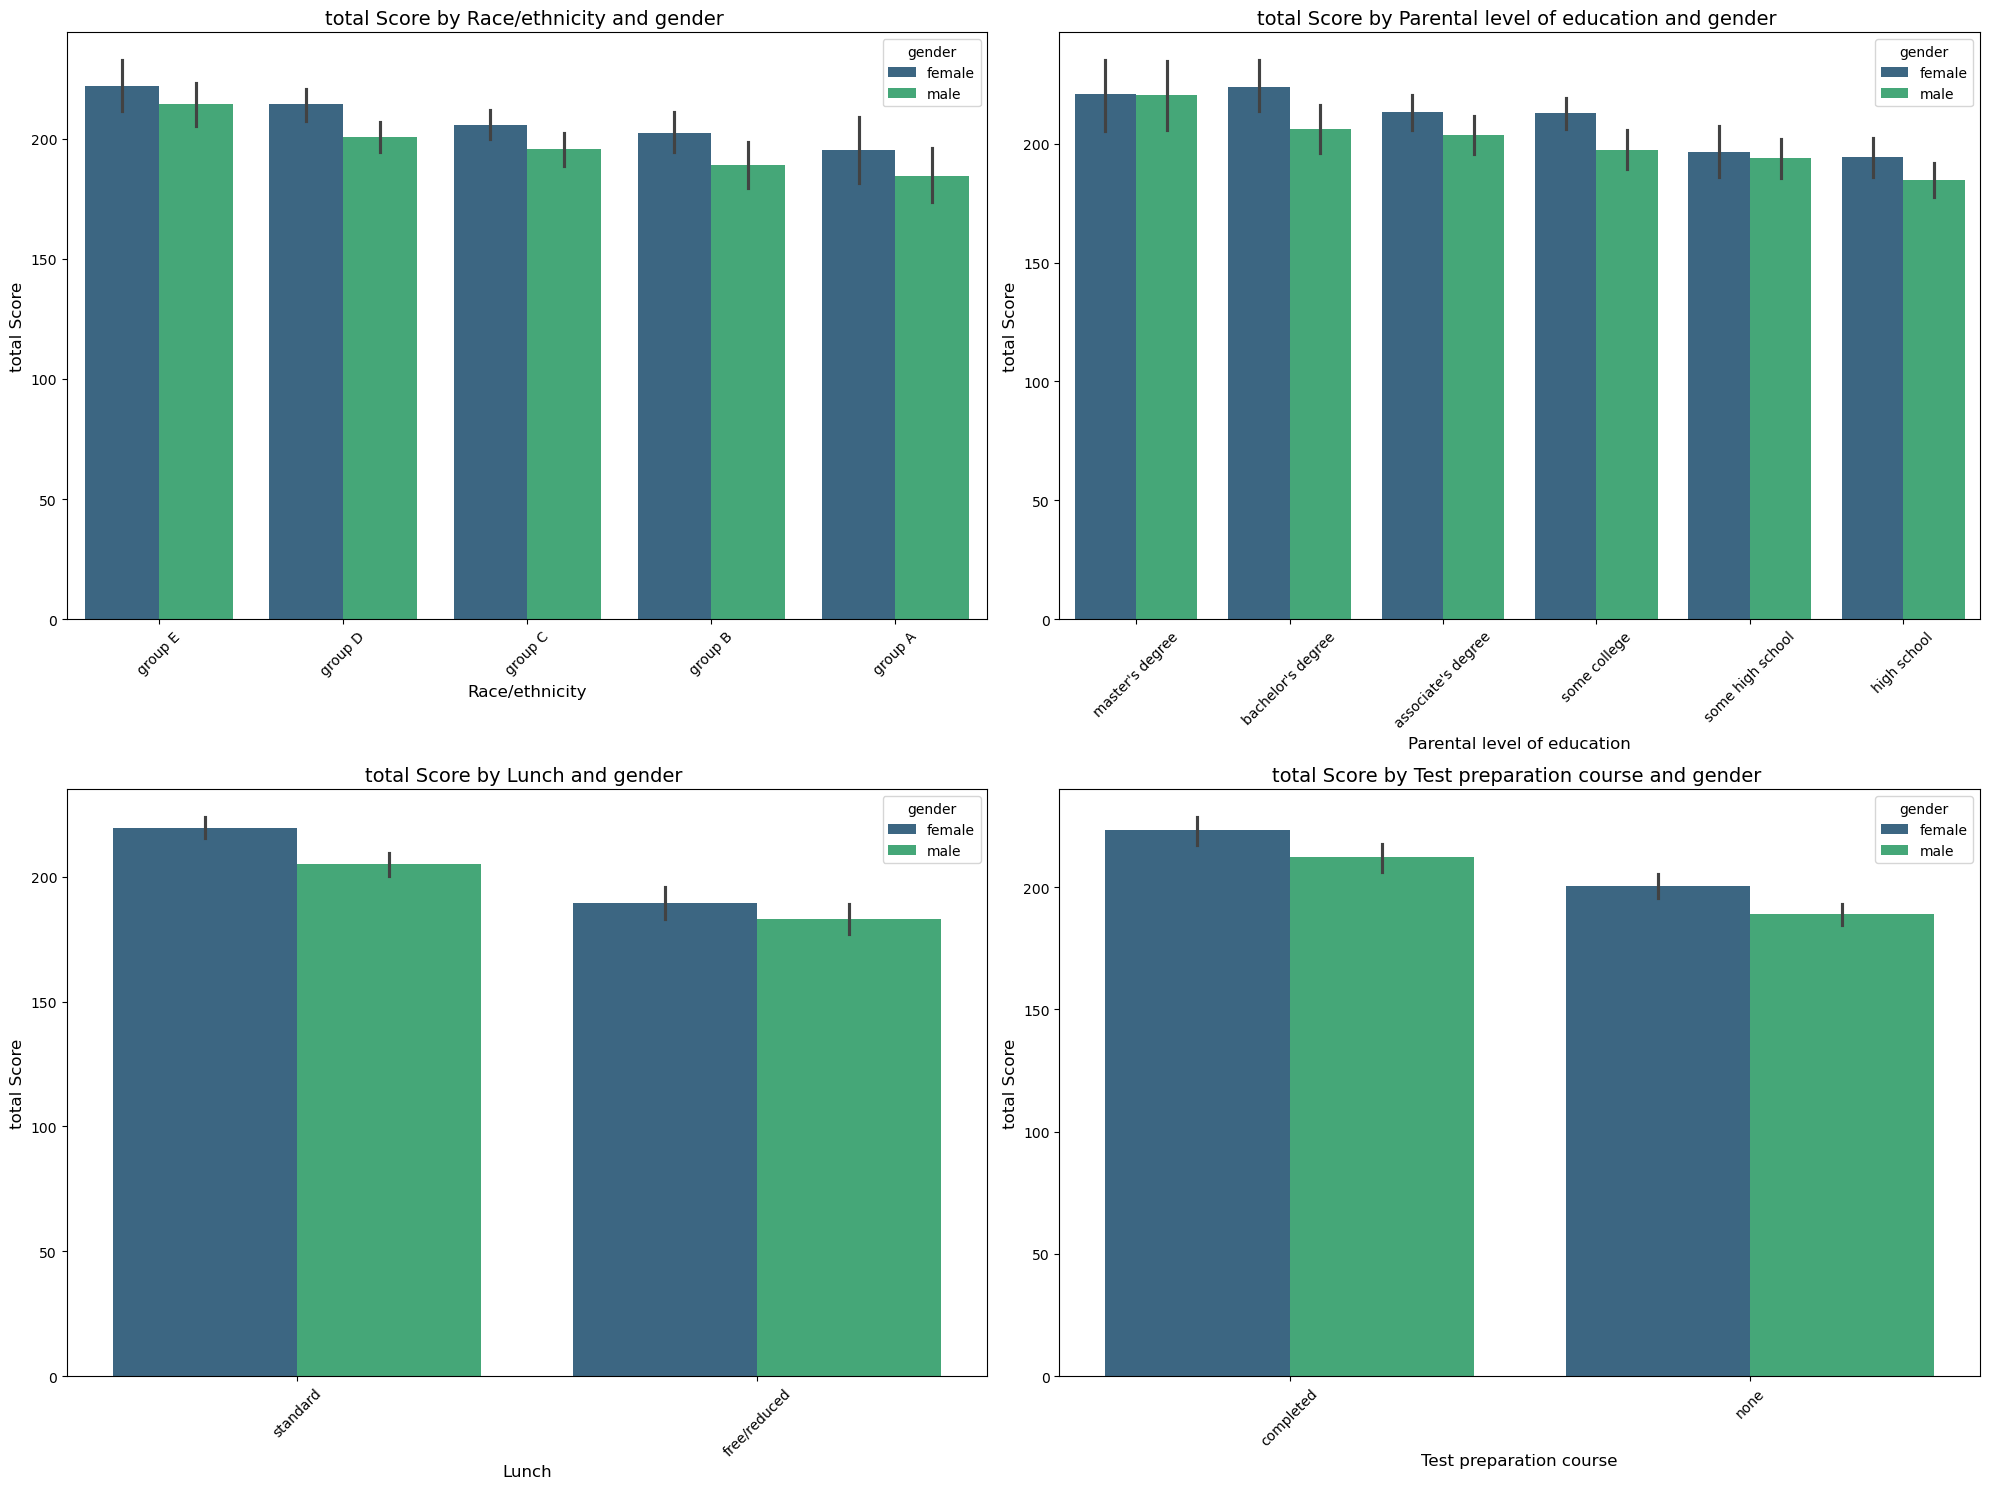

In [23]:

categorical_Features = ['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(categorical_Features):
    order = df.groupby(feature)['total score'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x=feature, y='total score', hue='gender',ax=axes[i], palette='viridis',order=order)
    axes[i].set_title(f'total Score by {feature.capitalize()} and gender ', fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('total Score', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


In [24]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total score'],
      dtype='object')

`Math Scores by Categorical Features and race/ethnicity`

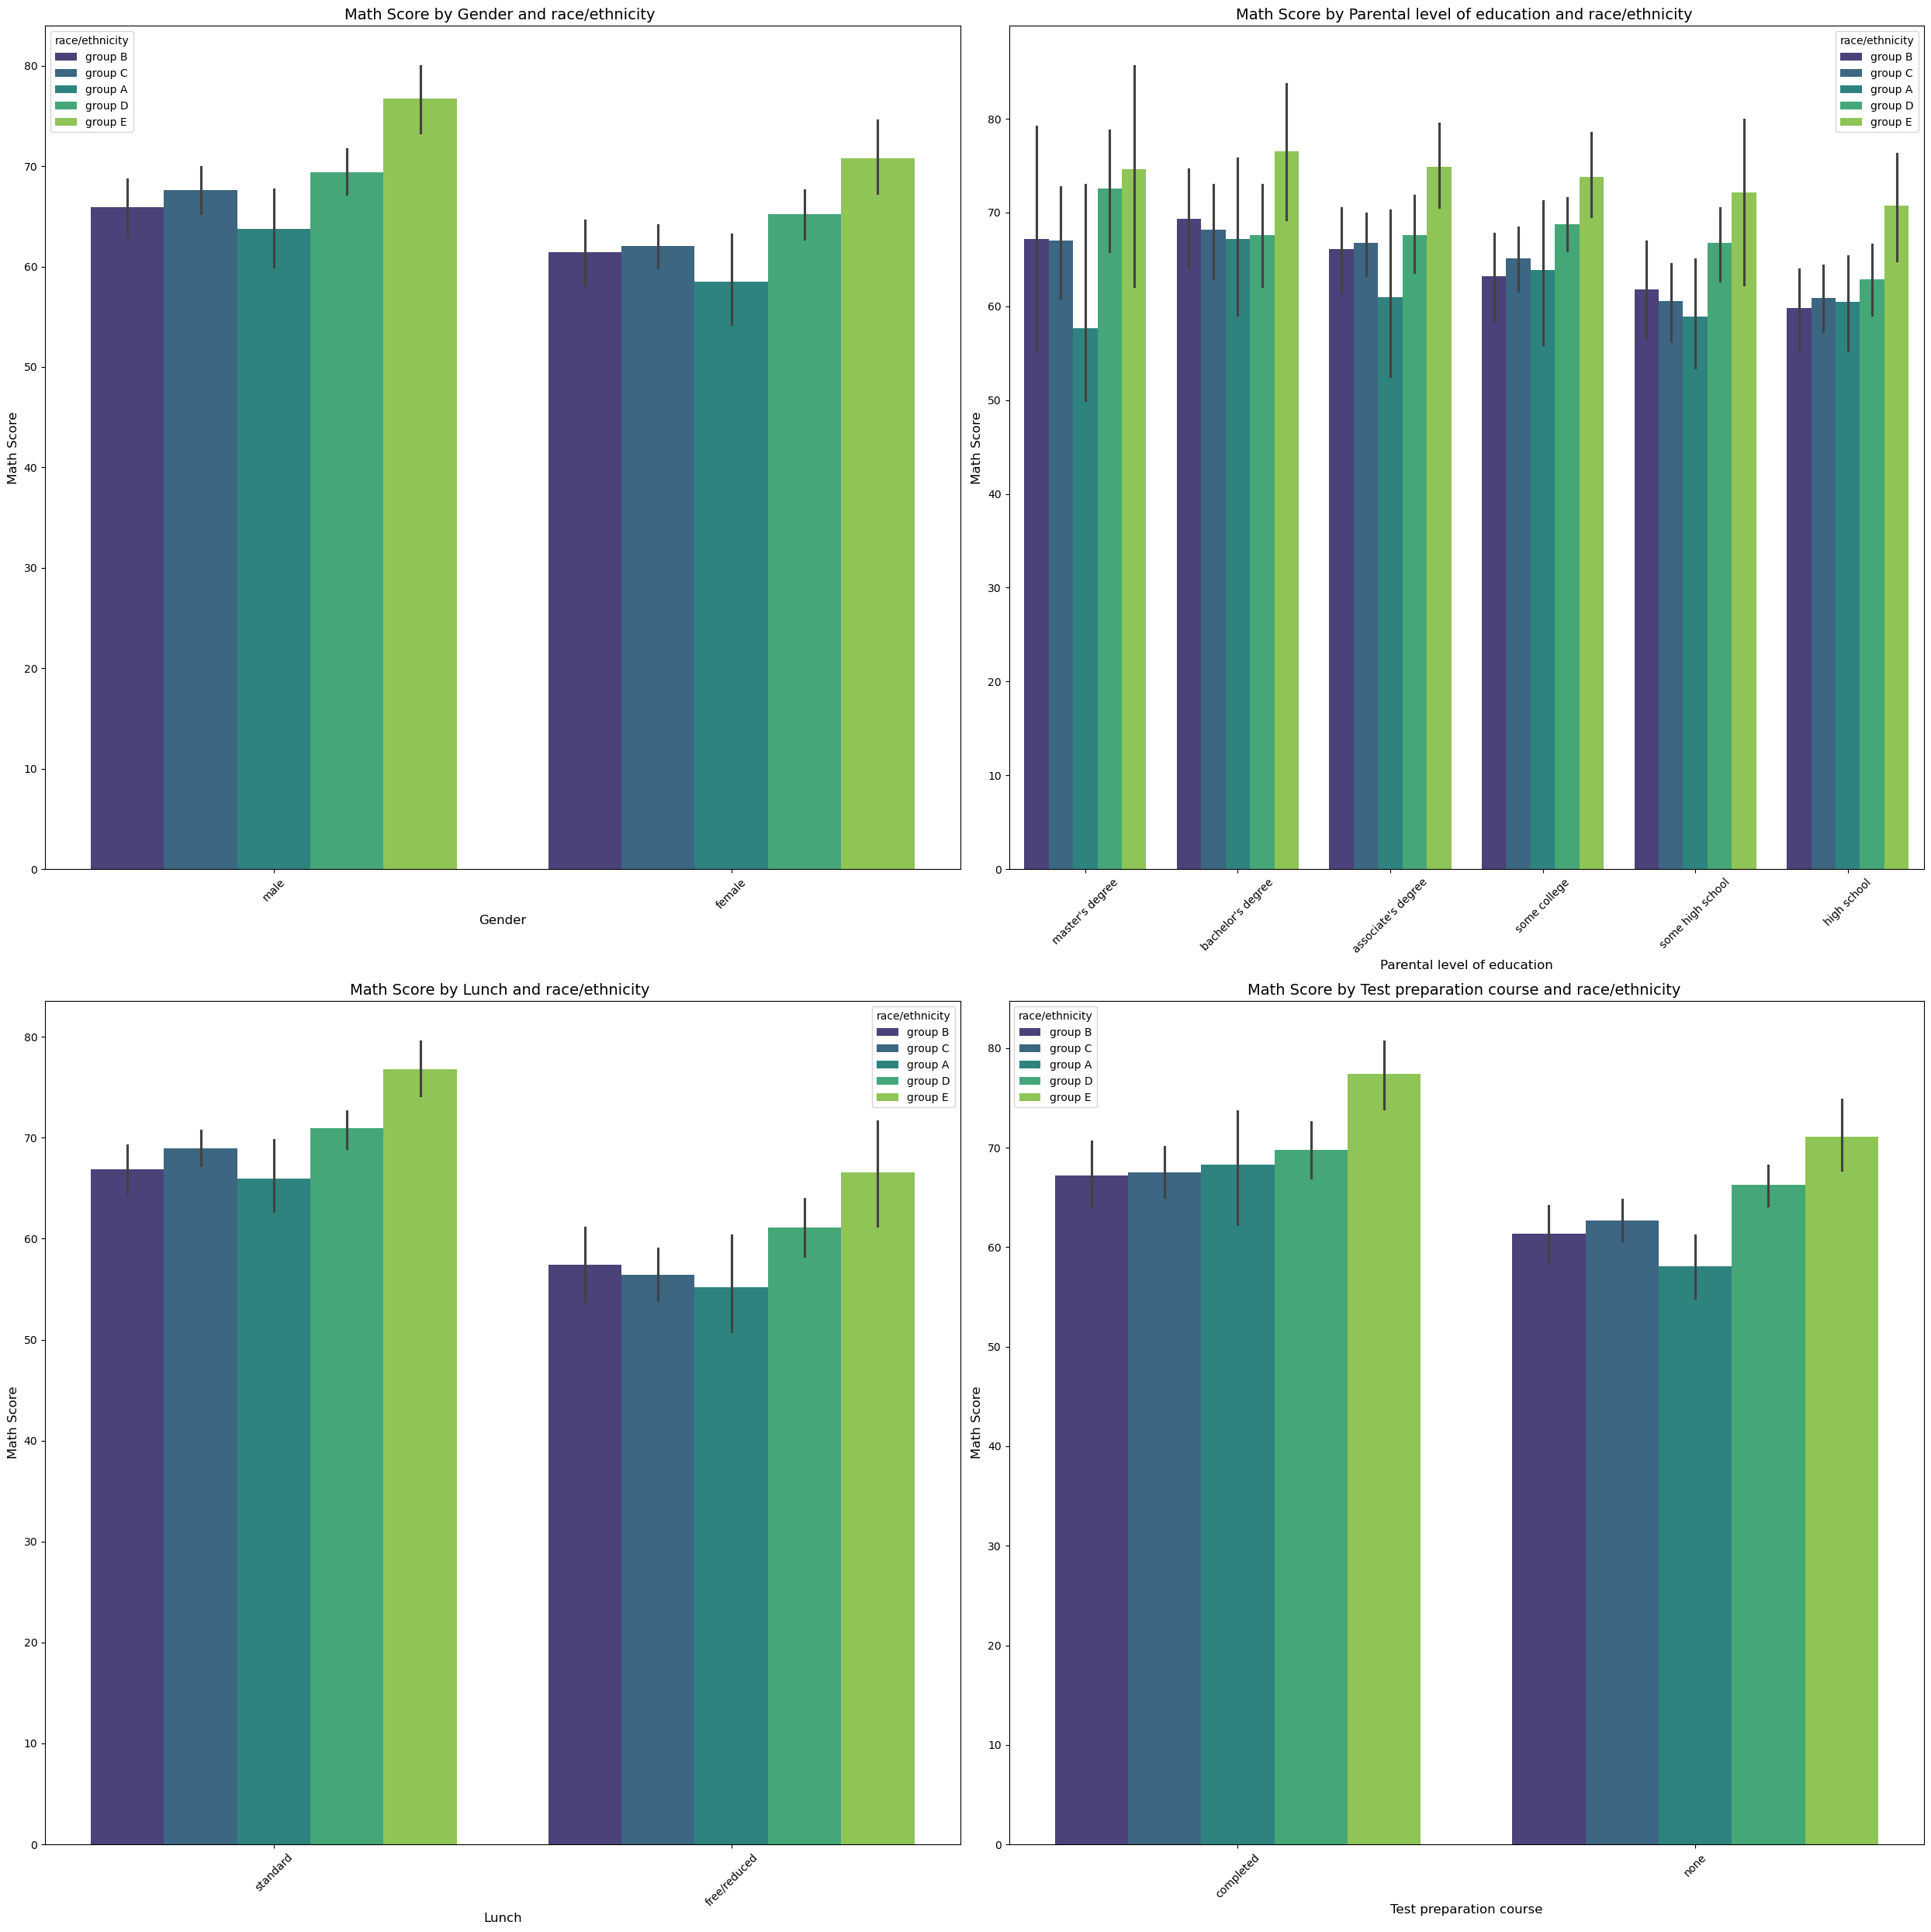

In [25]:

categorical_Features = ['gender', 'parental level of education', 'lunch', 'test preparation course']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 25))
axes = axes.flatten()

for i, feature in enumerate(categorical_Features):
    order = df.groupby(feature)['math score'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x=feature, y='math score', hue='race/ethnicity',ax=axes[i], palette='viridis',order=order)
    axes[i].set_title(f'Math Score by {feature.capitalize()} and race/ethnicity ', fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('Math Score', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


`Reading Scores by Categorical Features and race/ethnicity`

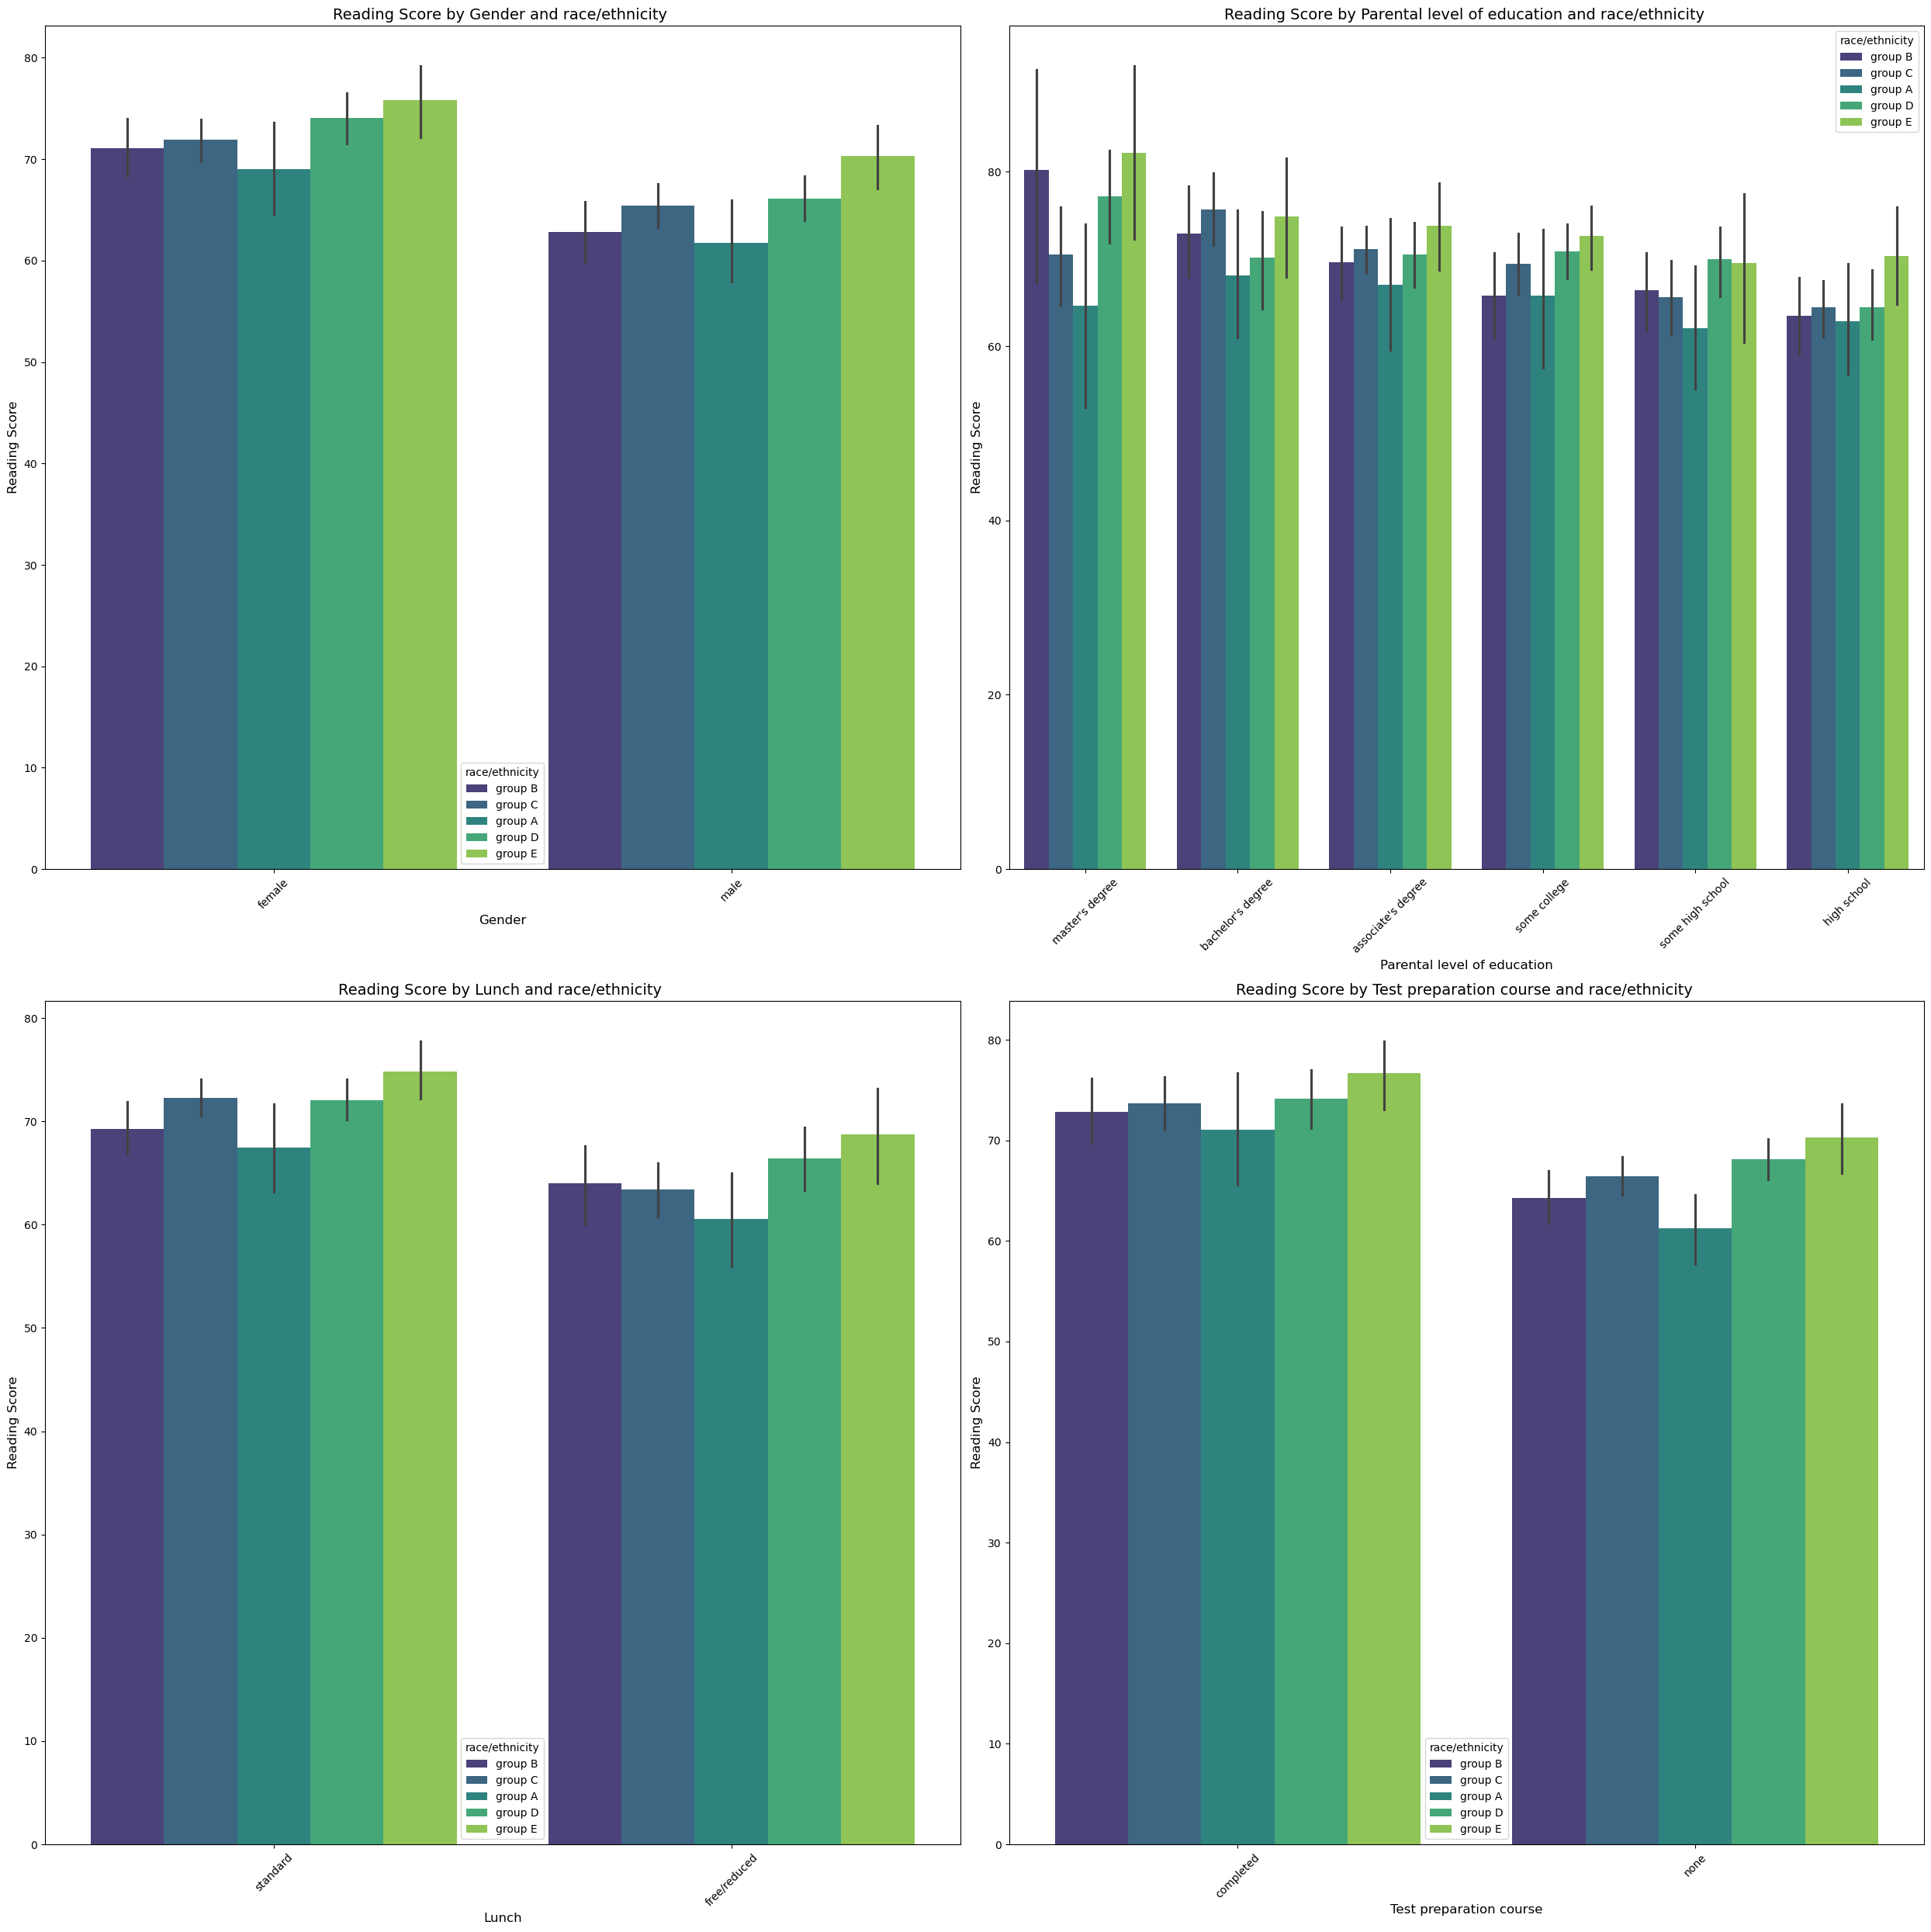

In [26]:

categorical_Features = ['gender', 'parental level of education', 'lunch', 'test preparation course']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 25))
axes = axes.flatten()

for i, feature in enumerate(categorical_Features):
    order = df.groupby(feature)['reading score'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x=feature, y='reading score', hue='race/ethnicity',ax=axes[i], palette='viridis',order=order)
    axes[i].set_title(f'Reading Score by {feature.capitalize()} and race/ethnicity ', fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('Reading Score', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


`Writing Scores by Categorical Features and race/ethnicity`

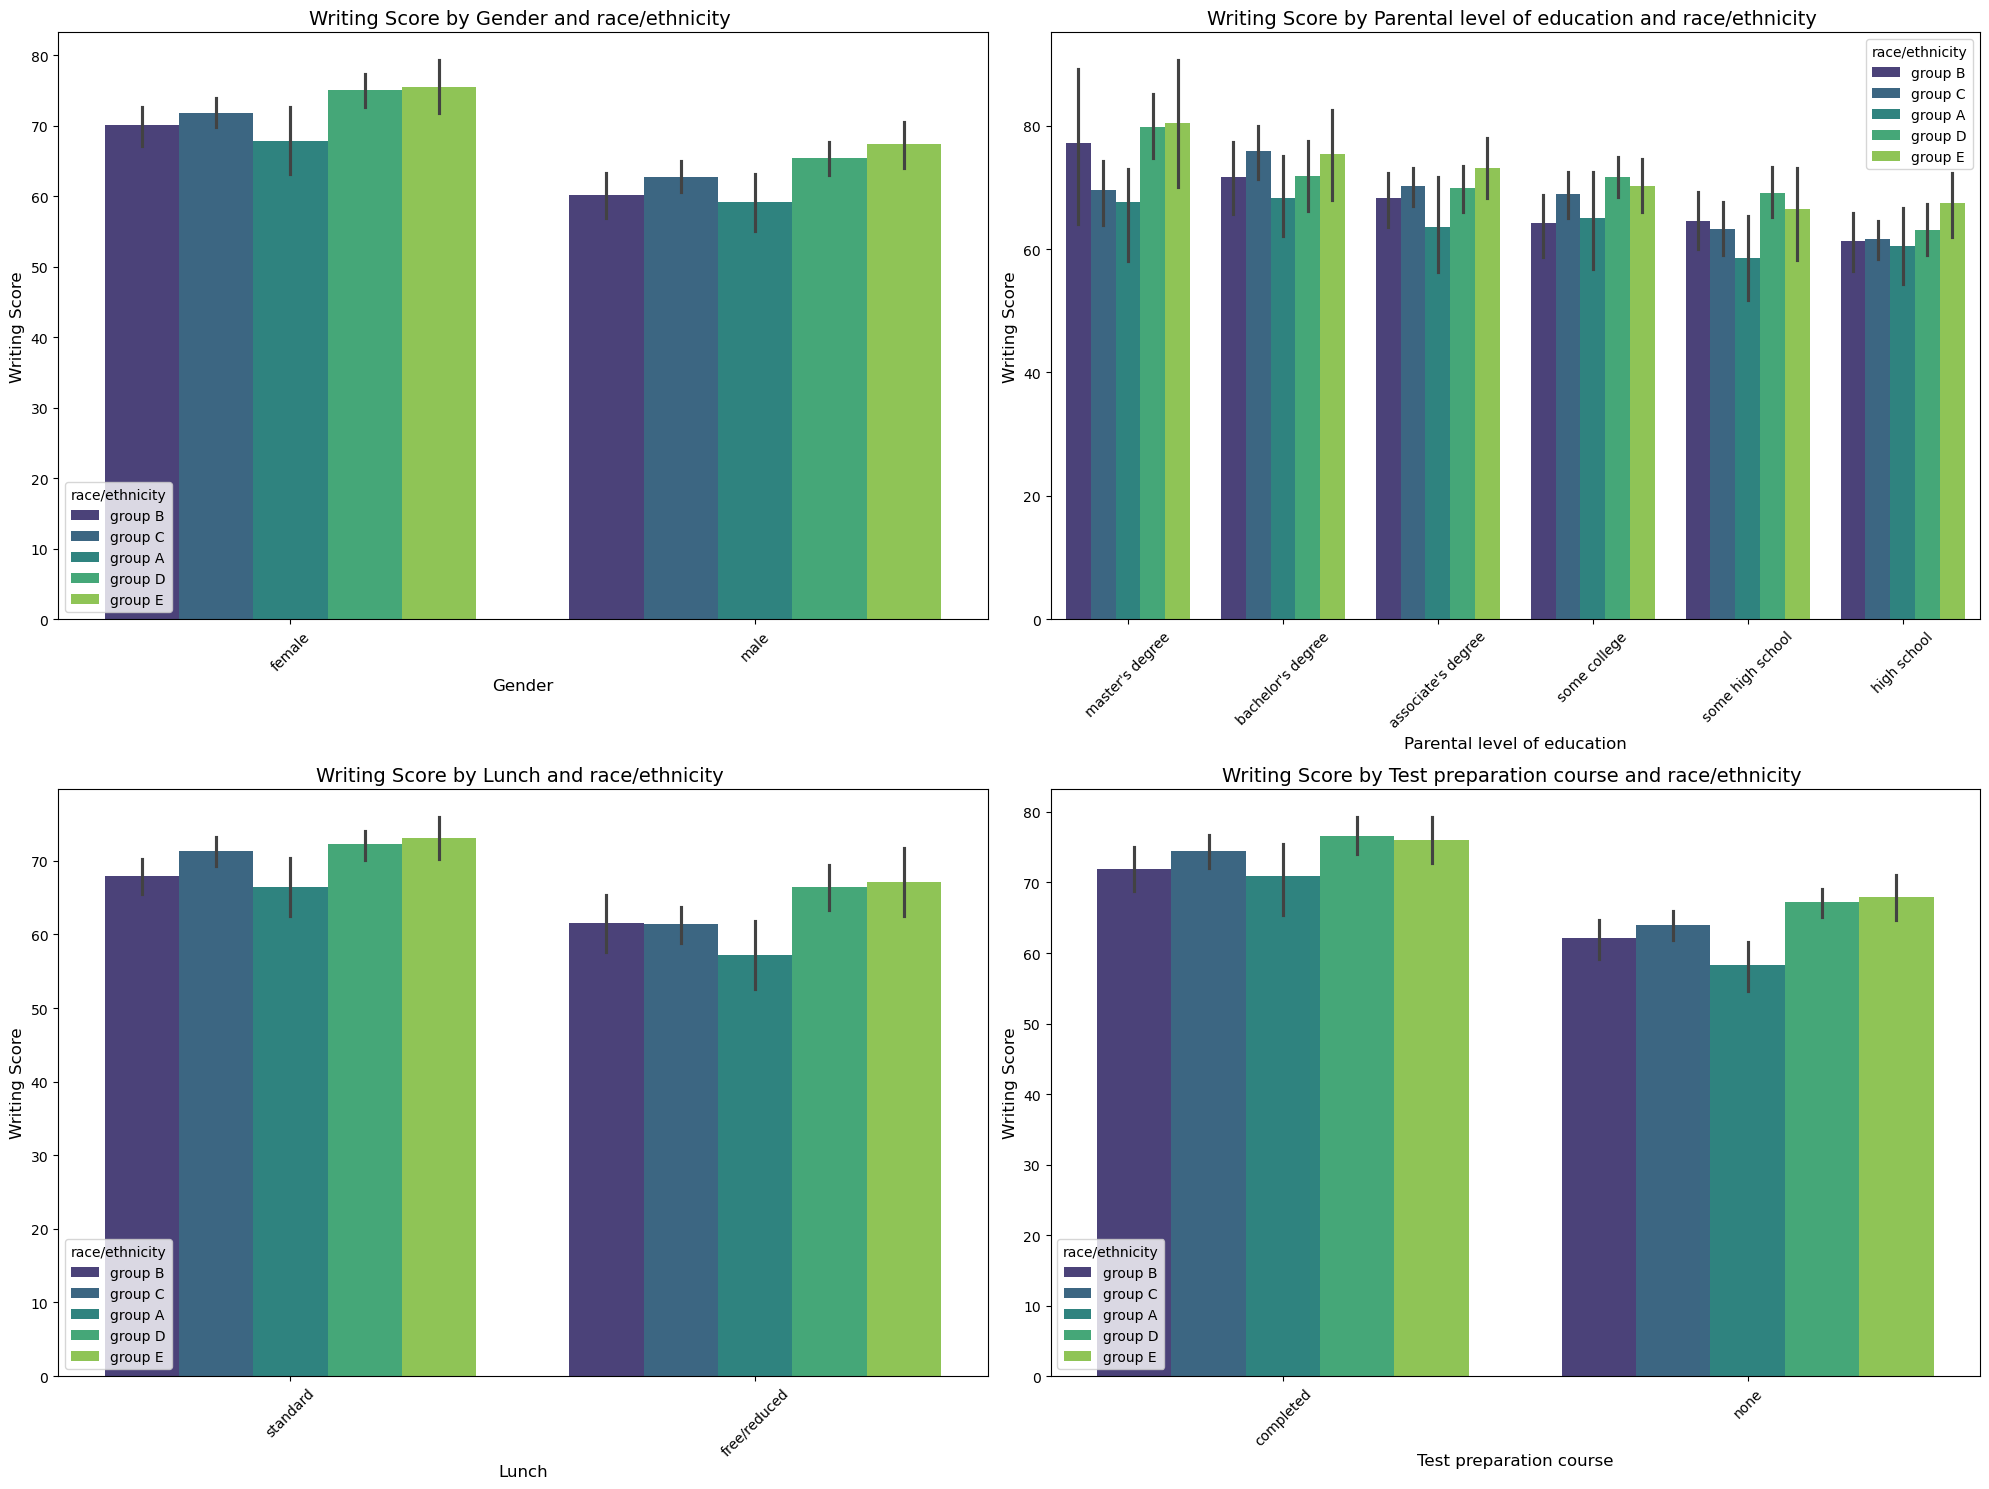

In [27]:

categorical_Features = ['gender', 'parental level of education', 'lunch', 'test preparation course']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(categorical_Features):
    order = df.groupby(feature)['writing score'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x=feature, y='writing score', hue='race/ethnicity',ax=axes[i], palette='viridis',order=order)
    axes[i].set_title(f'Writing Score by {feature.capitalize()} and race/ethnicity ', fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('Writing Score', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


`Total Scores by Categorical Features and race/ethnicity`

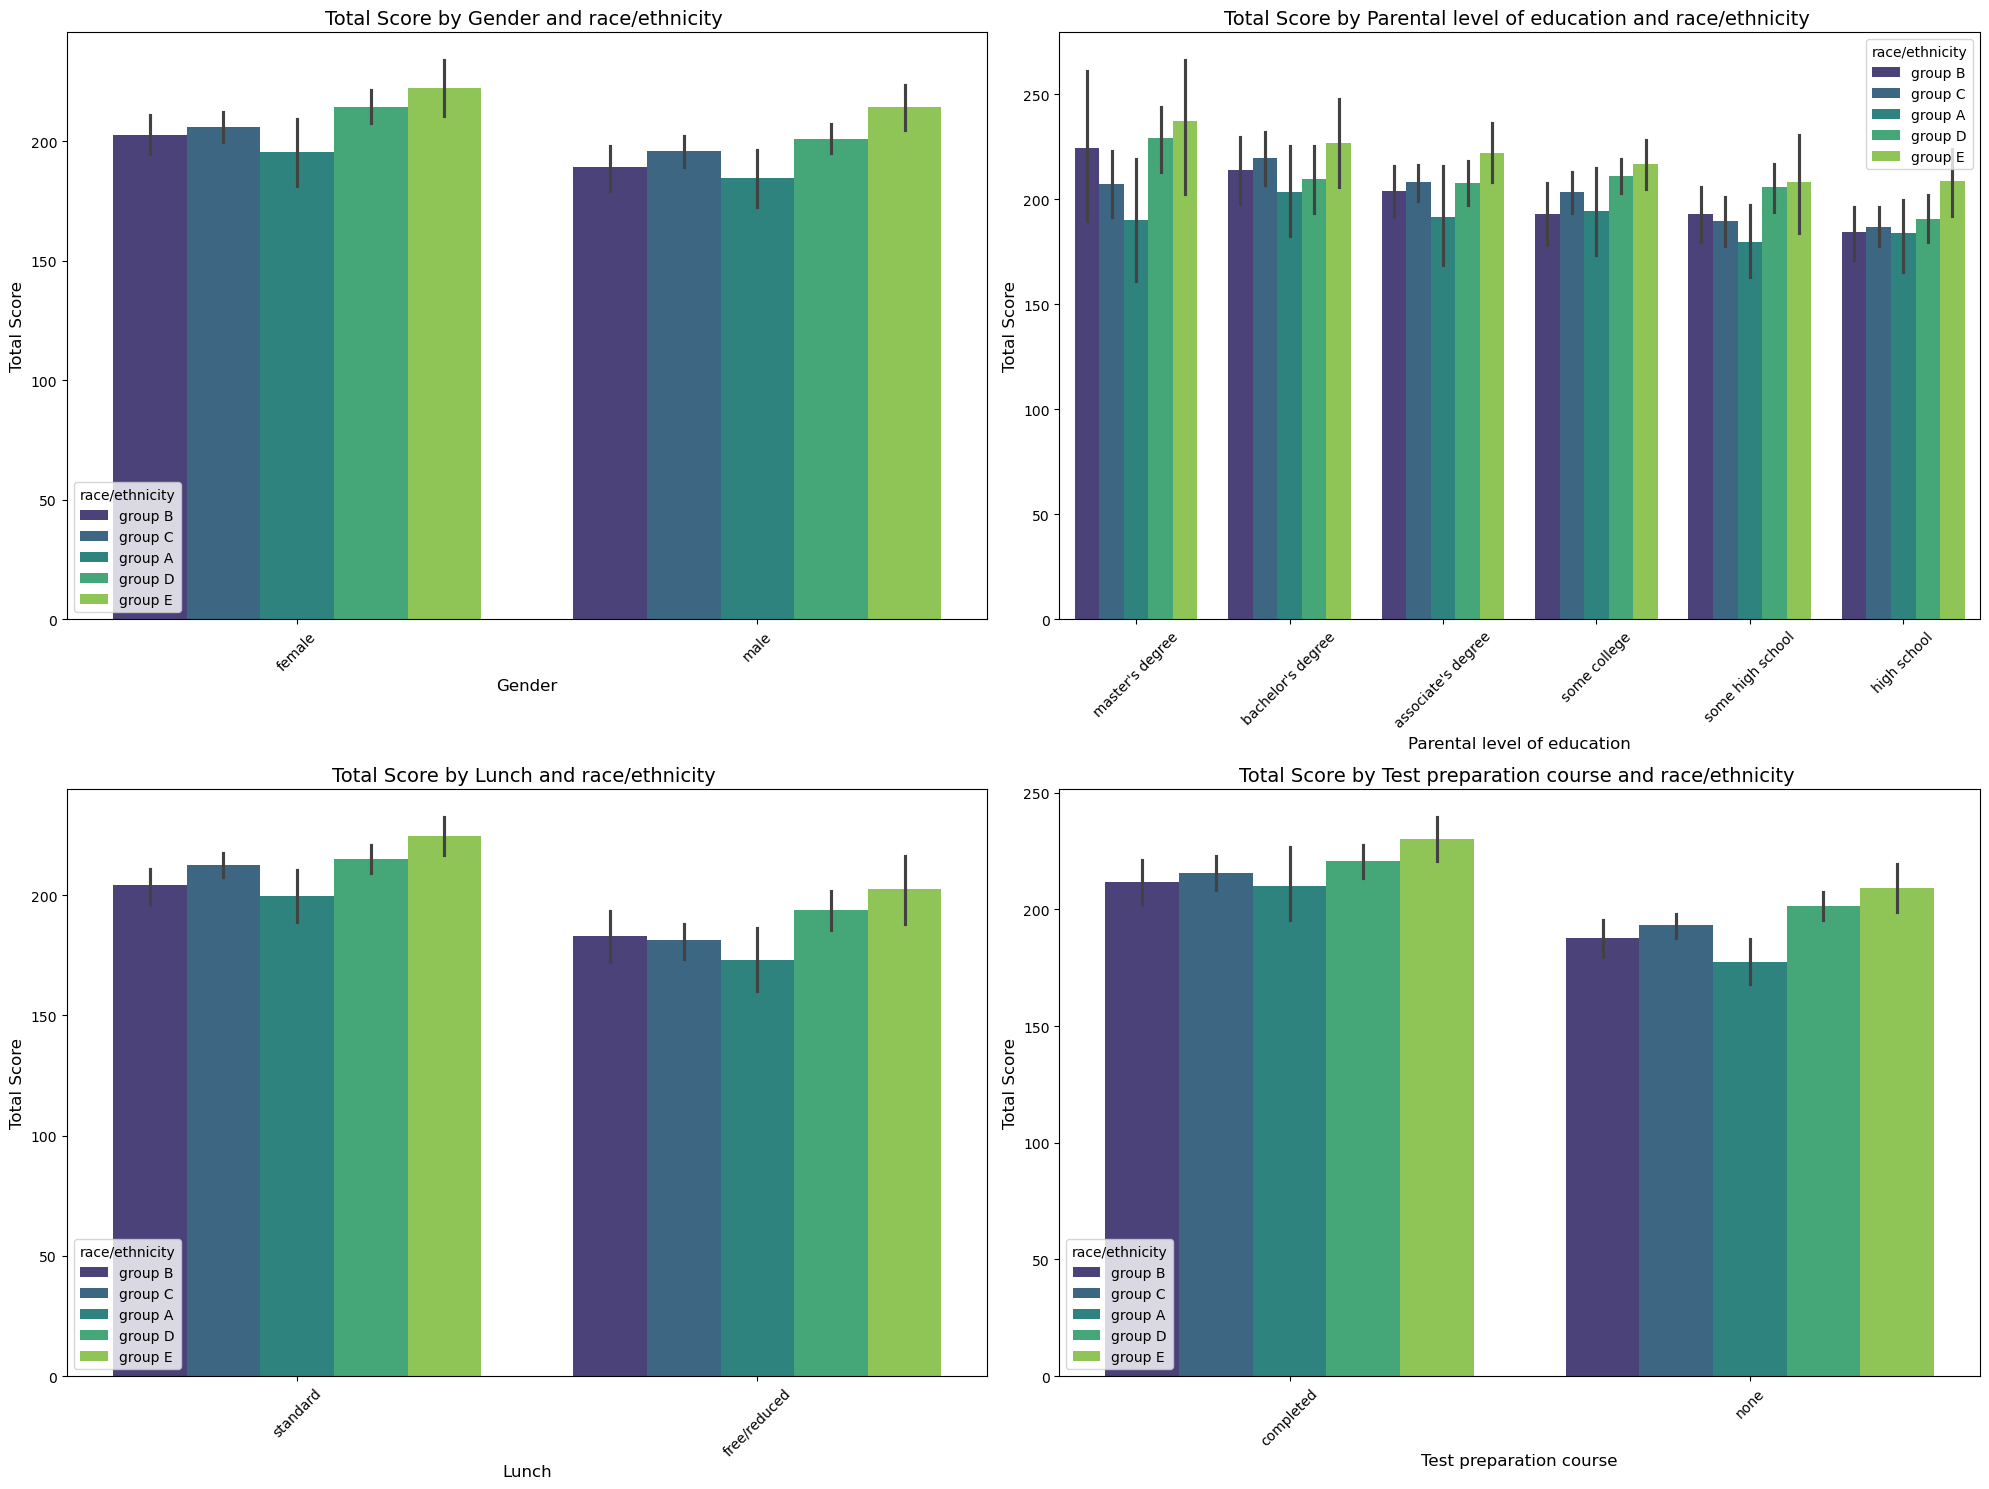

In [28]:

categorical_Features = ['gender', 'parental level of education', 'lunch', 'test preparation course']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(categorical_Features):
   
    order = df.groupby(feature)['total score'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x=feature, y='total score', hue='race/ethnicity',ax=axes[i], palette='viridis',order=order)
    axes[i].set_title(f'Total Score by {feature.capitalize()} and race/ethnicity ', fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('Total Score', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


`Math Scores by Categorical Features and parental level of education`


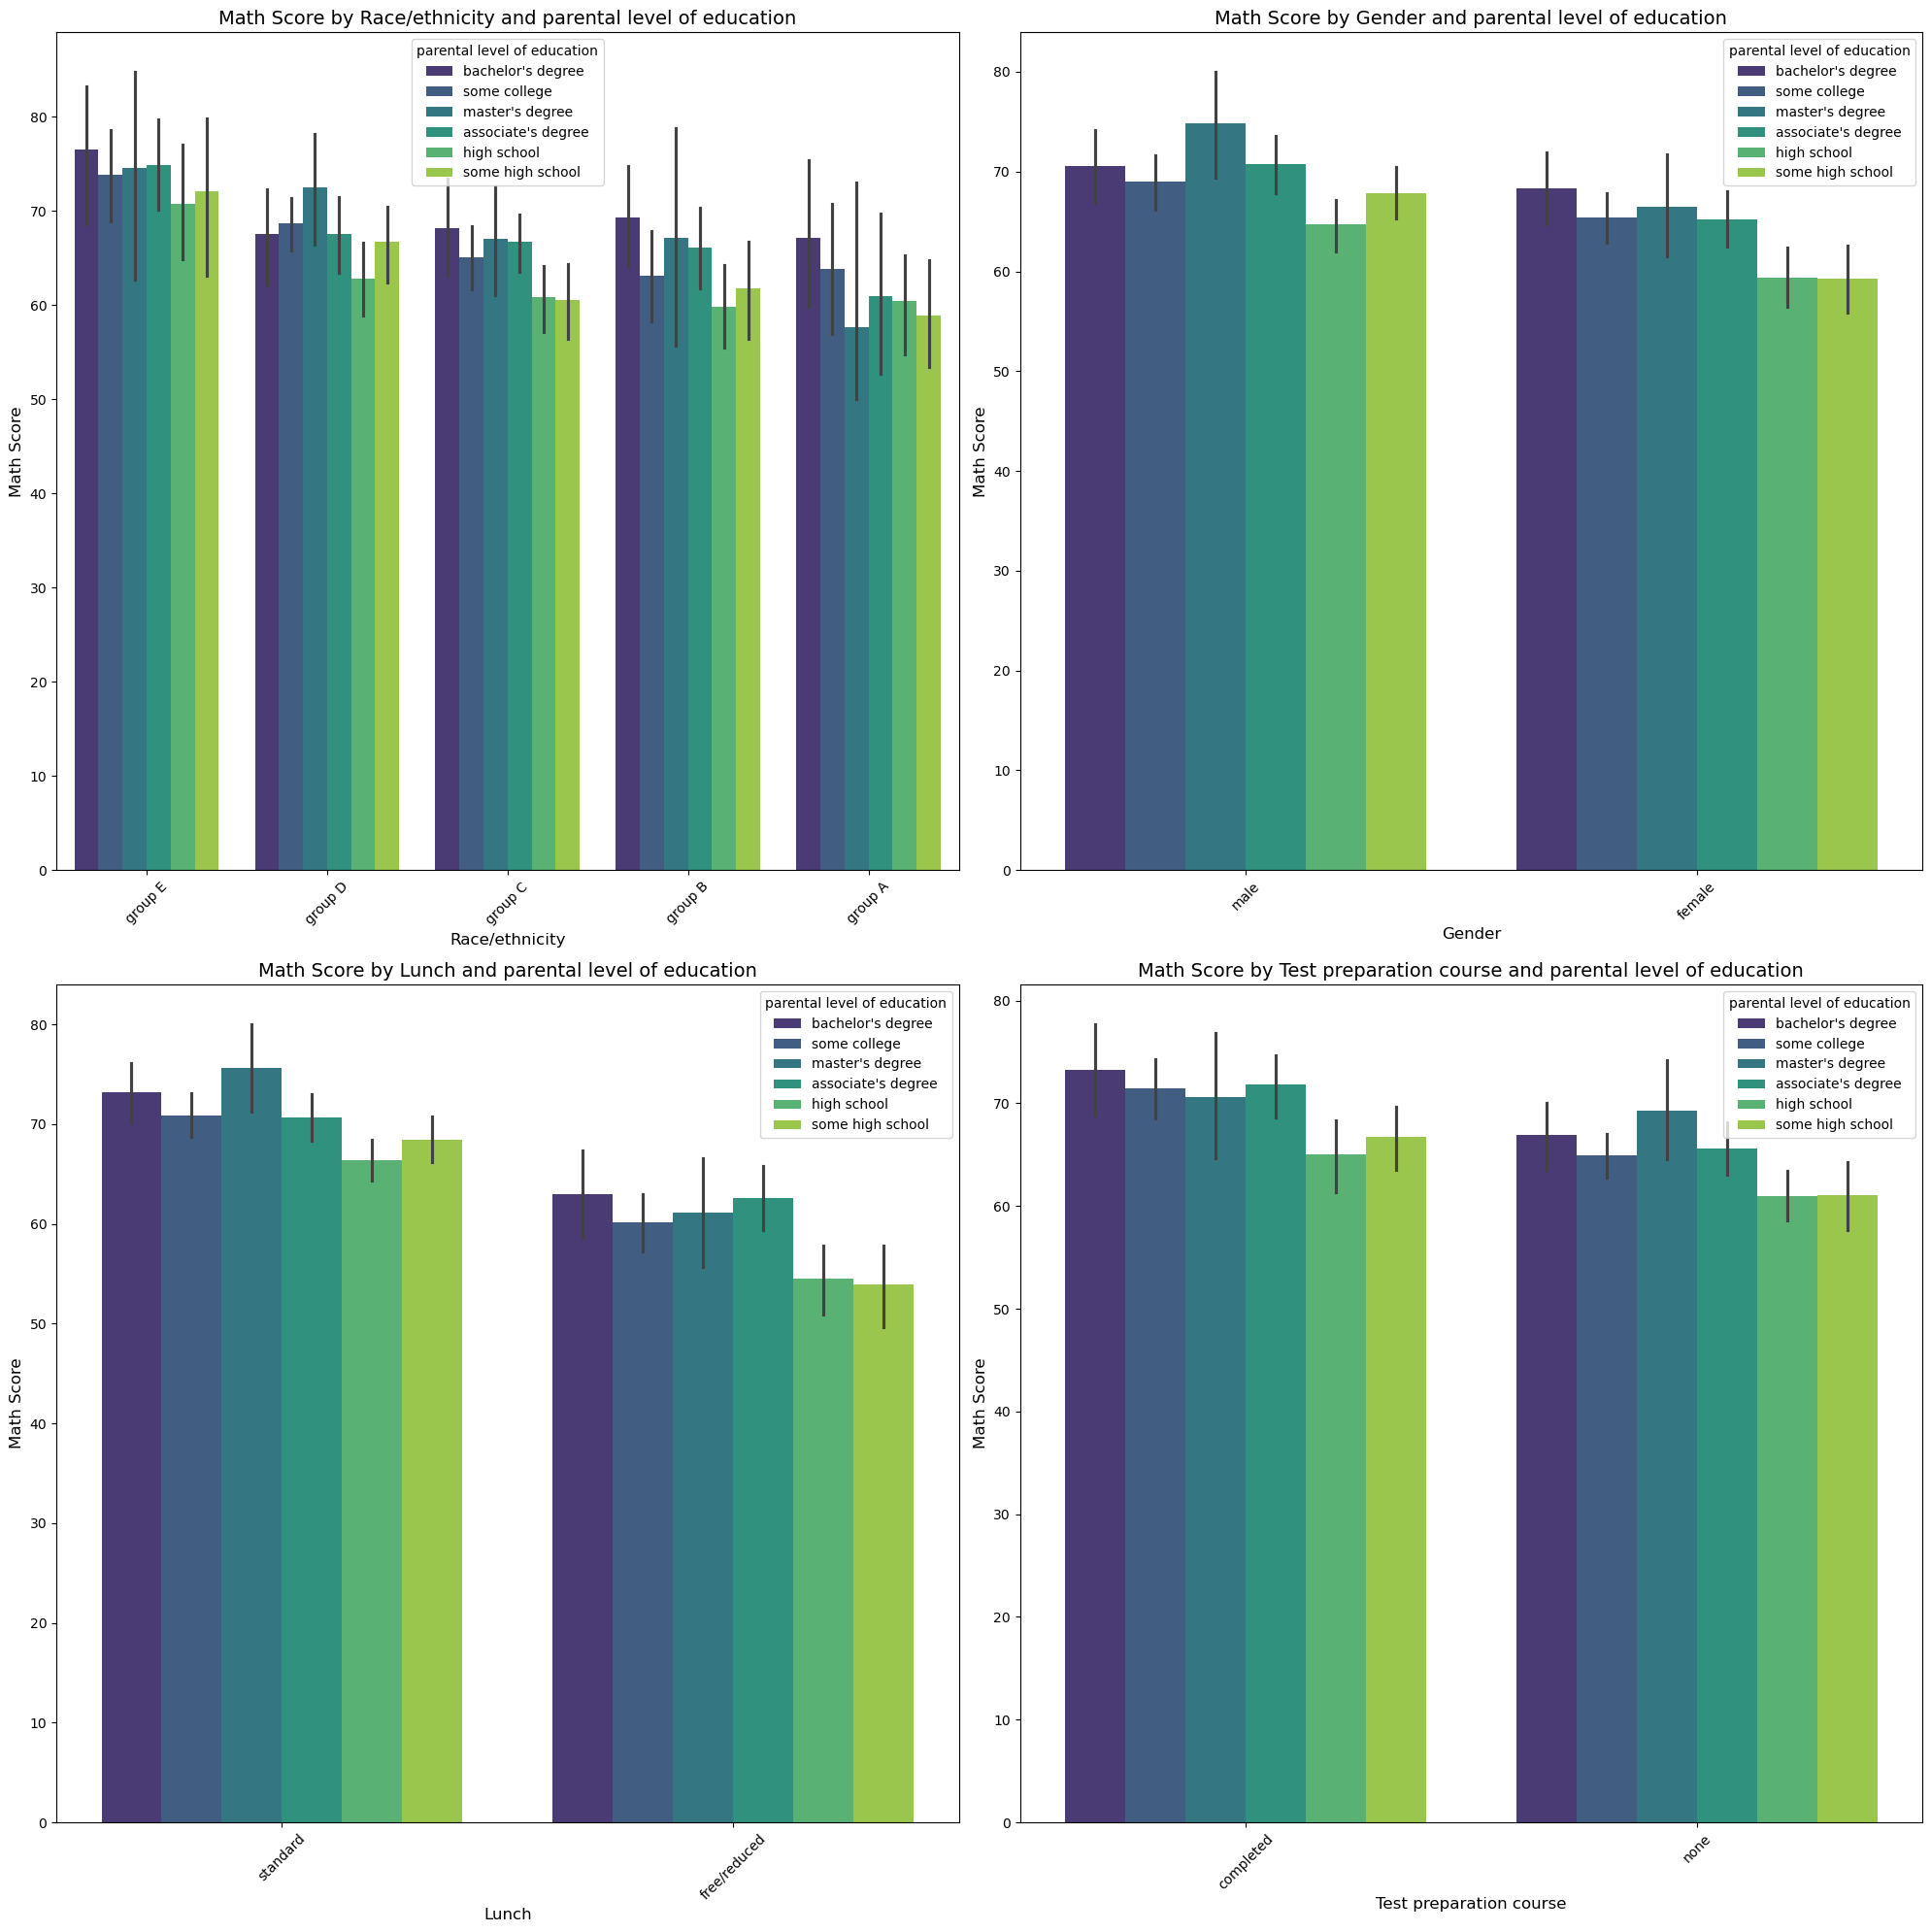

In [29]:

categorical_Features = ['race/ethnicity','gender','lunch', 'test preparation course']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(categorical_Features):
   
    order = df.groupby(feature)['math score'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x=feature, y='math score', hue='parental level of education',ax=axes[i], palette='viridis',order=order)
    axes[i].set_title(f'Math Score by {feature.capitalize()} and parental level of education', fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('Math Score', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


`Reading Scores by Categorical Features and parental level of education`

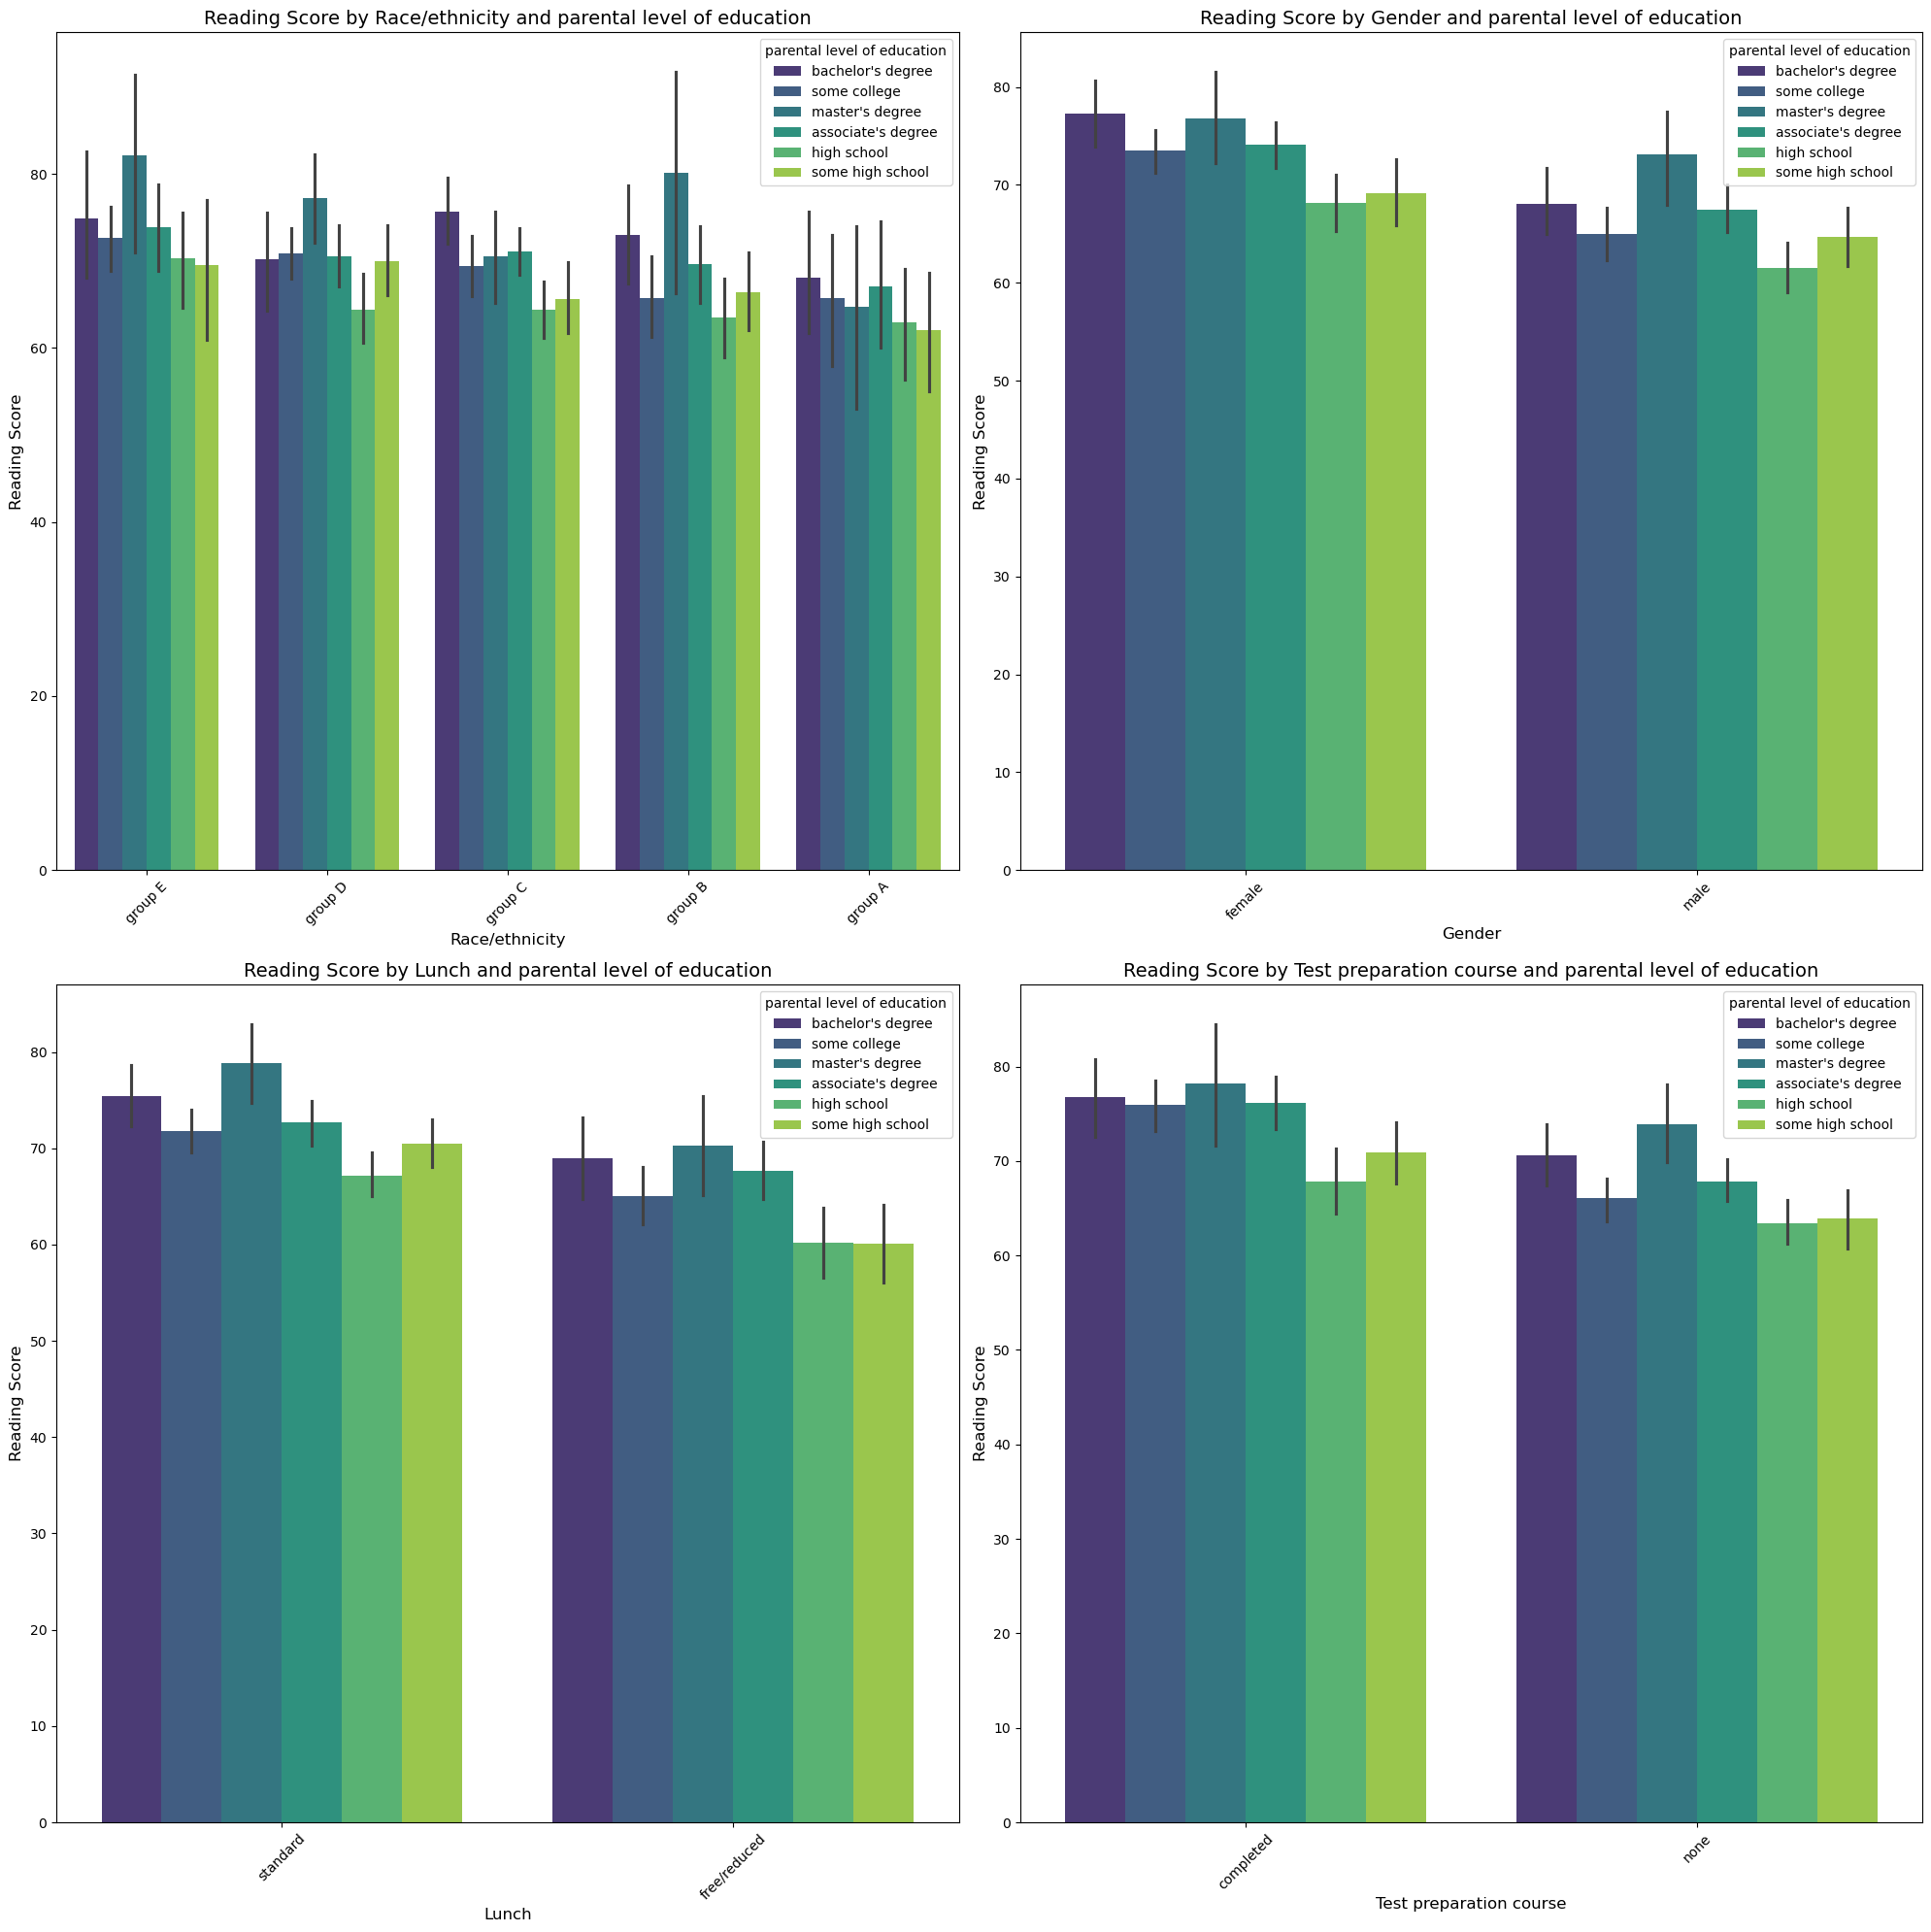

In [30]:

categorical_Features = ['race/ethnicity','gender','lunch', 'test preparation course']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(categorical_Features):
   
    order = df.groupby(feature)['reading score'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x=feature, y='reading score', hue='parental level of education',ax=axes[i], palette='viridis',order=order)
    axes[i].set_title(f'Reading Score by {feature.capitalize()} and parental level of education', fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('Reading Score', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()



`Writing Scores by Categorical Features and parental level of education`

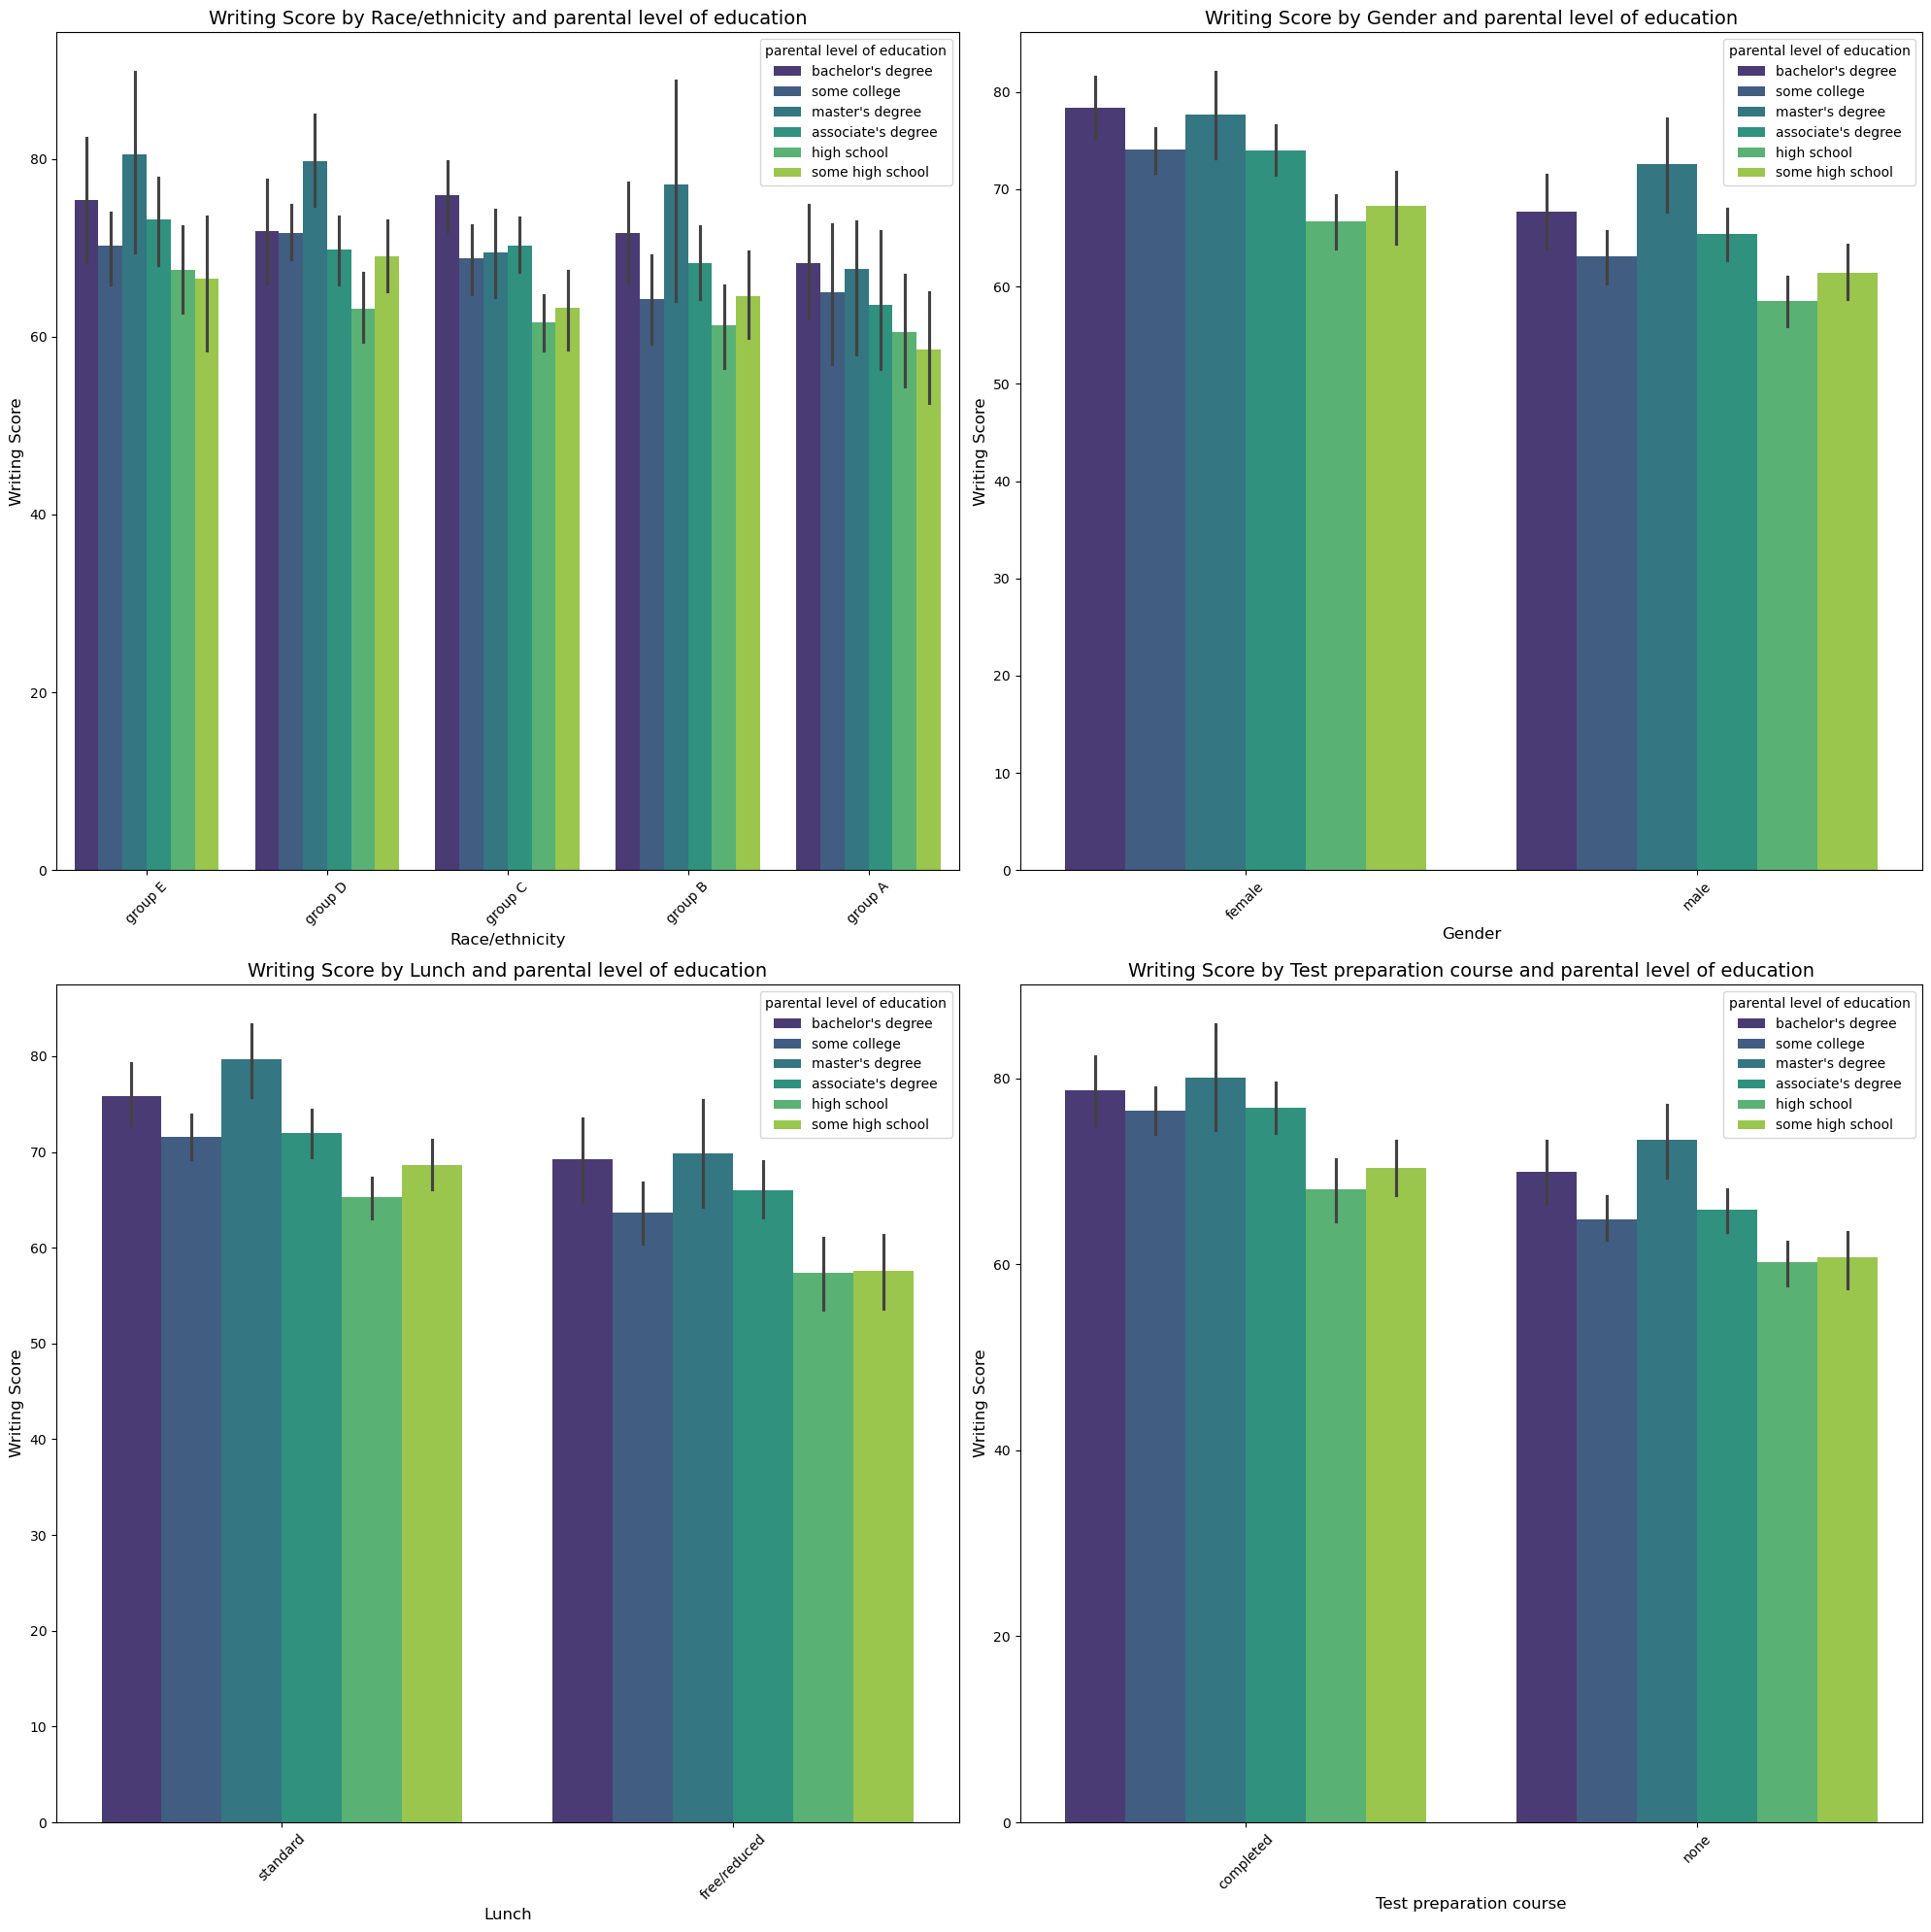

In [31]:

categorical_Features = ['race/ethnicity','gender','lunch', 'test preparation course']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(categorical_Features):
   
    order = df.groupby(feature)['writing score'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x=feature, y='writing score', hue='parental level of education',ax=axes[i], palette='viridis',order=order)
    axes[i].set_title(f'Writing Score by {feature.capitalize()} and parental level of education', fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('Writing Score', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()



`Total Scores by Categorical Features and parental level of education`

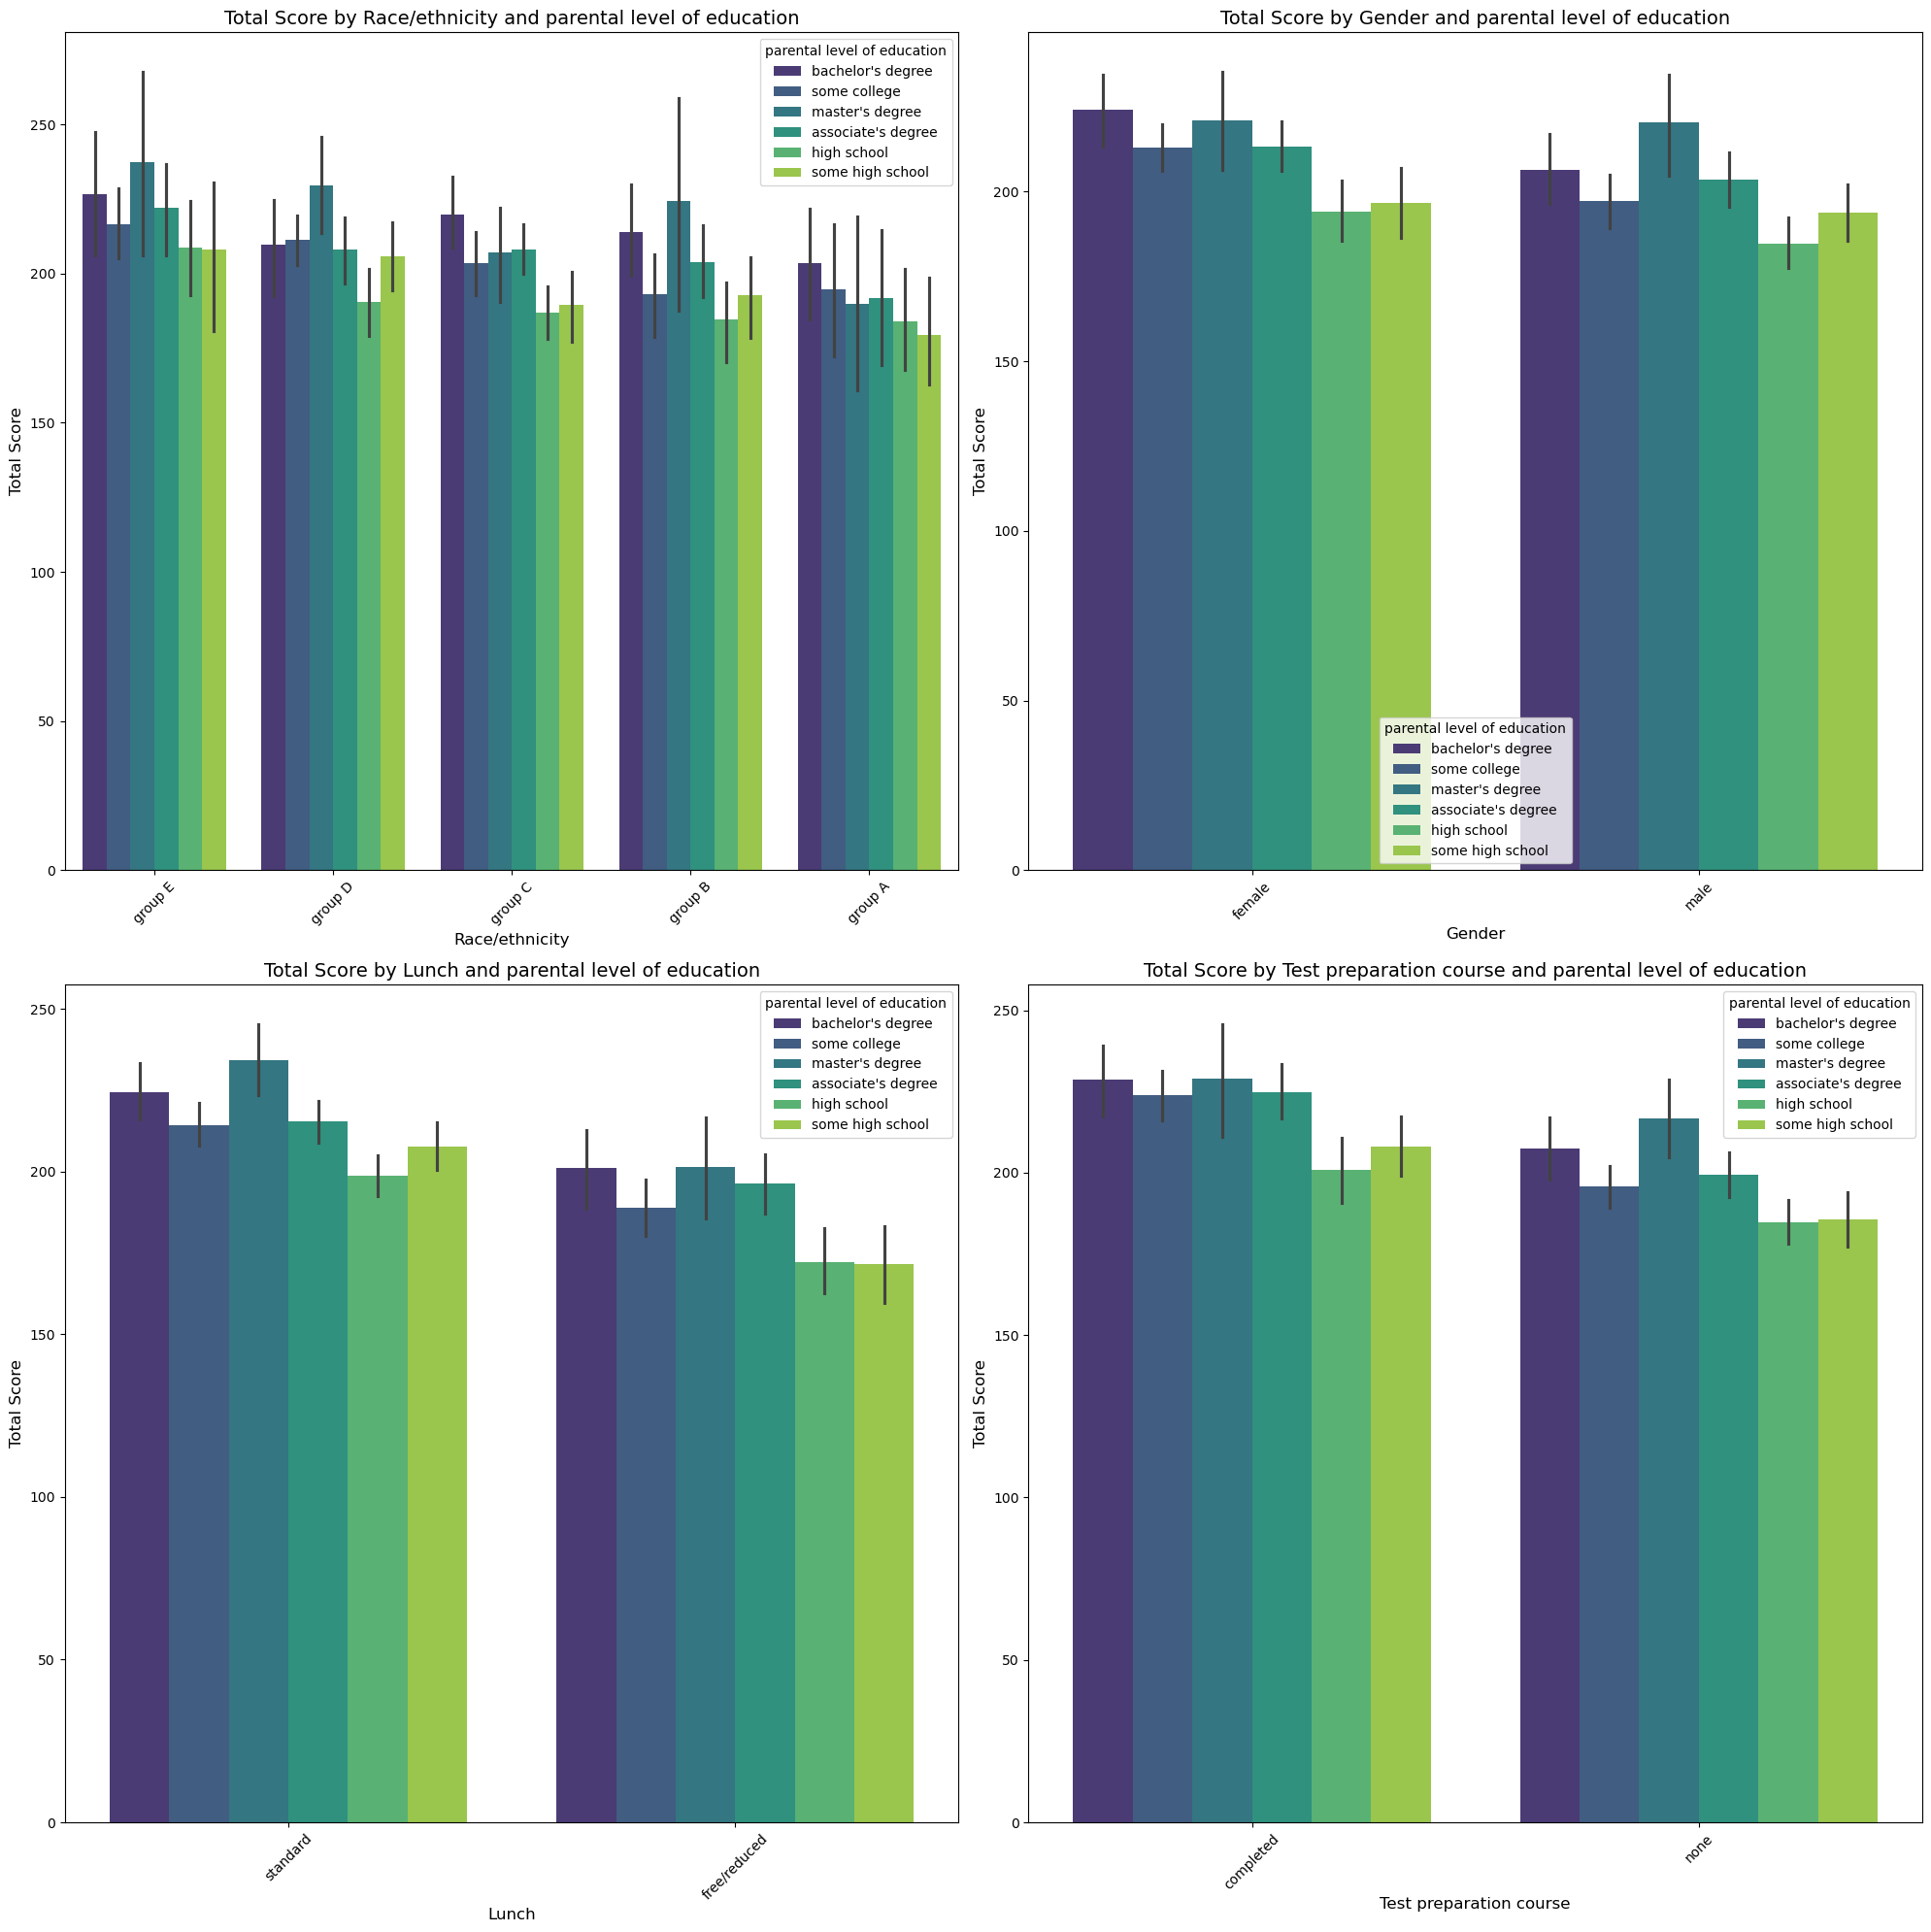

In [32]:

categorical_Features = ['race/ethnicity','gender','lunch', 'test preparation course']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(categorical_Features):
   
    order = df.groupby(feature)['total score'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x=feature, y='total score', hue='parental level of education',ax=axes[i], palette='viridis',order=order)
    axes[i].set_title(f'Total Score by {feature.capitalize()} and parental level of education', fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('Total Score', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


`Math Scores by Categorical Features and lunch`


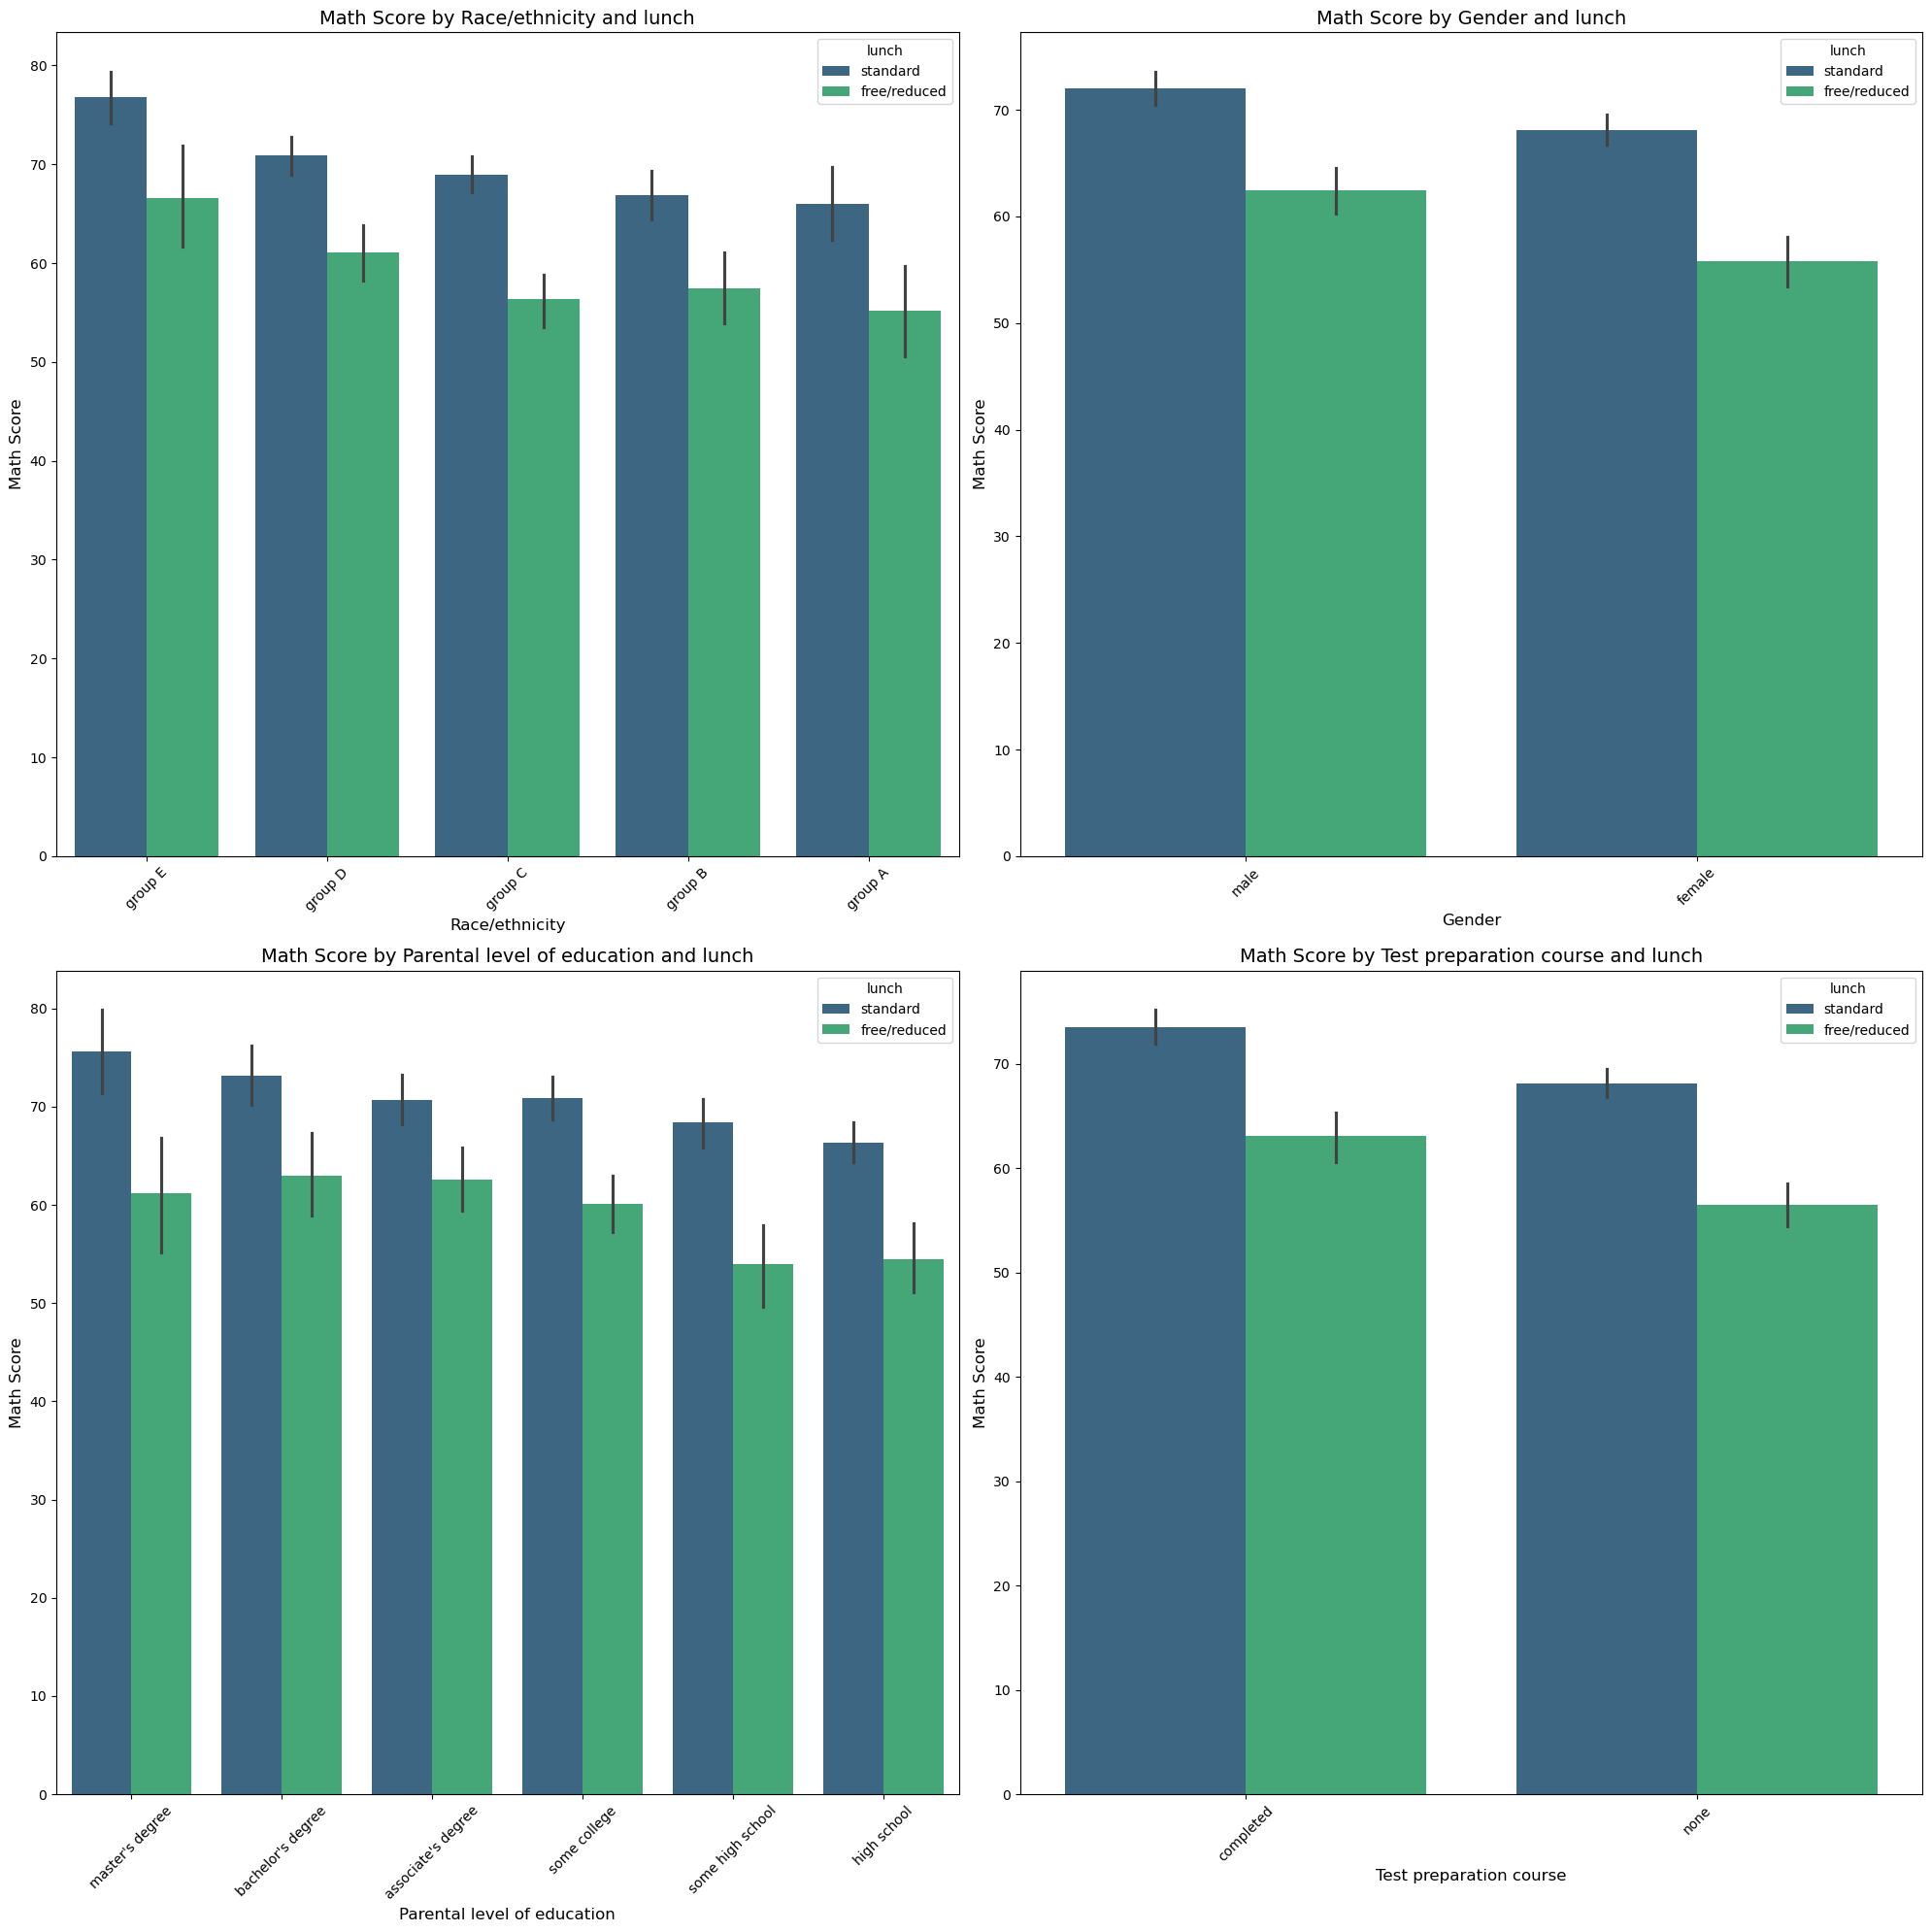

In [33]:

categorical_Features = ['race/ethnicity','gender','parental level of education', 'test preparation course']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(categorical_Features):
   
    order = df.groupby(feature)['math score'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x=feature, y='math score', hue='lunch',ax=axes[i], palette='viridis',order=order)
    axes[i].set_title(f'Math Score by {feature.capitalize()} and lunch', fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('Math Score', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


`Reading Scores by Categorical Features and lunch`

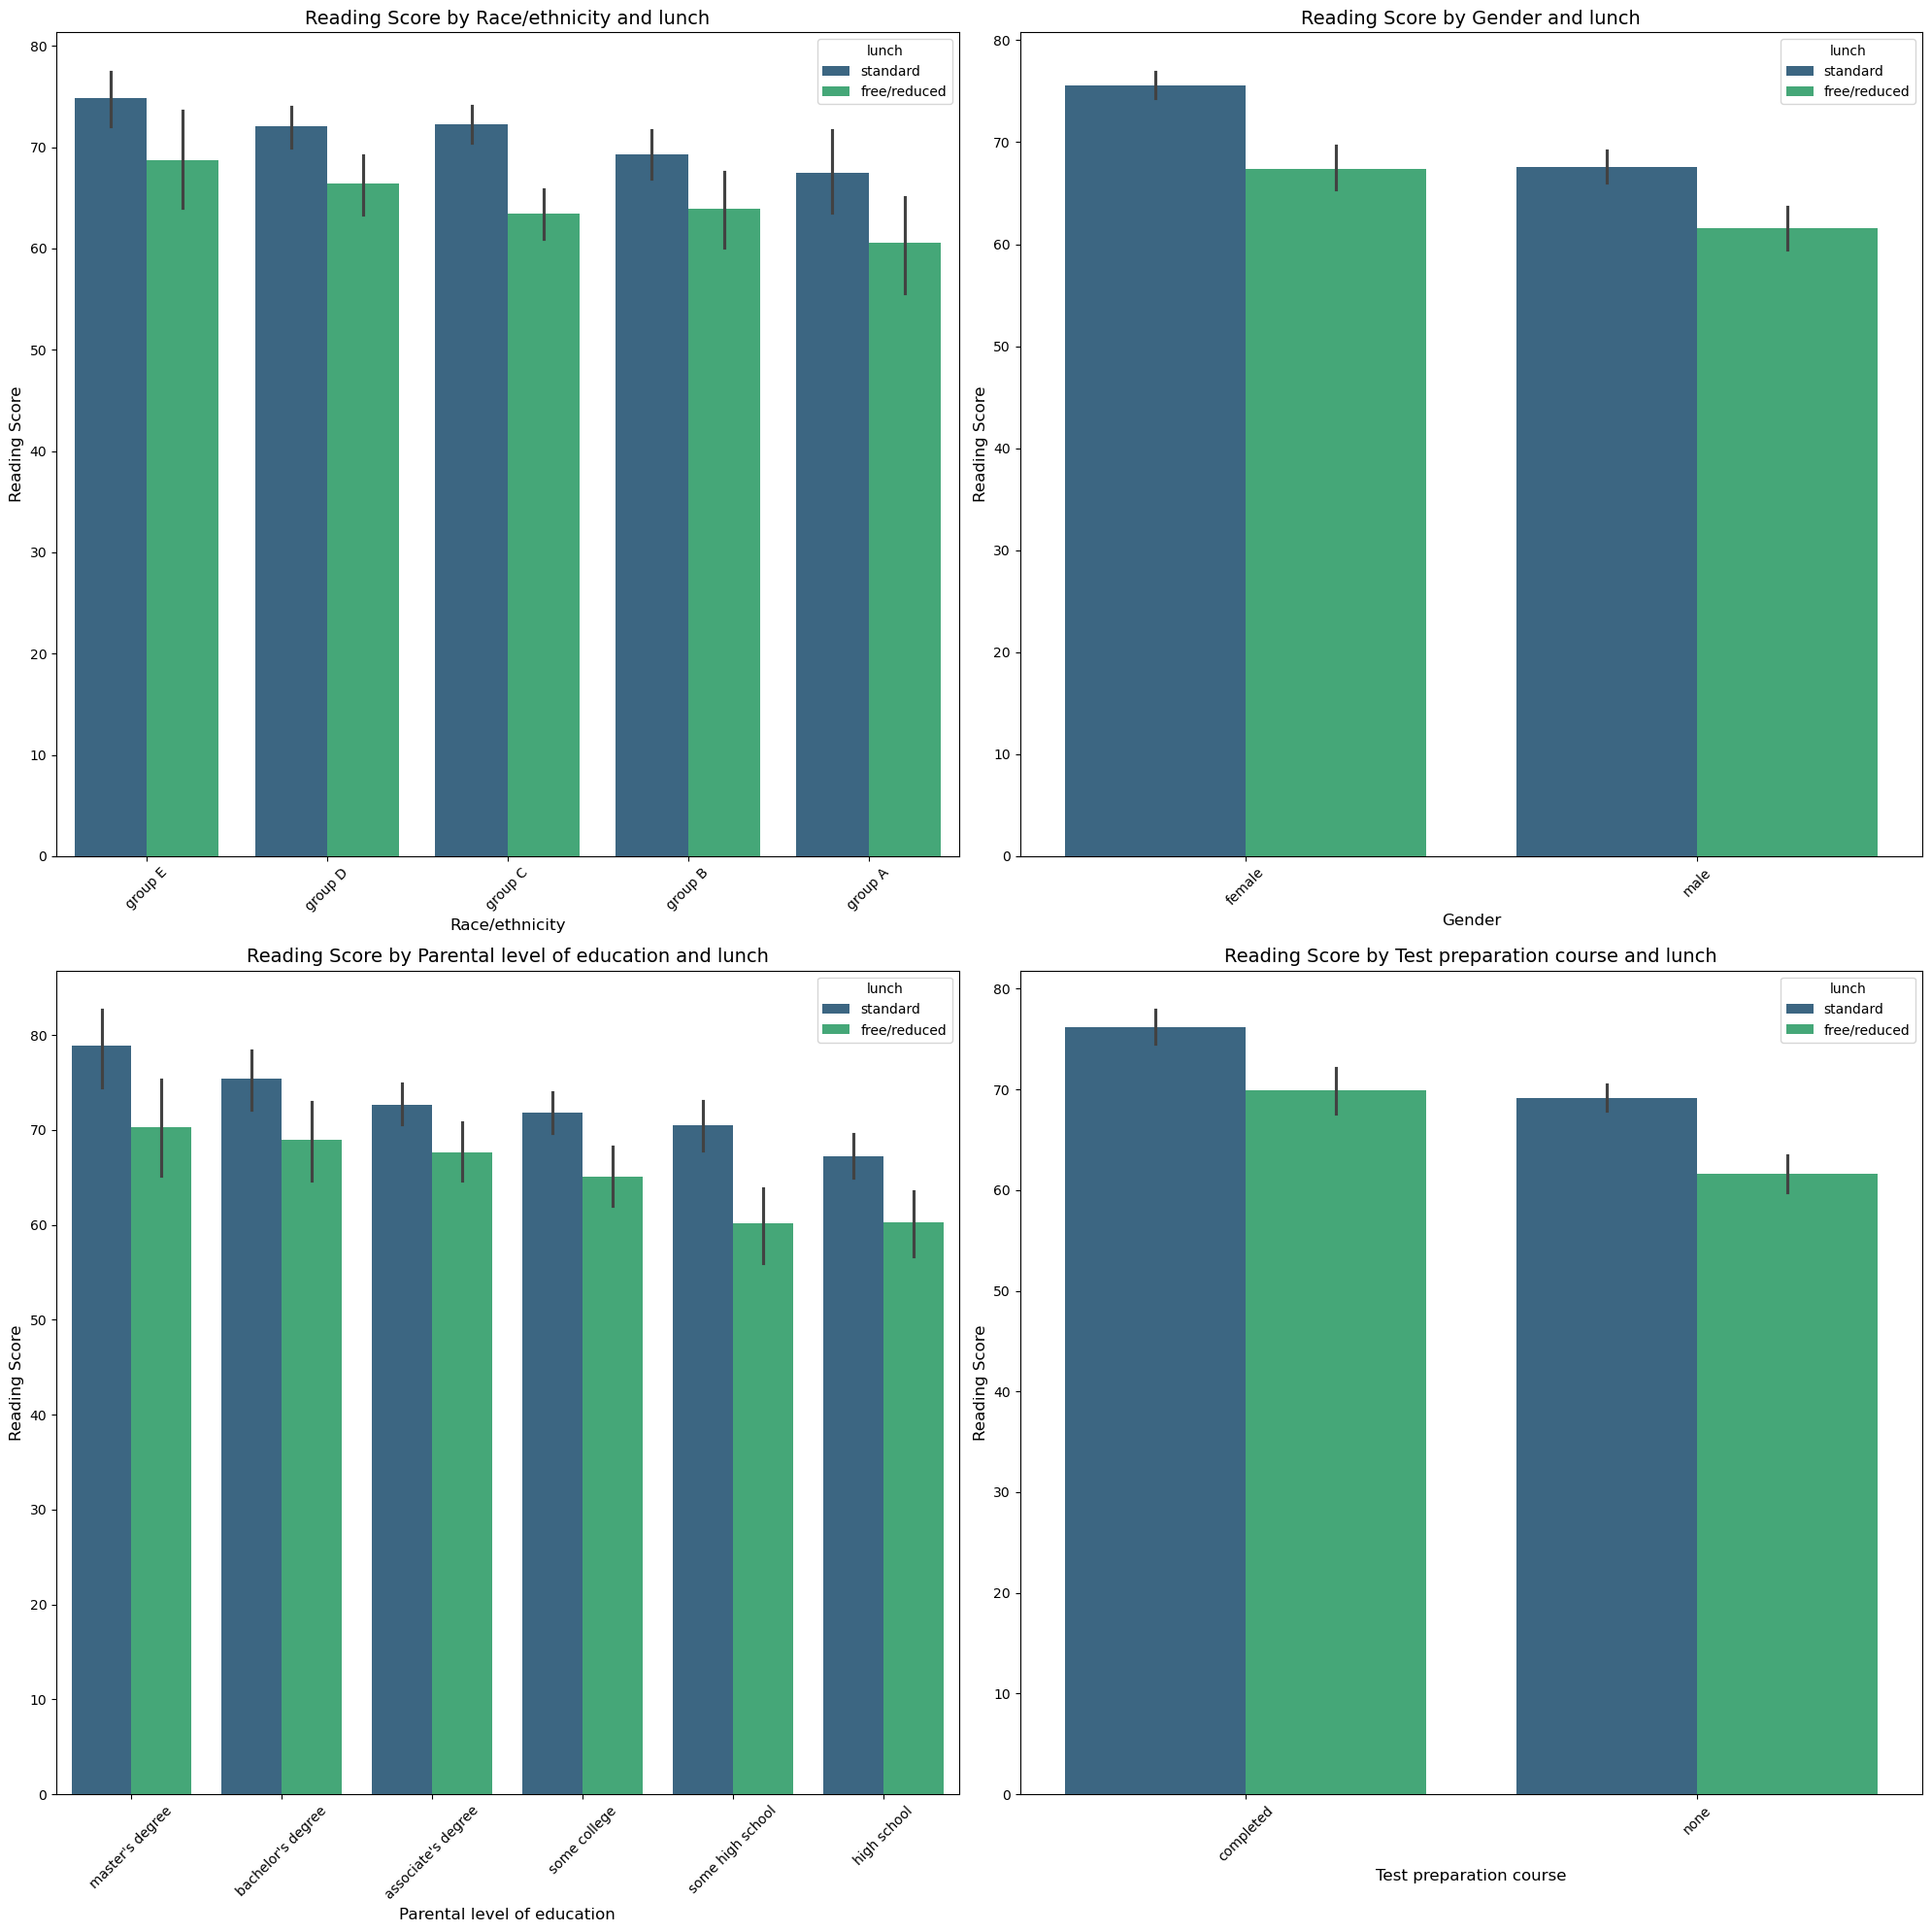

In [34]:

categorical_Features = ['race/ethnicity','gender','parental level of education', 'test preparation course']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(categorical_Features):
   
    order = df.groupby(feature)['reading score'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x=feature, y='reading score', hue='lunch',ax=axes[i], palette='viridis',order=order)
    axes[i].set_title(f'Reading Score by {feature.capitalize()} and lunch', fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('Reading Score', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()



`Writing Scores by Categorical Features and lunch`


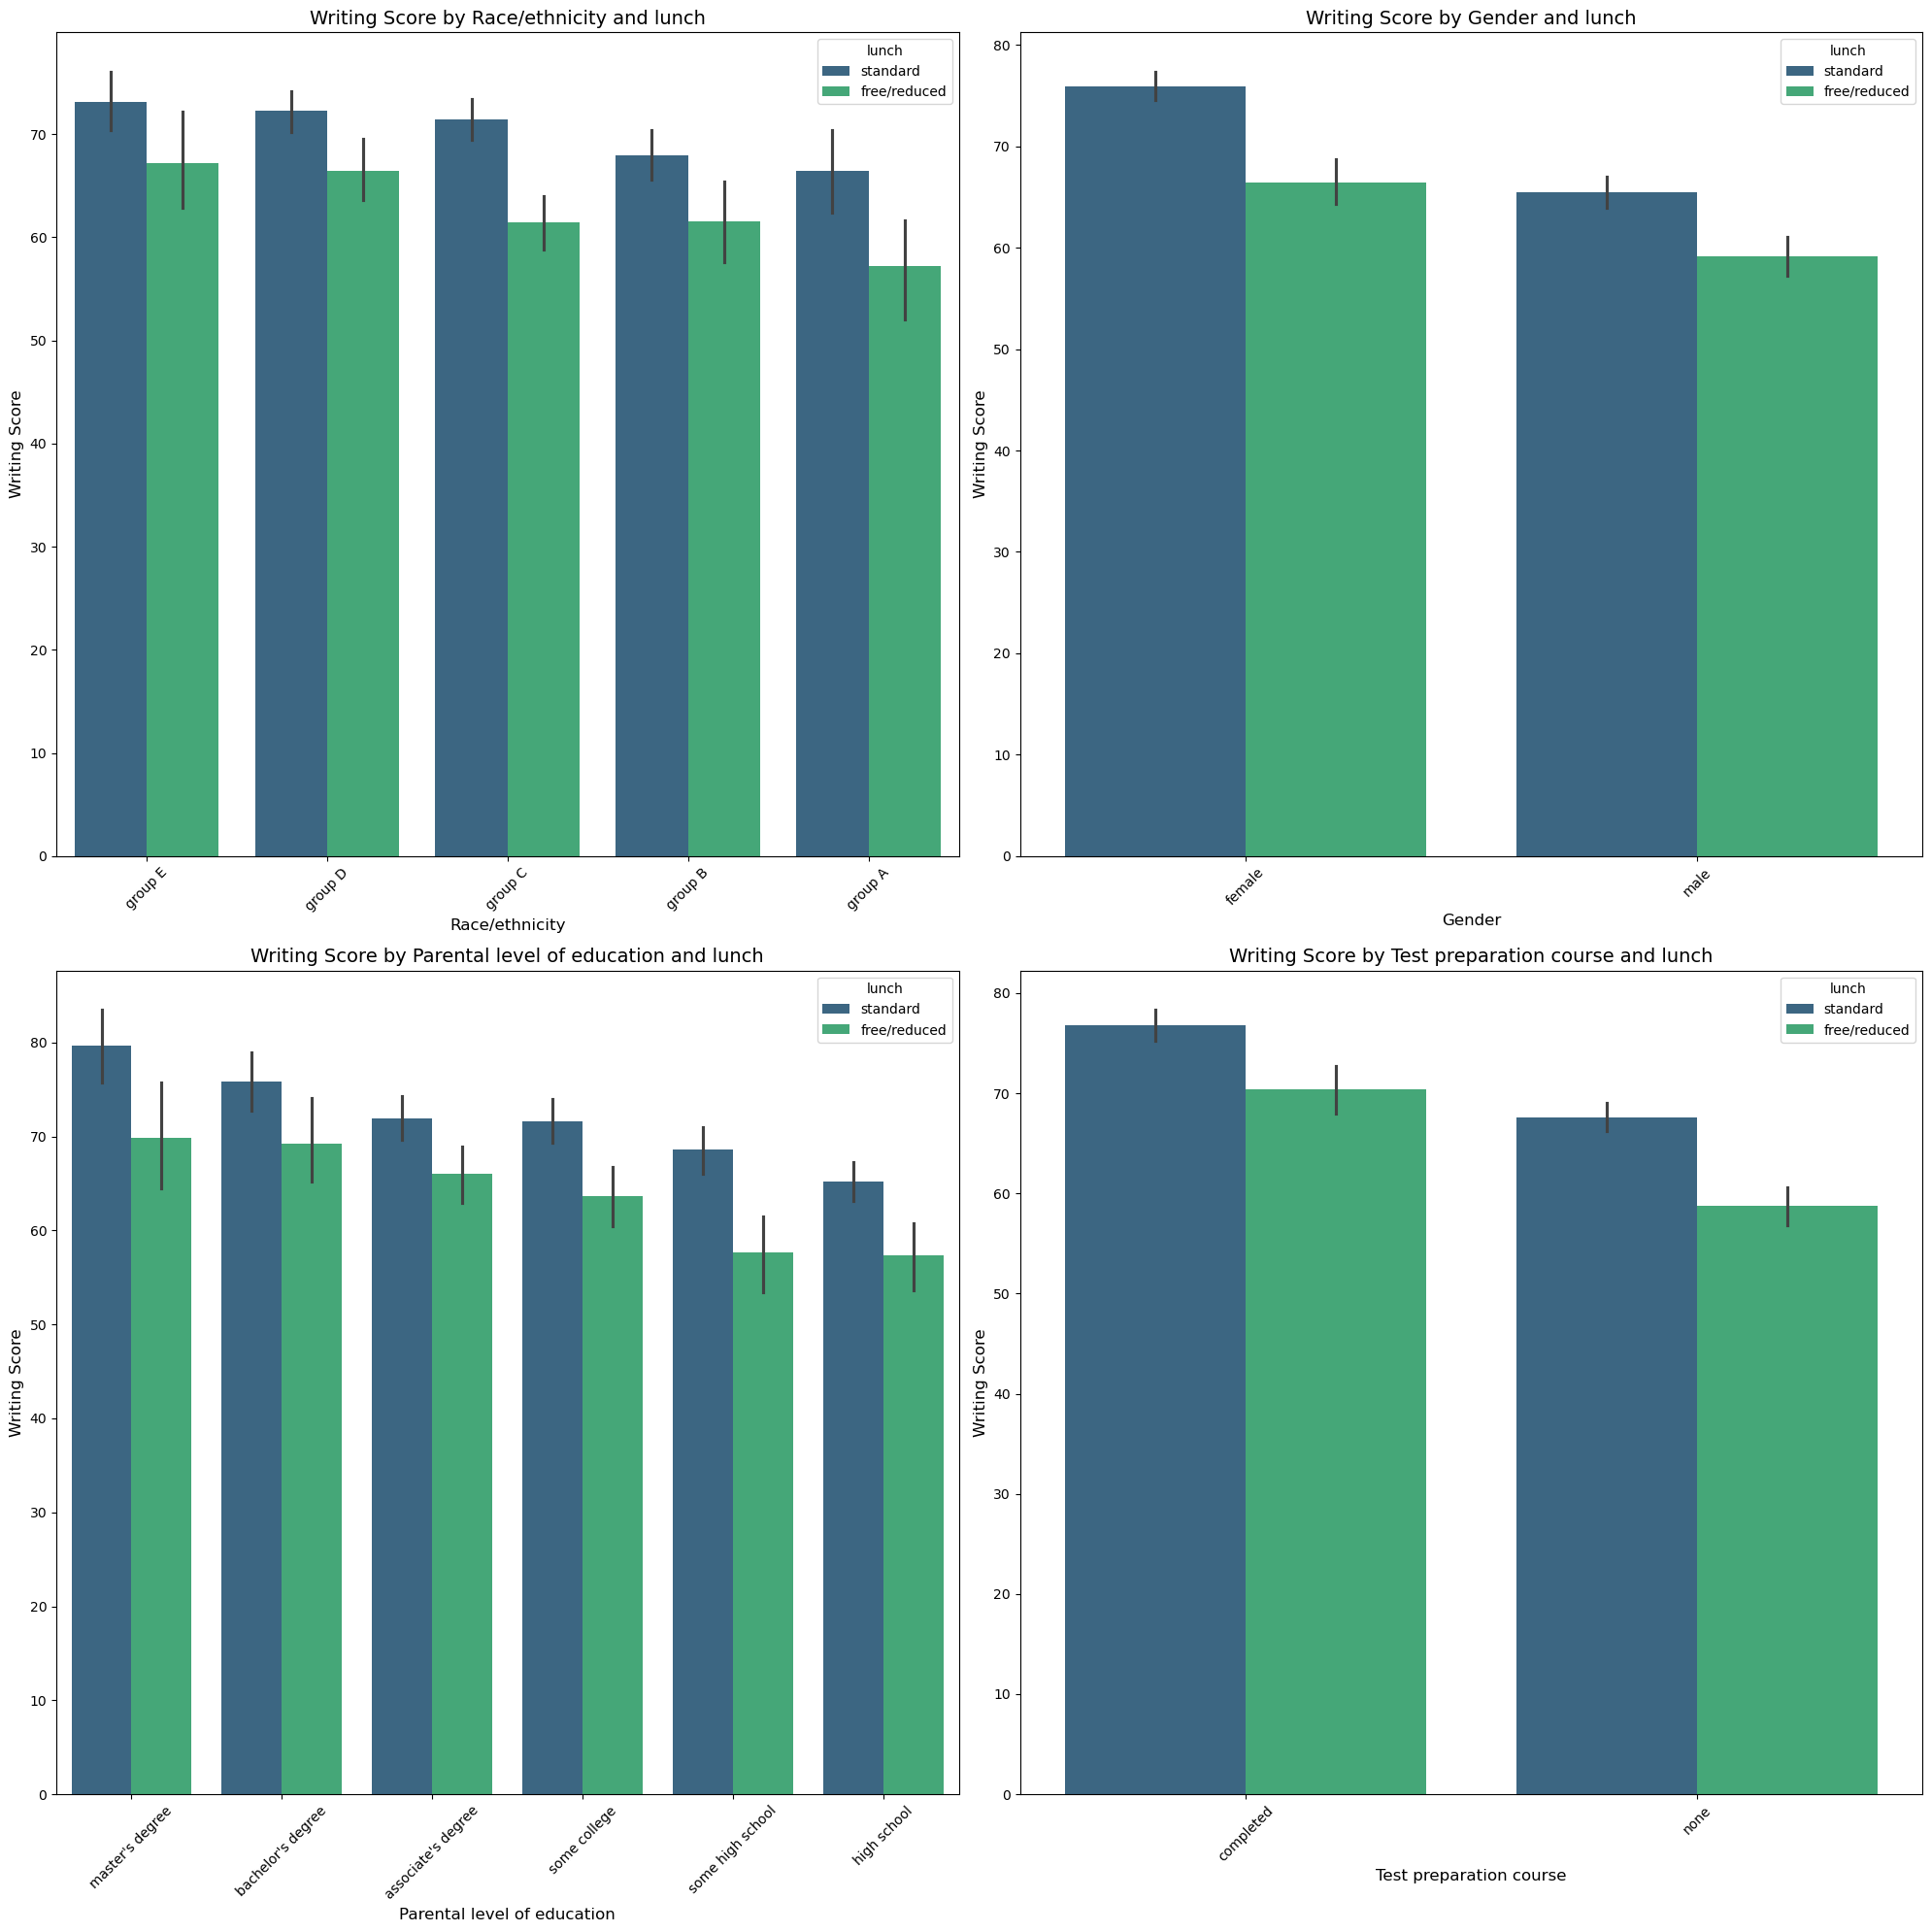

In [35]:

categorical_Features = ['race/ethnicity','gender','parental level of education', 'test preparation course']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(categorical_Features):
   
    order = df.groupby(feature)['writing score'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x=feature, y='writing score', hue='lunch',ax=axes[i], palette='viridis',order=order)
    axes[i].set_title(f'Writing Score by {feature.capitalize()} and lunch', fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('Writing Score', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


`Total Scores by Categorical Features and lunch`

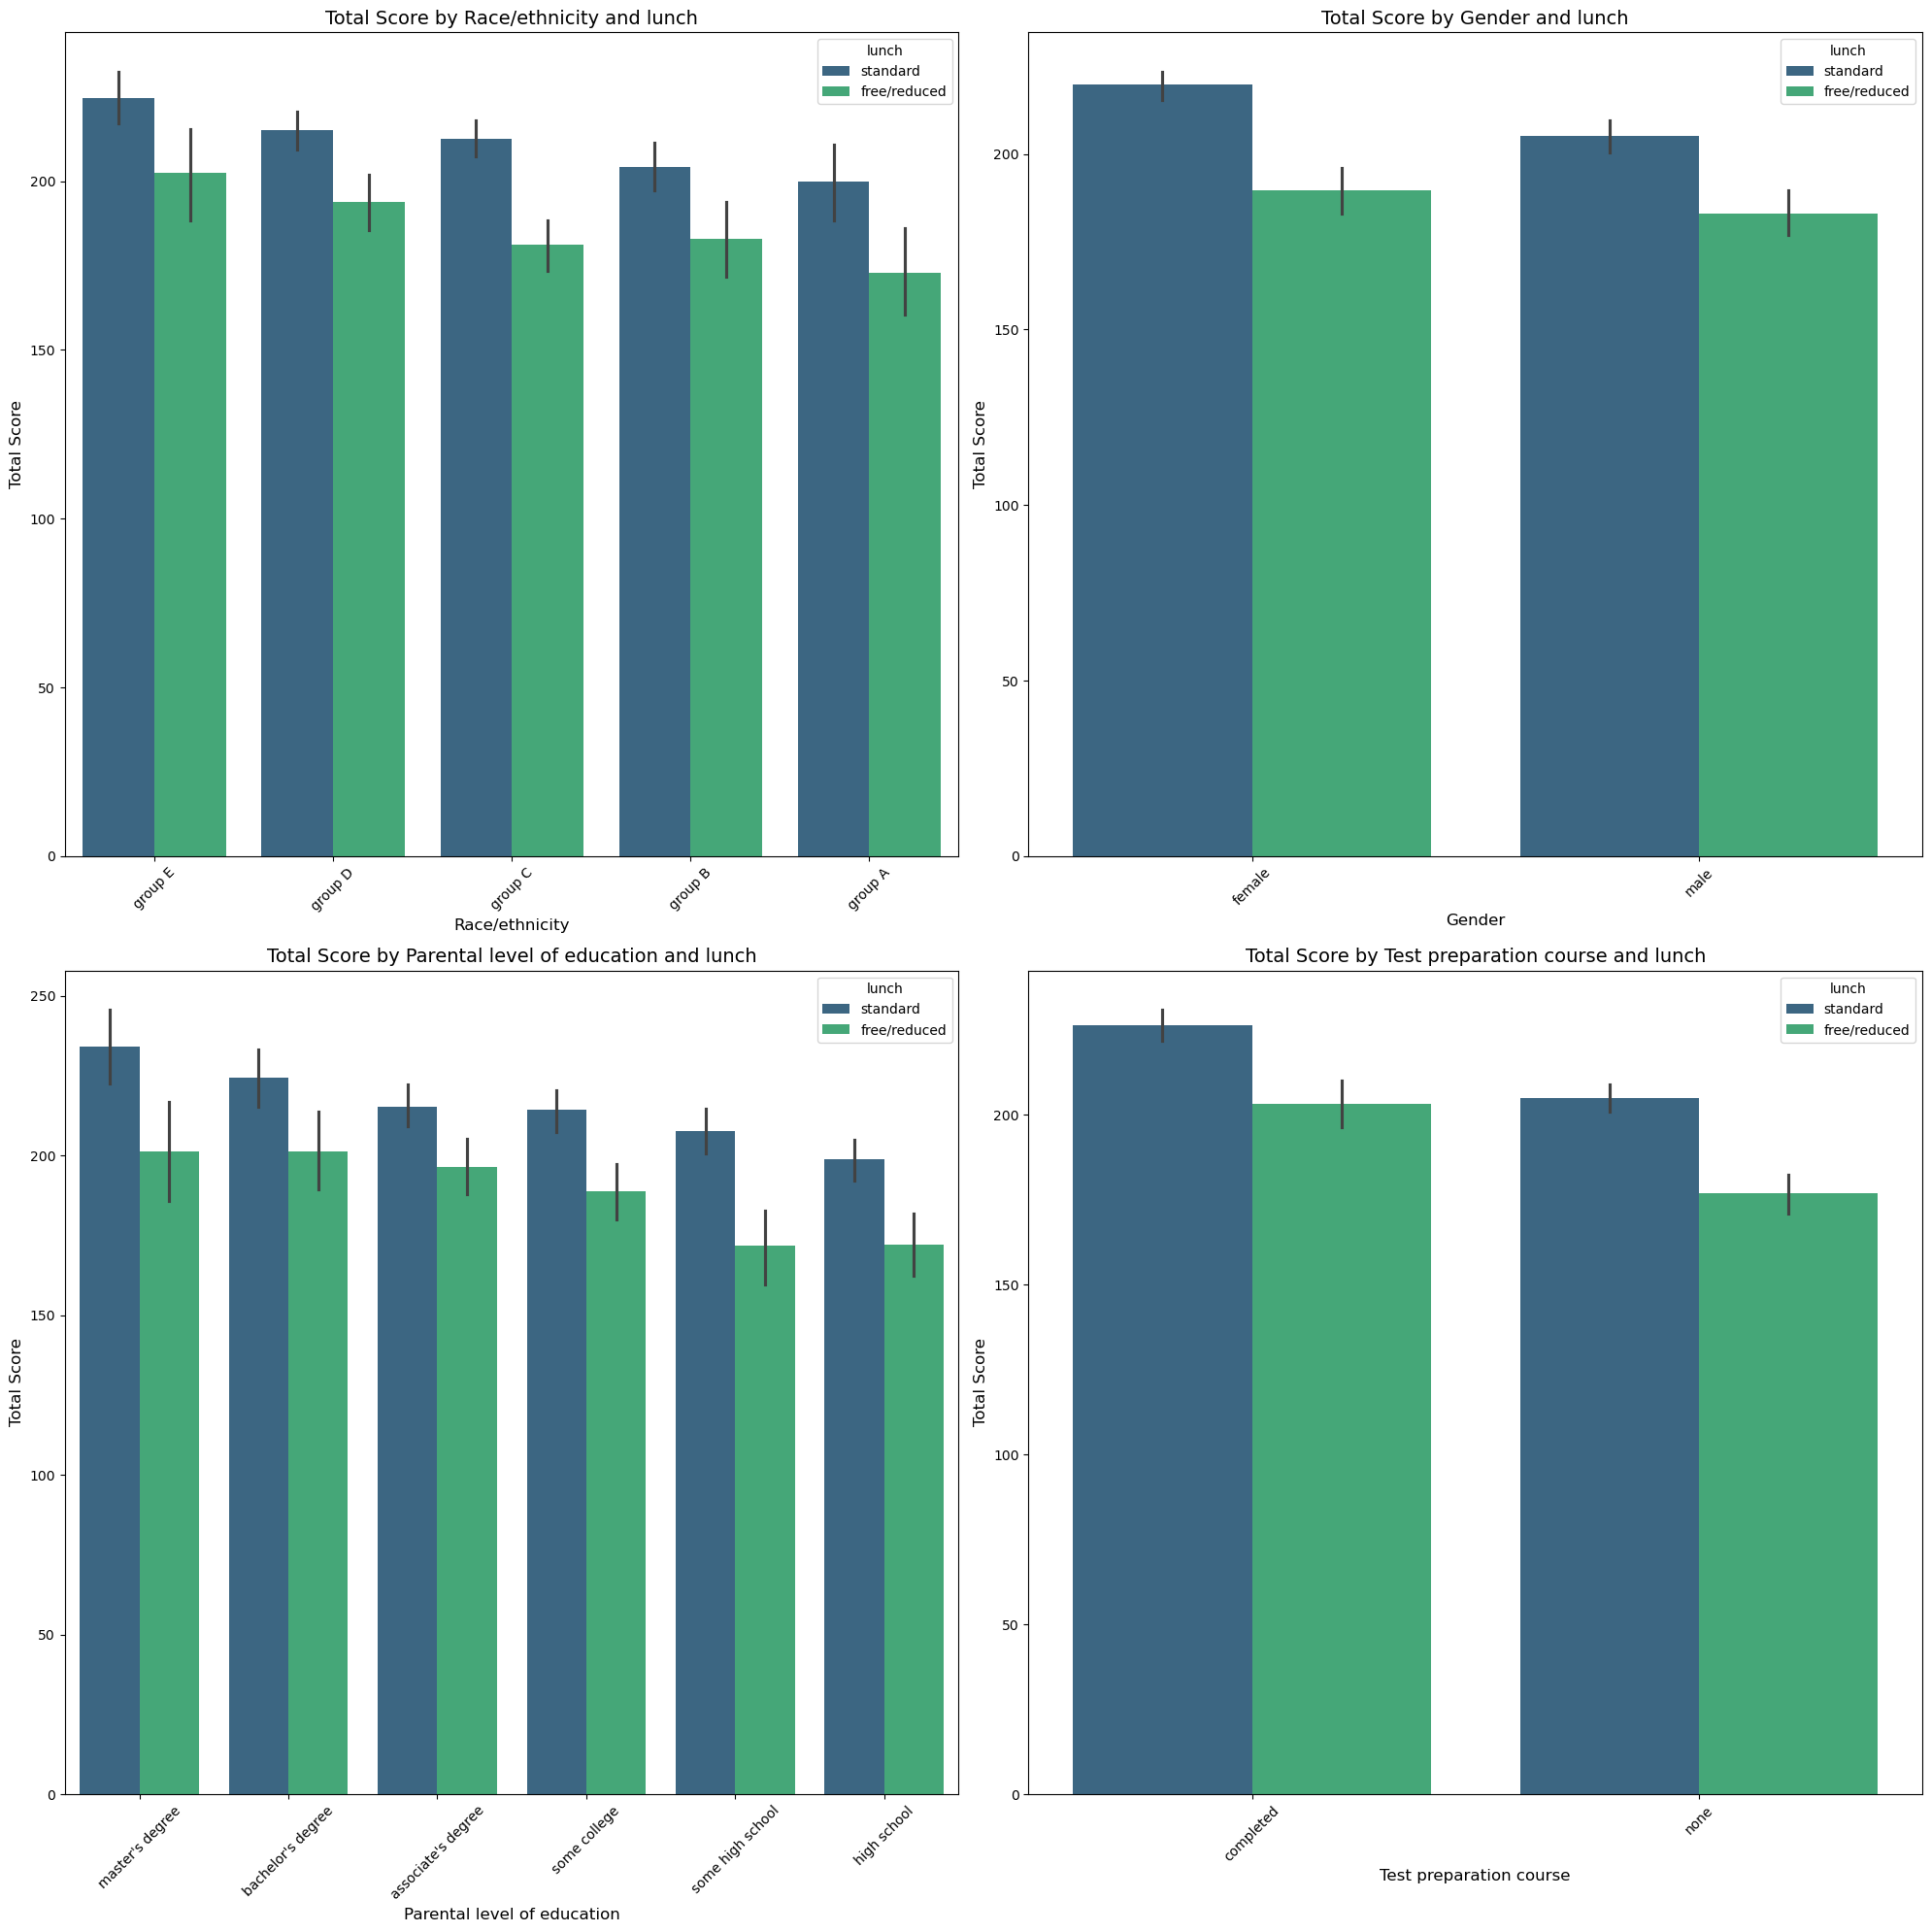

In [36]:

categorical_Features = ['race/ethnicity','gender','parental level of education', 'test preparation course']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(categorical_Features):
   
    order = df.groupby(feature)['total score'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x=feature, y='total score', hue='lunch',ax=axes[i], palette='viridis',order=order)
    axes[i].set_title(f'Total Score by {feature.capitalize()} and lunch', fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('Total Score', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


`Math Scores by Categorical Features and test preparation course`


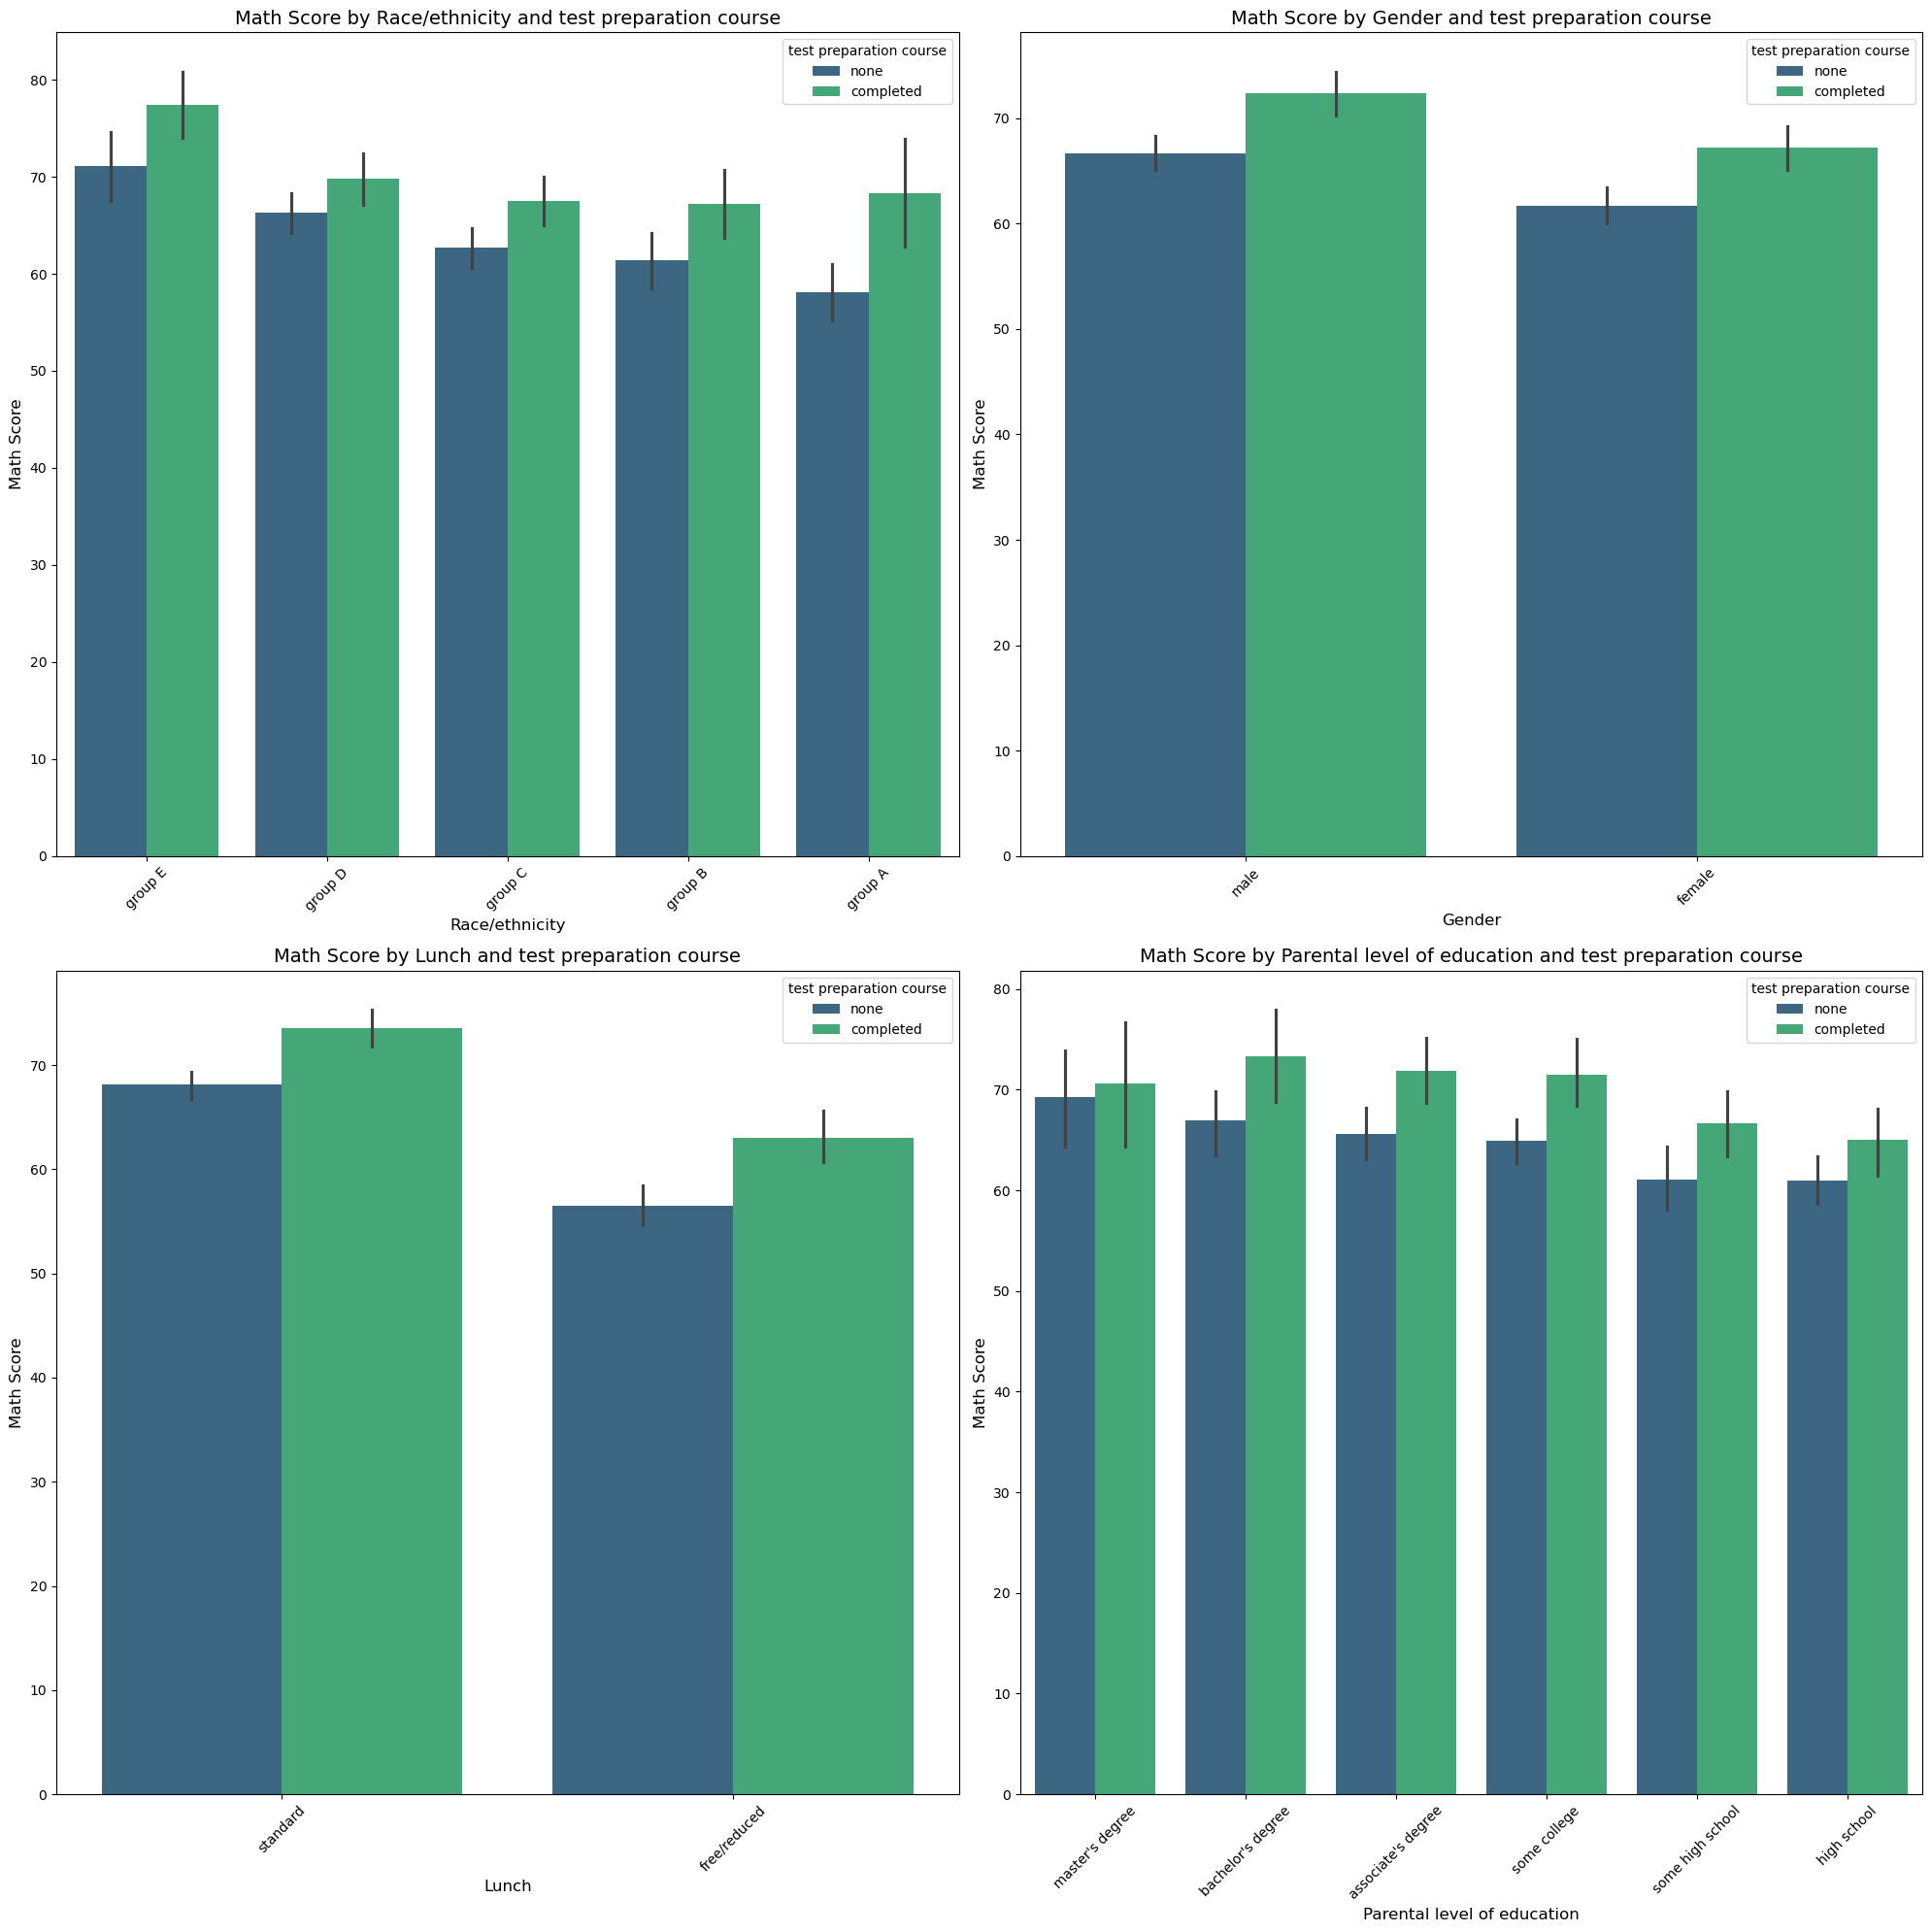

In [37]:

categorical_Features = ['race/ethnicity','gender','lunch','parental level of education']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(categorical_Features):
   
    order = df.groupby(feature)['math score'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x=feature, y='math score', hue='test preparation course',ax=axes[i], palette='viridis',order=order)
    axes[i].set_title(f'Math Score by {feature.capitalize()} and test preparation course', fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('Math Score', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


`Reading Scores by Categorical Features and test preparation course`


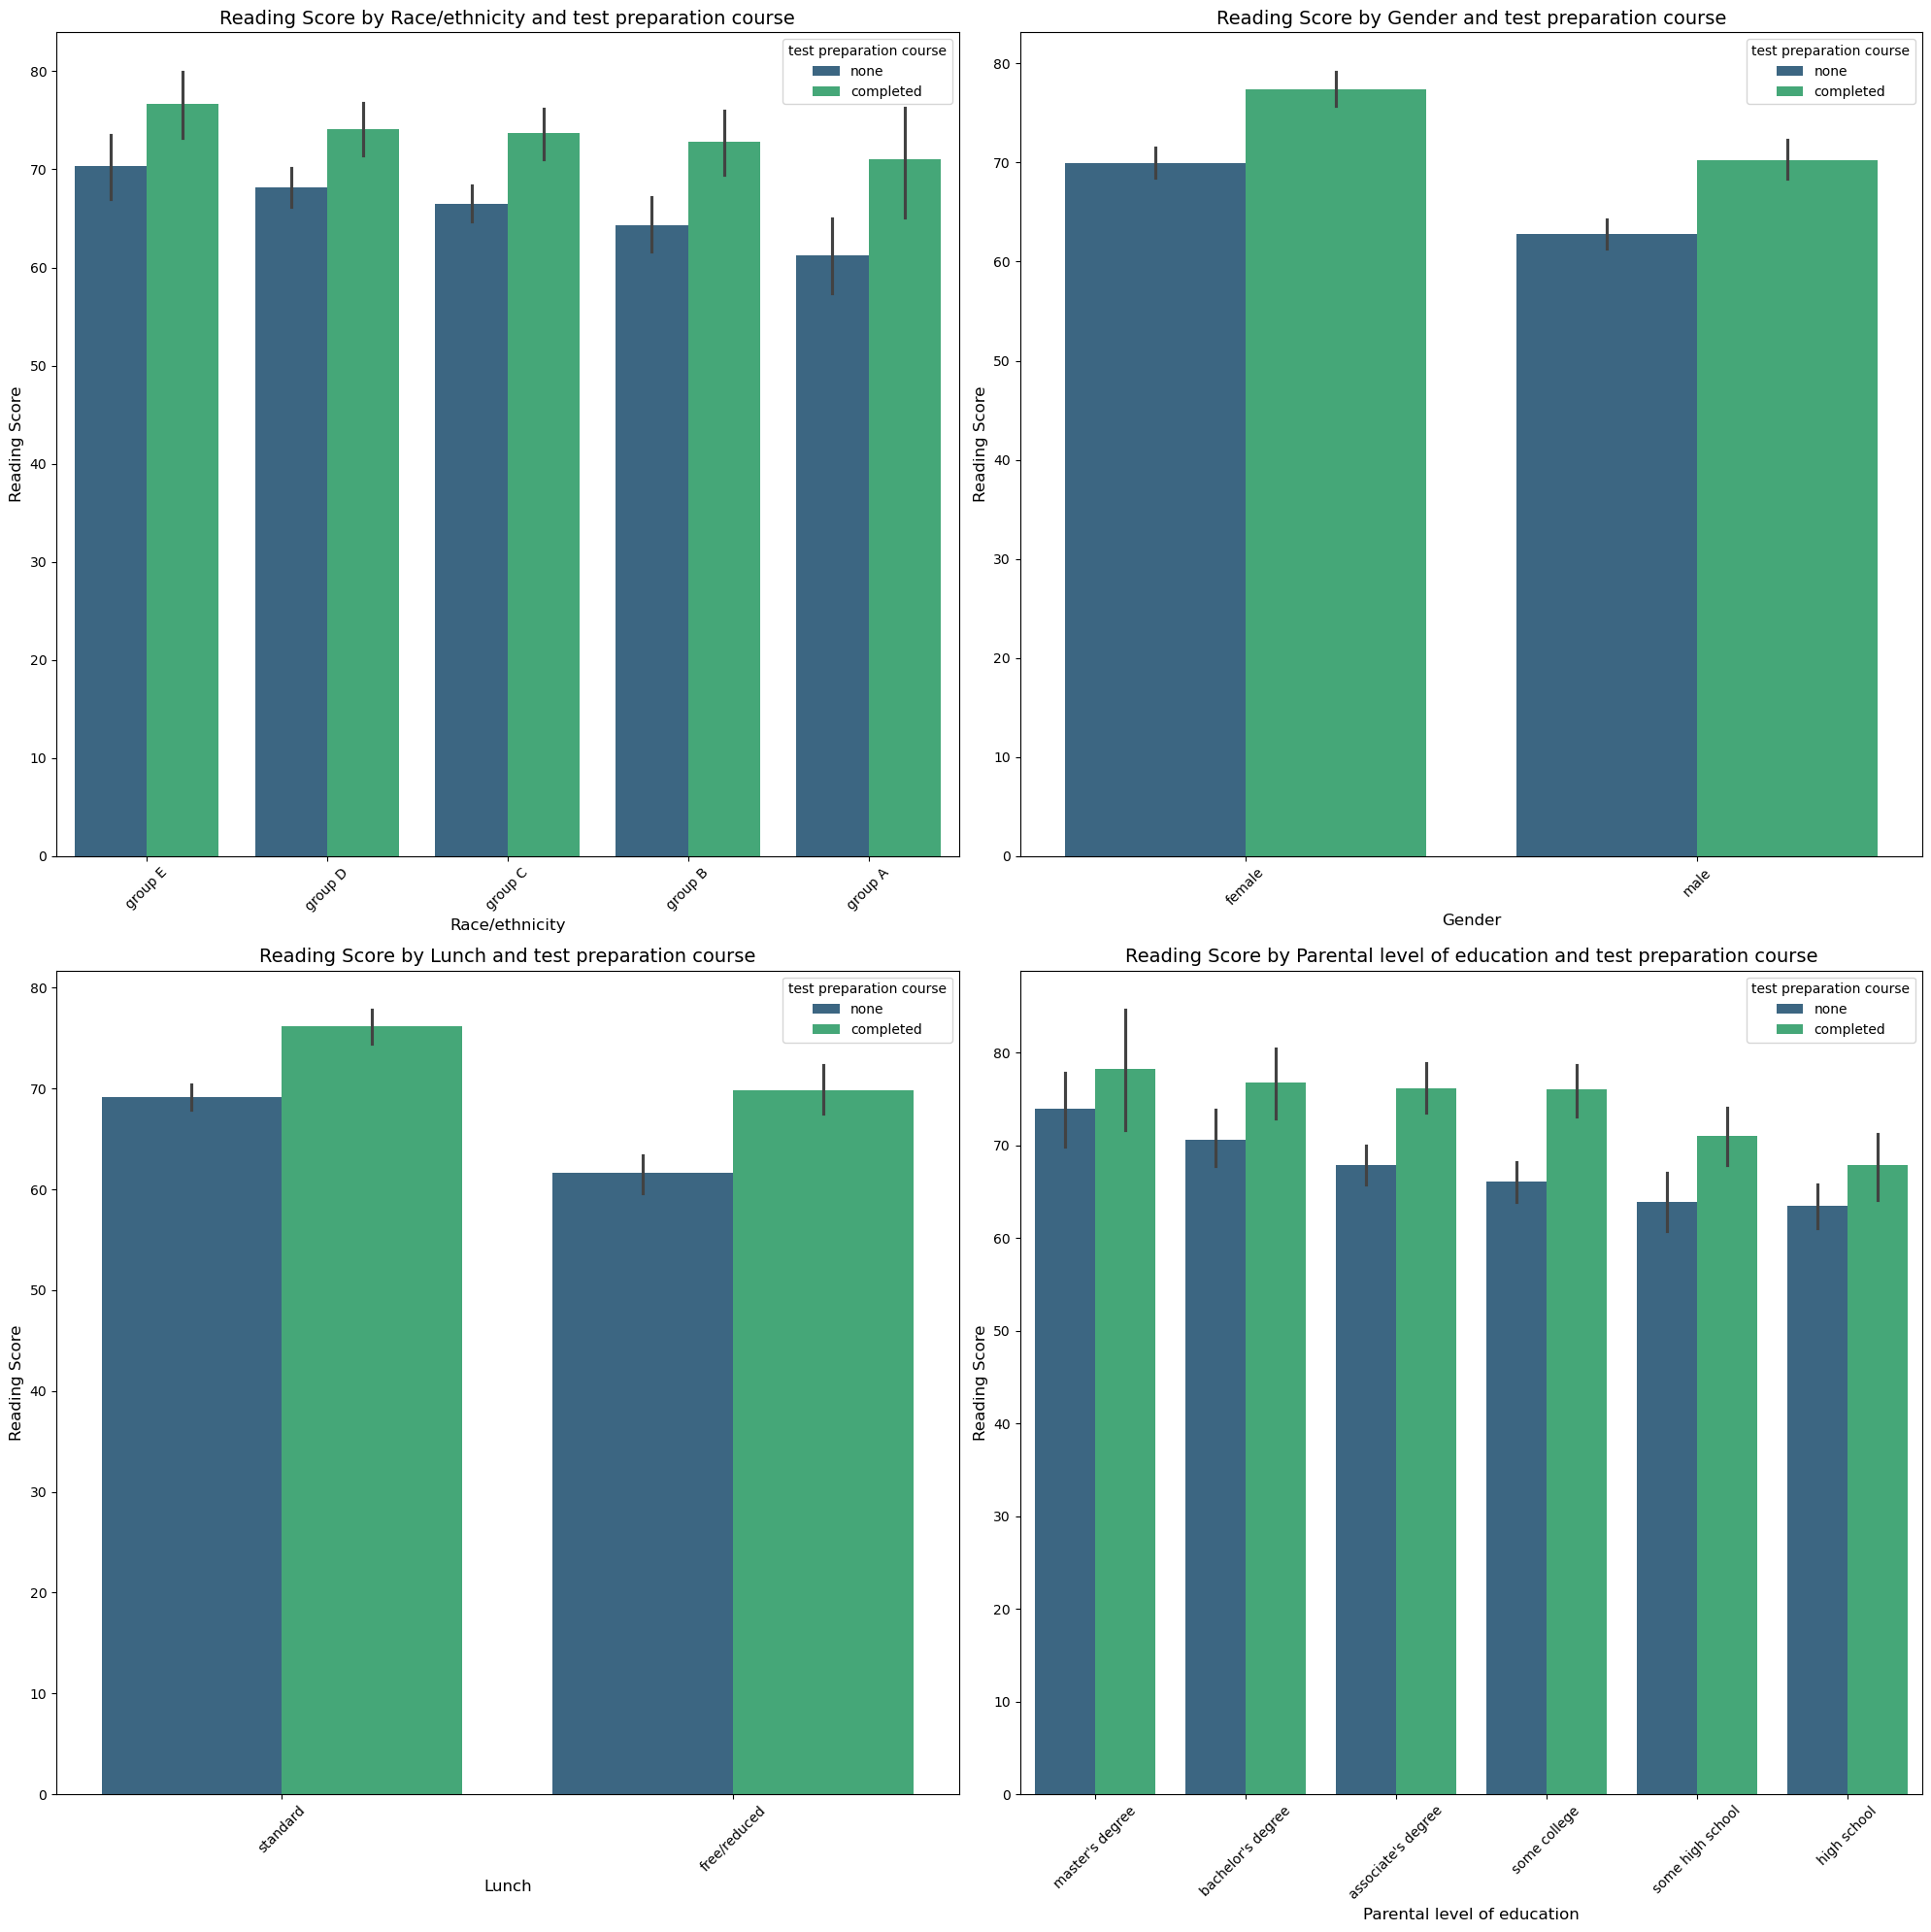

In [38]:

categorical_Features = ['race/ethnicity','gender','lunch','parental level of education']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(categorical_Features):
   
    order = df.groupby(feature)['reading score'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x=feature, y='reading score', hue='test preparation course',ax=axes[i], palette='viridis',order=order)
    axes[i].set_title(f'Reading Score by {feature.capitalize()} and test preparation course', fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('Reading Score', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


`Writing Scores by Categorical Features and test preparation course`


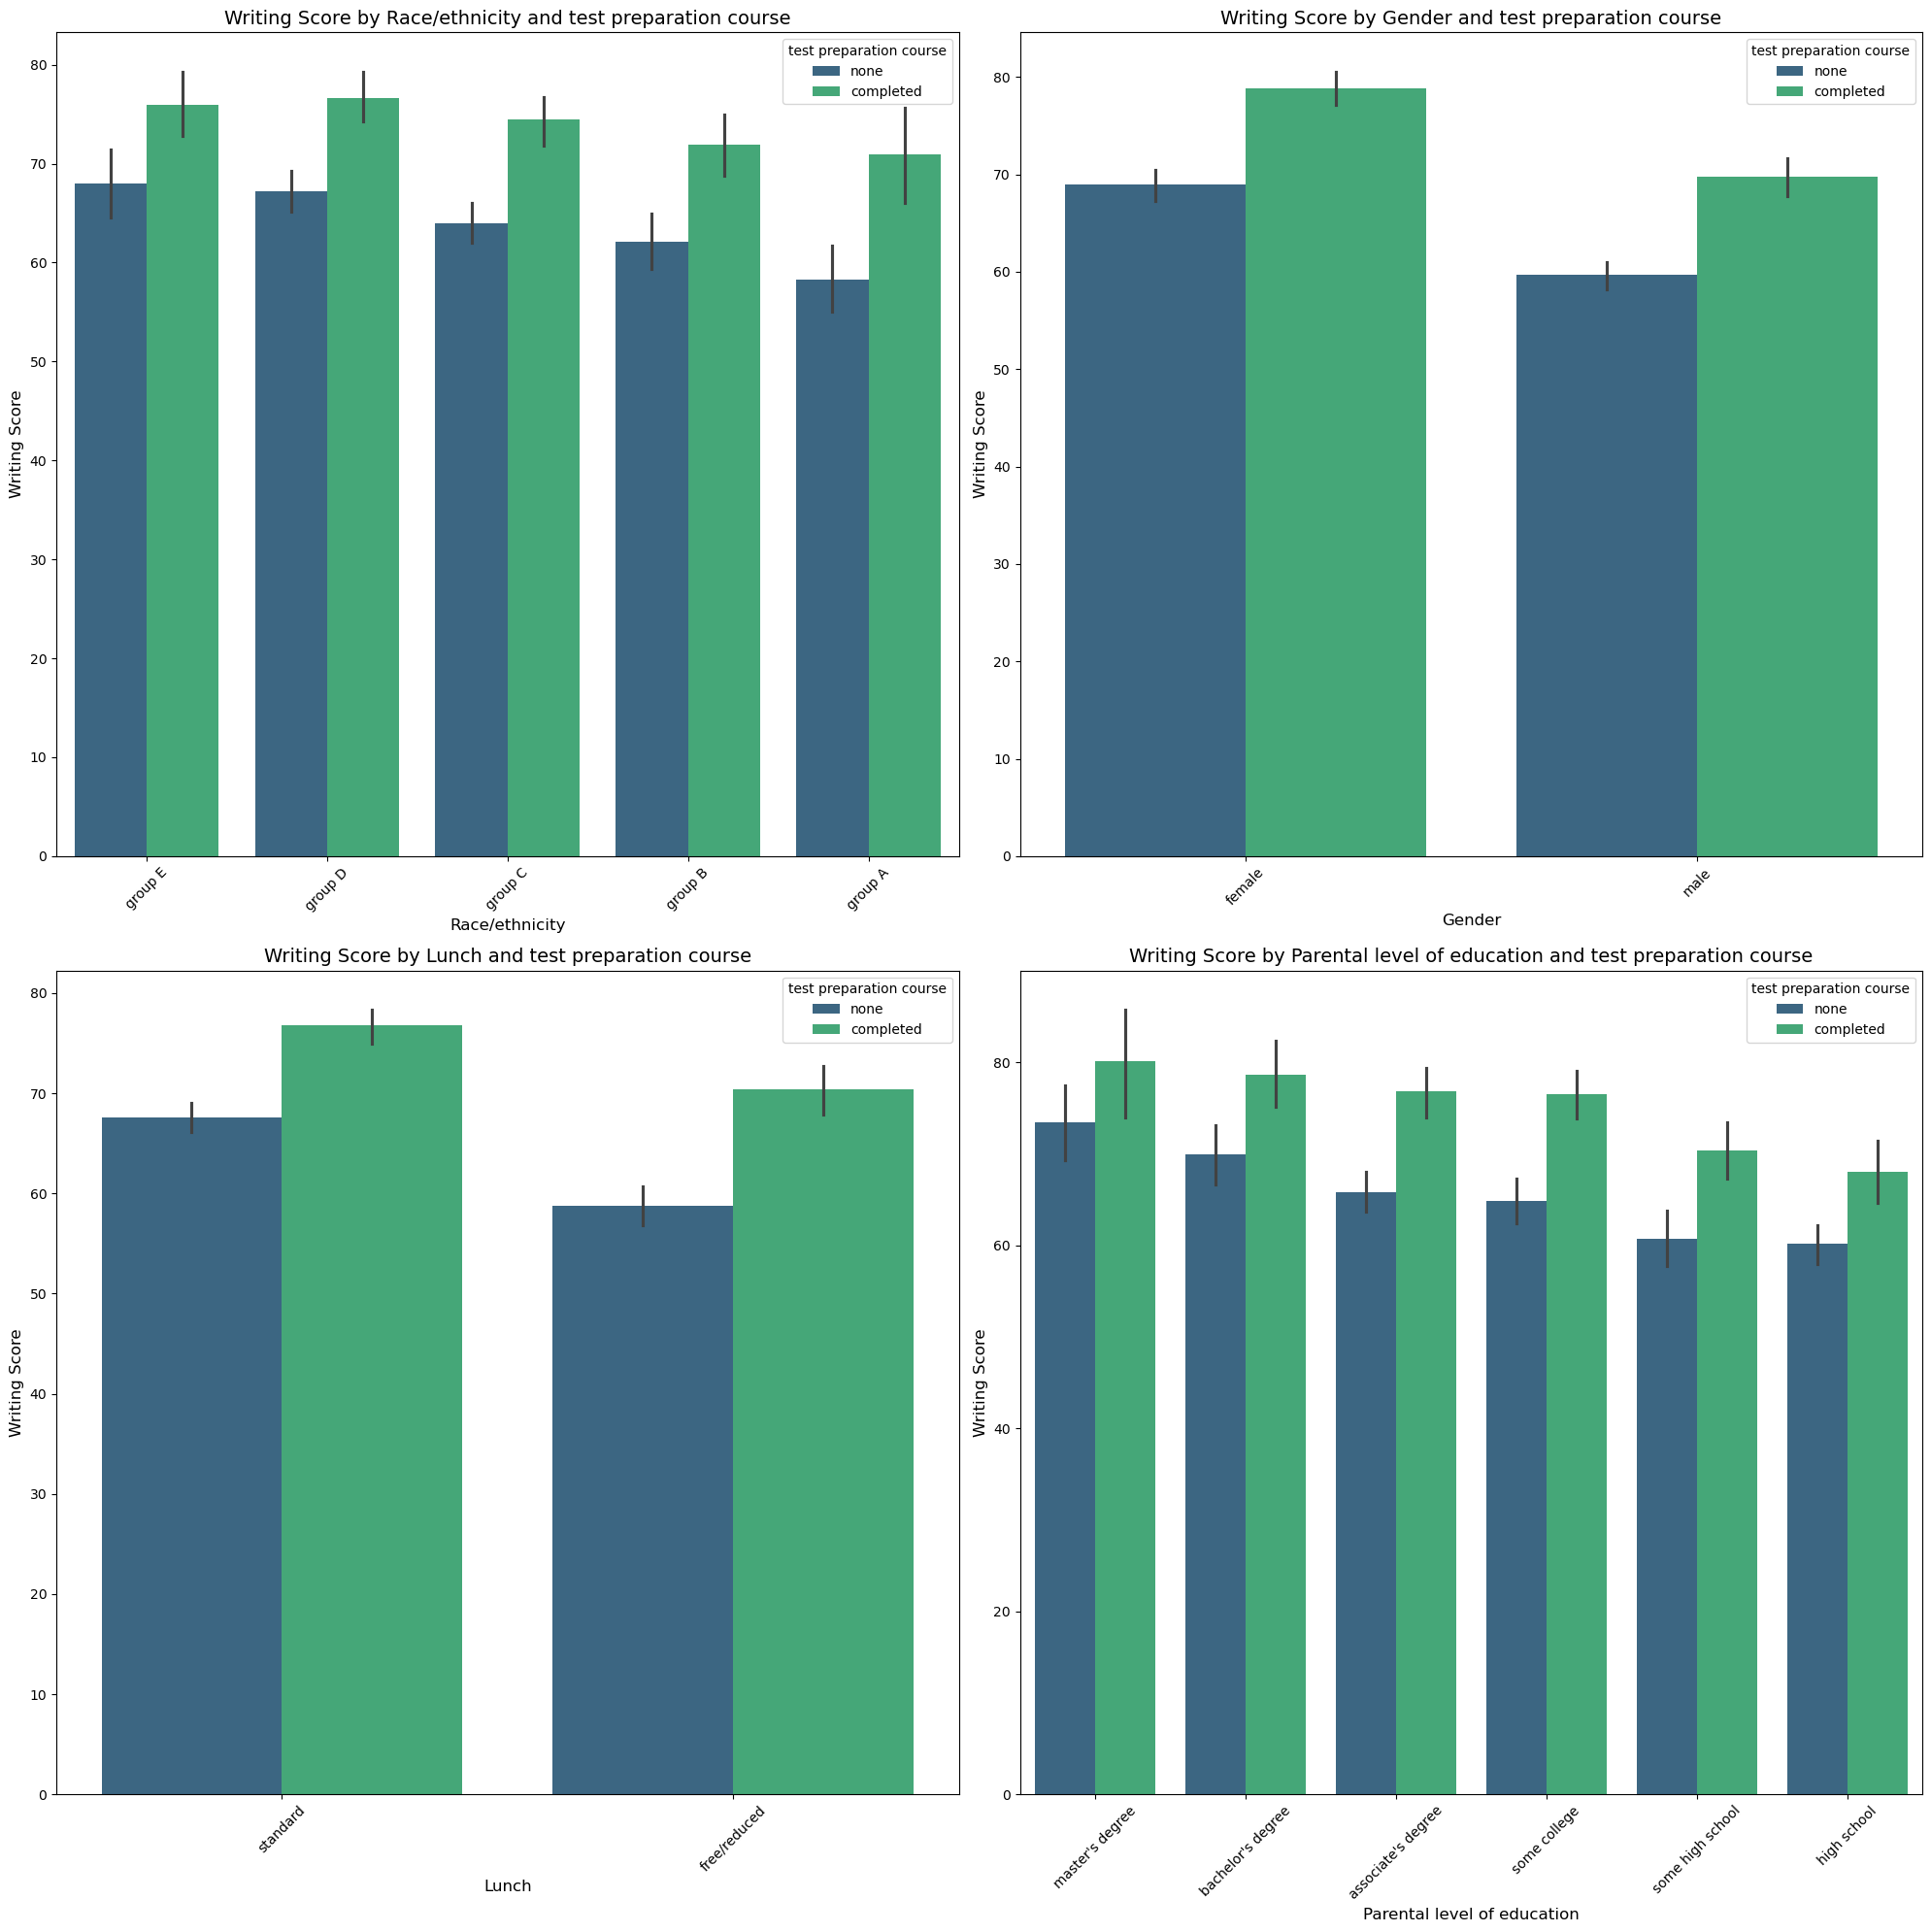

In [39]:

categorical_Features = ['race/ethnicity','gender','lunch','parental level of education']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(categorical_Features):
   
    order = df.groupby(feature)['writing score'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x=feature, y='writing score', hue='test preparation course',ax=axes[i], palette='viridis',order=order)
    axes[i].set_title(f'Writing Score by {feature.capitalize()} and test preparation course', fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('Writing Score', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


`Total Scores by Categorical Features and test preparation course`


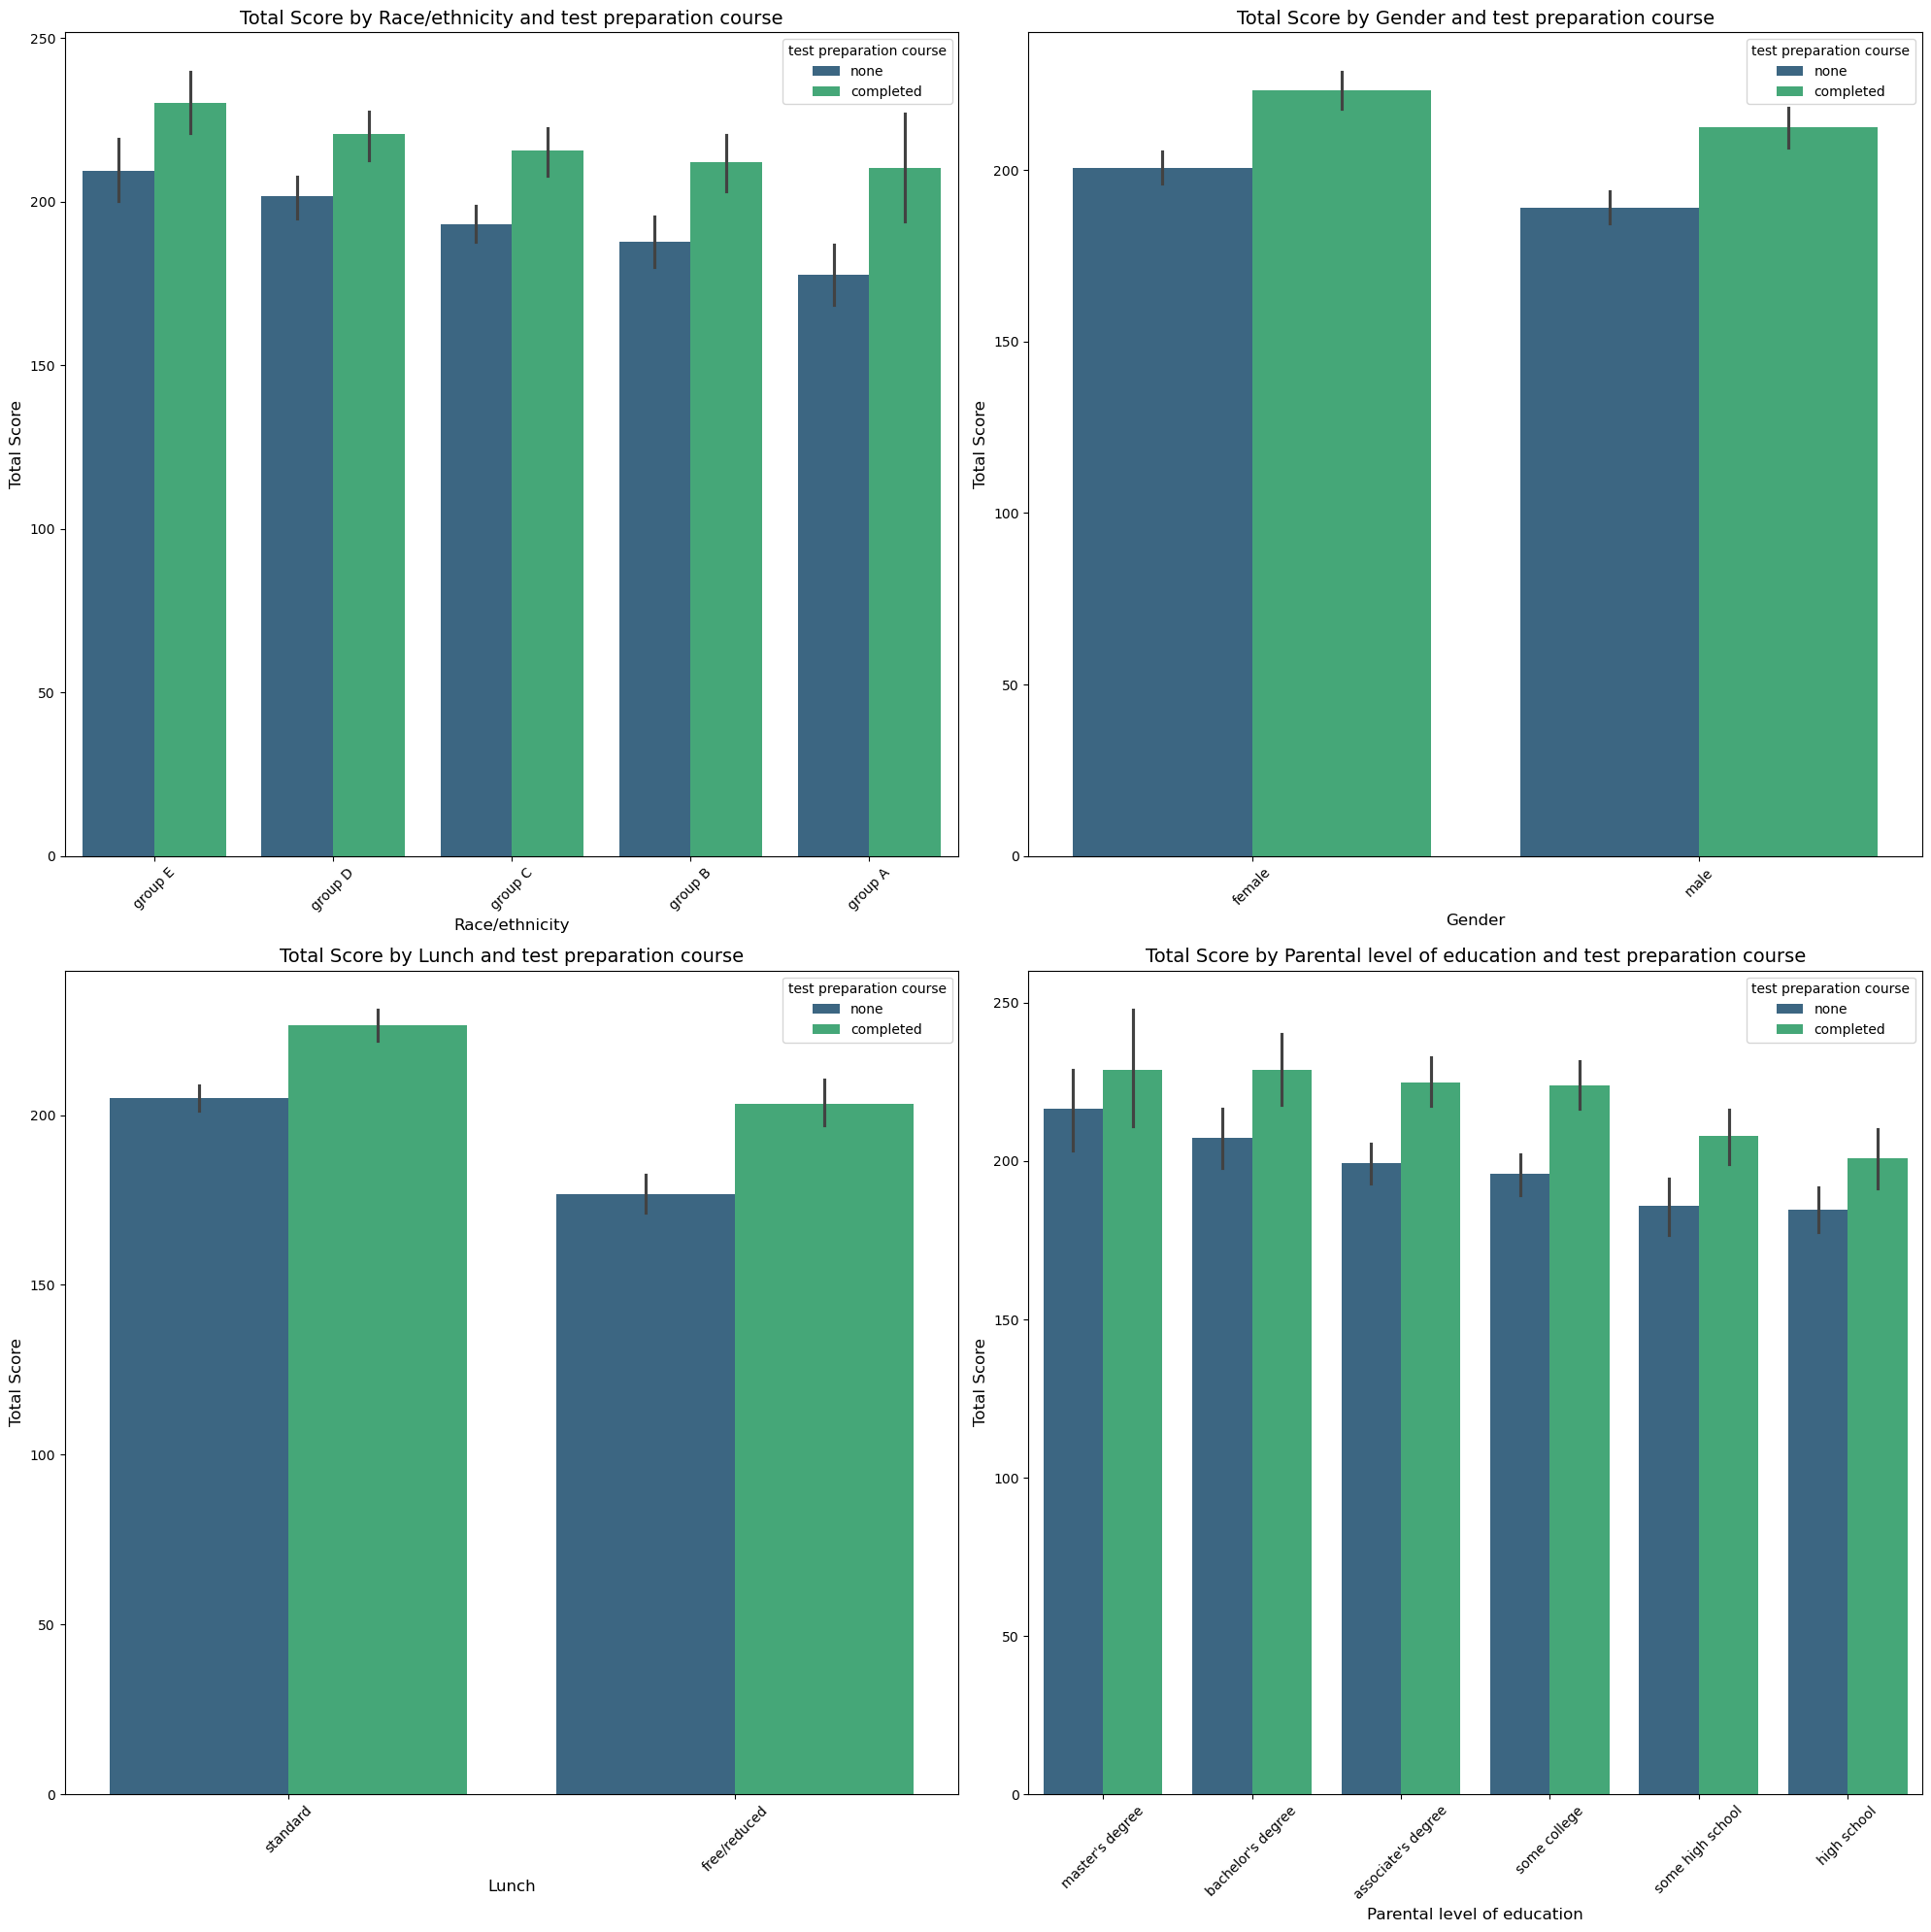

In [40]:

categorical_Features = ['race/ethnicity','gender','lunch','parental level of education']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(categorical_Features):
   
    order = df.groupby(feature)['total score'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x=feature, y='total score', hue='test preparation course',ax=axes[i], palette='viridis',order=order)
    axes[i].set_title(f'Total Score by {feature.capitalize()} and test preparation course', fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('Total Score', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


# Step 5: Conclusion and Insights <a id="step5"> </a>



1. **What demographic factors influence students' scores?**
   - **Answer:** The analysis revealed that students' scores vary significantly based on demographic factors such as gender, race/ethnicity, and parental education level. For example, female students generally performed better in writing and reading scores compared to their male counterparts. Additionally, students from groups with higher parental education levels tended to achieve higher scores across all subjects.

2. **Is there a correlation between different subjects' scores?**
   - **Answer:** Yes, there is a strong positive correlation between math, reading, and writing scores. The correlation matrix indicated that as students' math scores increase, their reading and writing scores also tend to rise, suggesting that performance in one subject may be indicative of performance in others. 

3. **How does test preparation impact student performance?**
   - **Answer:** Students who completed a test preparation course scored significantly higher in all subjects compared to those who did not. This indicates that test preparation can be a crucial factor in enhancing students' academic performance.

4. **What is the impact of lunch type on students' scores?**
   - **Answer:** Students who received standard lunches outperformed those on free/reduced lunch in all subjects. This suggests that nutrition may play a role in students' ability to perform academically, highlighting the importance of equitable access to resources.

5. **Are there notable trends in scores based on race/ethnicity?**
   - **Answer:** Yes, the analysis indicated variations in average scores among different racial/ethnic groups. For instance, students from certain groups consistently achieved higher scores in math and reading, pointing to potential disparities in educational support and resources.
i6g.

2. **How does parental education level correlate with students' scores?**
   - **Answer:** Students whose parents have a master's degree scored the highest on average across all subjects, with math scores averaging 85, reading 90, and writing 88. In contrast, students with parents who have only completed high school had significantly lower scores (math: 58, reading: 60, writing: 62). This highlights the impact of parental education on student achienvironment for all students.